**Setting the working directory**

In [1]:
import os
os.chdir('/Users/shovonsengupta/Desktop/Python/Notebook')

In [2]:
# Check the working directory
!pwd

/Users/shovonsengupta/Desktop/Python/Notebook


In [3]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

Reference: https://genforce.github.io/idinvert/

**Import Relevant libraries**

In [4]:
import numpy as np
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.models import Sequential,Model
from keras.layers import Dense,LeakyReLU,Dropout,Input
import os
from keras.preprocessing import image

**Dataset**

In [5]:
# Importing MNIST data
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],784)

In [6]:
x_train.shape

(60000, 784)

In [7]:
# Select the number you would like to train upon
# here required digit has been selected
# Note: By training on all the digits will create noise
x_train = x_train[y_train.flatten()==9]

In [8]:
# Choose the optimizer
def adam_optimizer():
    return Adam(lr=0.001)

**Build the Generative Model**

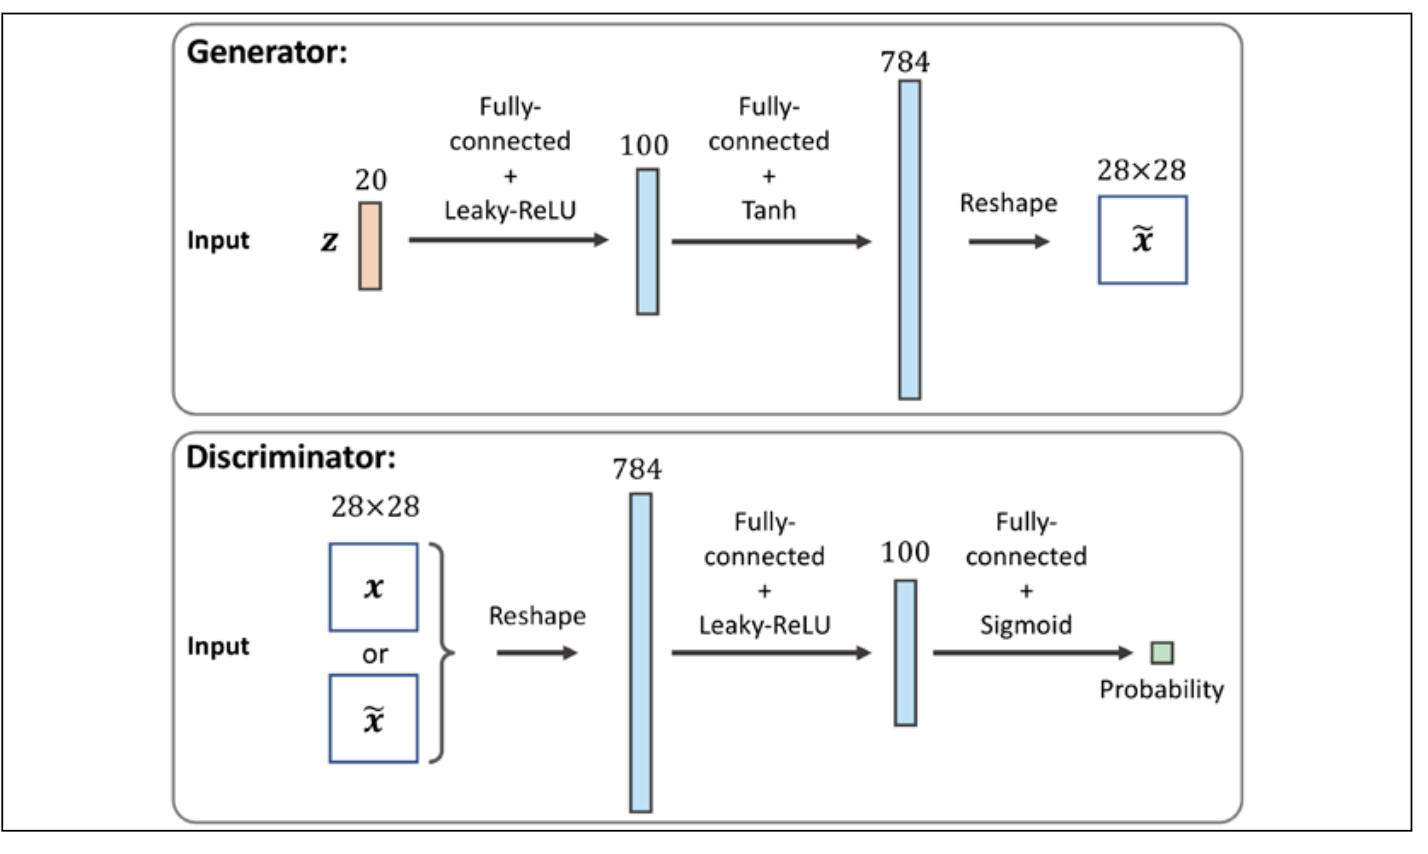

In [15]:
from IPython.display import Image
Image(filename='/Users/shovonsengupta/Desktop/All/PayPal - workshop/GAN_2.png',width=600, height=300)

In [9]:
# Generator
def generator():
    gen_model = Sequential()
    gen_model.add(Dense(units=128, input_dim=100))
    gen_model.add(LeakyReLU(0.2))
    gen_model.add(Dense(units=784, activation='sigmoid'))
    gen_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return gen_model

In [10]:
# Discriminator
def discriminator():
    disc_model = Sequential()
    disc_model.add(Dense(units=128,input_dim=784))
    disc_model.add(LeakyReLU(0.2))
    disc_model.add(Dropout(0.3))
    disc_model.add(Dense(units=1, activation='sigmoid'))
    disc_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return disc_model

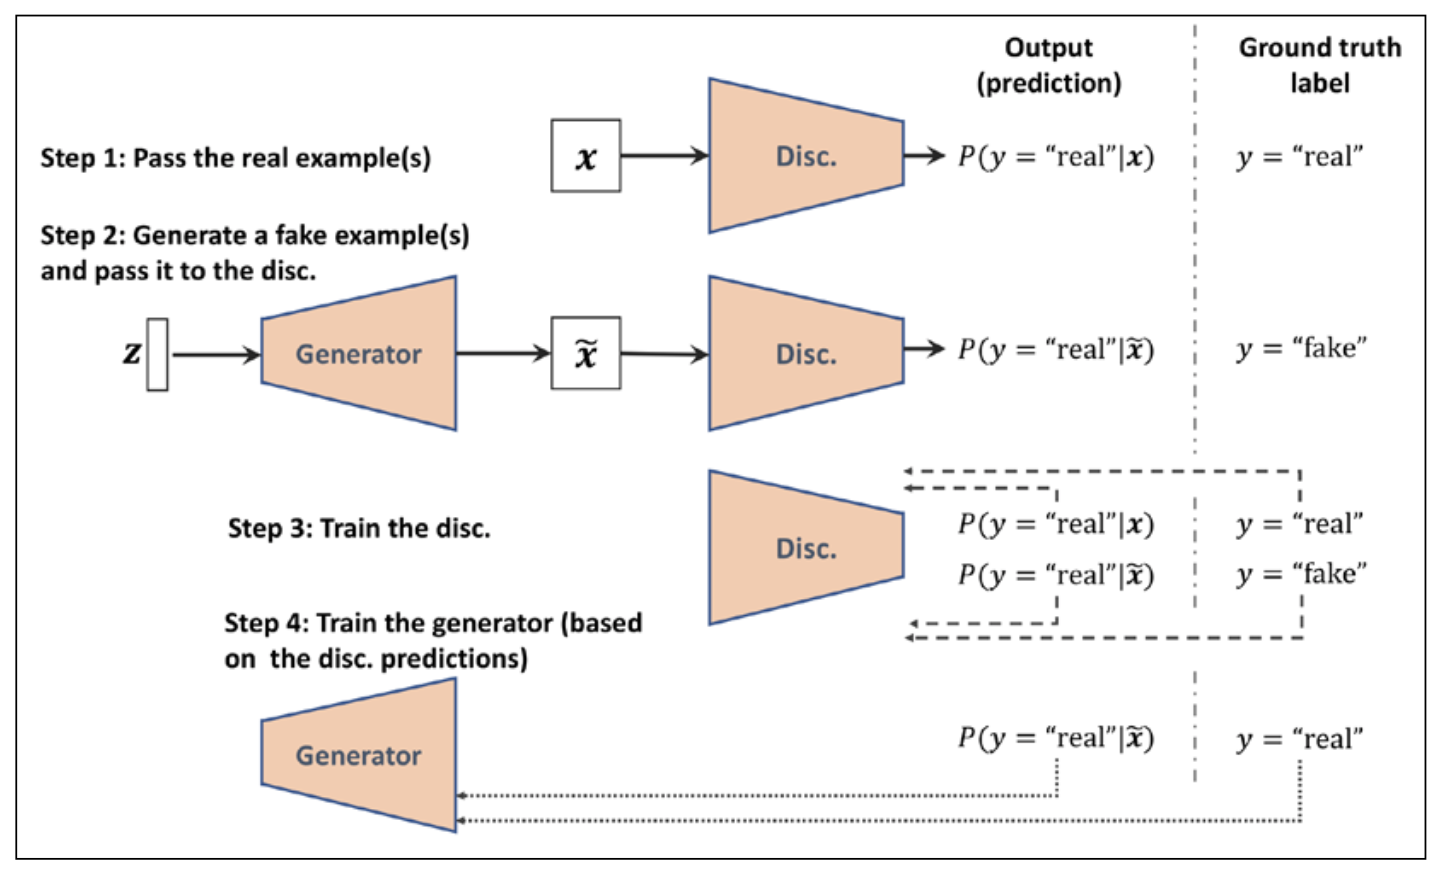

In [14]:
from IPython.display import Image
Image(filename='/Users/shovonsengupta/Desktop/All/PayPal - workshop/GAN_1.png',width=600, height=300)

In [11]:
# GAN Model
def create_gan(_discriminator, _generator):
    _discriminator.trainable=False
    gan_input = Input(shape=(100,))
    gan_output= _discriminator(_generator(gan_input))
    _gan= Model(inputs=gan_input, outputs=gan_output)
    _gan.compile(loss='binary_crossentropy', optimizer='adam')
    return _gan

In [12]:
# Model initiation
discriminator_model = discriminator()
generator_model = generator()
gan_model = create_gan(discriminator_model,generator_model)

**Model Params**

In [13]:
# Create folder path if does not exist
if not os.path.exists('output/gan/'):
    os.makedirs('output/gan/') 
save_dir = 'output/gan/'

iterations = 200
batch_size = 20
latent_dim = 100

start = 0

for step in range(iterations):
    # Creating random noise data with dimensions as latent dim
    random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
    generated_images = generator_model.predict(random_latent_vectors)

    stop = start+batch_size
    real_images = x_train[start:stop]

    # Combining real images with generated images
    combined_images = np.concatenate([generated_images,real_images])
    labels = np.concatenate([np.ones((batch_size,1)),np.zeros((batch_size,1))])

    labels += 0.05*np.random.random(labels.shape)
    # calculating discriminator loss
    d_loss = discriminator_model.train_on_batch(combined_images,labels)

    # Training gan for generative loss
    random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
    misleading_targets = np.zeros((batch_size,1))
    g_loss = gan_model.train_on_batch(random_latent_vectors, misleading_targets)

    # Increase batch size every time
    start += batch_size
    if start > len(x_train)-batch_size:
        start=0

    # Print metrics at each increment of 10 steps
    if step%10 == 0:
        print('epoch: ', step,'discriminator loss: ', d_loss,'gen loss: ', g_loss)

        gen_img = generated_images[0].reshape(28,28,1)
        gen_img_2 = image.array_to_img(gen_img*255.,scale=False)
        gen_img_2.save(os.path.join(save_dir,'generated_number_'+str(step)+'.png'))

        real_img = real_images[0].reshape(28,28,1)
        real_img_2 = image.array_to_img(real_img*255.,scale=False)
        real_img_2.save(os.path.join(save_dir,'real_number_'+str(step)+'.png'))

print("Done!")

epoch:  0 discriminator loss:  46.75275421142578 gen loss:  1.770092248916626
epoch:  10 discriminator loss:  7.70632791519165 gen loss:  9.950151443481445
epoch:  20 discriminator loss:  7.065495491027832 gen loss:  10.974016189575195
epoch:  30 discriminator loss:  3.4475860595703125 gen loss:  10.194554328918457
epoch:  40 discriminator loss:  7.847540855407715 gen loss:  6.5628533363342285
epoch:  50 discriminator loss:  3.9631576538085938 gen loss:  2.885267734527588
epoch:  60 discriminator loss:  2.7880449295043945 gen loss:  2.025724172592163
epoch:  70 discriminator loss:  3.2913193702697754 gen loss:  1.2928483486175537
epoch:  80 discriminator loss:  1.997418999671936 gen loss:  1.2504708766937256
epoch:  90 discriminator loss:  1.440124750137329 gen loss:  1.3883793354034424
epoch:  100 discriminator loss:  2.541531801223755 gen loss:  0.7425717115402222
epoch:  110 discriminator loss:  3.142244815826416 gen loss:  0.9544944763183594
epoch:  120 discriminator loss:  1.45314

**Some other Example of GAN**

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import BatchNormalization, Input, Dense, Reshape, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [18]:
def build_generator(latent_dim: int):
    """
    Build discriminator network
    :param latent_dim: latent vector size
    """

    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(256),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(np.prod((28, 28, 1)), activation='tanh'),
        # reshape to MNIST image size
        Reshape((28, 28, 1))
    ])

    model.summary()
    
    # the latent input vector z
    z = Input(shape=(latent_dim,))
    generated = model(z)

    # build model from the input and output
    return Model(z, generated)

def build_discriminator():
    """
    Build discriminator network
    """

    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(128),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid'),
    ], name='discriminator')

    model.summary()

    image = Input(shape=(28, 28, 1))
    output = model(image)

    return Model(image, output)

In [19]:
def train(generator, discriminator, combined, steps, batch_size):
    """
    Train the GAN system
    :param generator: generator
    :param discriminator: discriminator
    :param combined: stacked generator and discriminator
    we'll use the combined network when we train the generator
    :param steps: number of alternating steps for training
    :param batch_size: size of the minibatch
    """

    # Load the dataset
    (x_train, _), _ = mnist.load_data()

    # Rescale in [-1, 1] interval
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5
    x_train = np.expand_dims(x_train, axis=-1)

    # Discriminator ground truths
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    latent_dim = generator.input_shape[1]

    for step in range(steps):
        # Train the discriminator

        # Select a random batch of images
        real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]

        # Random batch of noise
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate a batch of new images
        generated_images = generator.predict(noise)

        # Train the discriminator
        discriminator_real_loss = discriminator.train_on_batch(real_images, real)
        discriminator_fake_loss = discriminator.train_on_batch(generated_images, fake)
        discriminator_loss = 0.5 * np.add(discriminator_real_loss, discriminator_fake_loss)

        # Train the generator
        # random latent vector z
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Train the generator
        # Note that we use the "valid" labels for the generated images
        # That's because we try to maximize the discriminator loss
        generator_loss = combined.train_on_batch(noise, real)

        # Display progress
        print("%d [Discriminator loss: %.4f%%, acc.: %.2f%%] [Generator loss: %.4f%%]" %
              (step, discriminator_loss[0], 100 * discriminator_loss[1], generator_loss))

In [20]:
def plot_generated_images(generator):
    """
    Display a nxn 2D manifold of digits
    :param generator: the generator
    """
    n = 10
    digit_size = 28

    # big array containing all images
    figure = np.zeros((digit_size * n, digit_size * n))

    latent_dim = generator.input_shape[1]

    # n*n random latent distributions
    noise = np.random.normal(0, 1, (n * n, latent_dim))

    # generate the images
    generated_images = generator.predict(noise)

    # fill the big array with images
    for i in range(n):
        for j in range(n):
            slice_i = slice(i * digit_size, (i + 1) * digit_size)
            slice_j = slice(j * digit_size, (j + 1) * digit_size)
            figure[slice_i, slice_j] = np.reshape(generated_images[i * n + j], (28, 28))

    # plot the results
    plt.figure(figsize=(6, 5))
    plt.axis('off')
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 233,985
Trainable params: 233,985
Non-trainable params: 0
_______________________________________________

74 [Discriminator loss: 0.0342%, acc.: 100.00%] [Generator loss: 2.8477%]
75 [Discriminator loss: 0.0384%, acc.: 100.00%] [Generator loss: 2.8723%]
76 [Discriminator loss: 0.0375%, acc.: 100.00%] [Generator loss: 2.8774%]
77 [Discriminator loss: 0.0383%, acc.: 100.00%] [Generator loss: 2.8162%]
78 [Discriminator loss: 0.0363%, acc.: 100.00%] [Generator loss: 2.8714%]
79 [Discriminator loss: 0.0364%, acc.: 100.00%] [Generator loss: 2.9500%]
80 [Discriminator loss: 0.0378%, acc.: 100.00%] [Generator loss: 2.9716%]
81 [Discriminator loss: 0.0369%, acc.: 100.00%] [Generator loss: 2.9165%]
82 [Discriminator loss: 0.0353%, acc.: 100.00%] [Generator loss: 2.9517%]
83 [Discriminator loss: 0.0333%, acc.: 100.00%] [Generator loss: 2.9989%]
84 [Discriminator loss: 0.0332%, acc.: 100.00%] [Generator loss: 2.9820%]
85 [Discriminator loss: 0.0301%, acc.: 100.00%] [Generator loss: 2.9951%]
86 [Discriminator loss: 0.0351%, acc.: 100.00%] [Generator loss: 2.9521%]
87 [Discriminator loss: 0.0317%, acc.:

186 [Discriminator loss: 0.2780%, acc.: 89.06%] [Generator loss: 2.4043%]
187 [Discriminator loss: 0.1929%, acc.: 91.02%] [Generator loss: 2.5870%]
188 [Discriminator loss: 0.0673%, acc.: 98.83%] [Generator loss: 3.0463%]
189 [Discriminator loss: 0.0739%, acc.: 98.83%] [Generator loss: 3.1965%]
190 [Discriminator loss: 0.1158%, acc.: 96.48%] [Generator loss: 2.8835%]
191 [Discriminator loss: 0.0677%, acc.: 100.00%] [Generator loss: 3.0964%]
192 [Discriminator loss: 0.1512%, acc.: 93.75%] [Generator loss: 2.7907%]
193 [Discriminator loss: 0.0959%, acc.: 96.88%] [Generator loss: 2.9331%]
194 [Discriminator loss: 0.1814%, acc.: 93.75%] [Generator loss: 2.5635%]
195 [Discriminator loss: 0.0975%, acc.: 97.27%] [Generator loss: 3.0355%]
196 [Discriminator loss: 0.2539%, acc.: 88.67%] [Generator loss: 2.4510%]
197 [Discriminator loss: 0.1545%, acc.: 92.97%] [Generator loss: 3.0098%]
198 [Discriminator loss: 0.3186%, acc.: 85.55%] [Generator loss: 2.4761%]
199 [Discriminator loss: 0.1030%, acc

298 [Discriminator loss: 0.1786%, acc.: 91.80%] [Generator loss: 2.5844%]
299 [Discriminator loss: 0.4651%, acc.: 77.34%] [Generator loss: 1.7560%]
300 [Discriminator loss: 0.2917%, acc.: 79.69%] [Generator loss: 2.3188%]
301 [Discriminator loss: 0.2206%, acc.: 95.31%] [Generator loss: 2.2887%]
302 [Discriminator loss: 0.2399%, acc.: 91.41%] [Generator loss: 2.2048%]
303 [Discriminator loss: 0.2318%, acc.: 92.19%] [Generator loss: 2.4000%]
304 [Discriminator loss: 0.2846%, acc.: 85.16%] [Generator loss: 2.2061%]
305 [Discriminator loss: 0.2716%, acc.: 86.72%] [Generator loss: 2.3480%]
306 [Discriminator loss: 0.2955%, acc.: 84.77%] [Generator loss: 2.1692%]
307 [Discriminator loss: 0.2337%, acc.: 91.41%] [Generator loss: 2.3357%]
308 [Discriminator loss: 0.3043%, acc.: 84.77%] [Generator loss: 2.1442%]
309 [Discriminator loss: 0.2073%, acc.: 93.36%] [Generator loss: 2.3579%]
310 [Discriminator loss: 0.3236%, acc.: 85.16%] [Generator loss: 1.8625%]
311 [Discriminator loss: 0.2024%, acc.

409 [Discriminator loss: 0.4836%, acc.: 72.27%] [Generator loss: 1.5495%]
410 [Discriminator loss: 0.2830%, acc.: 87.50%] [Generator loss: 2.3450%]
411 [Discriminator loss: 0.4502%, acc.: 77.34%] [Generator loss: 1.7238%]
412 [Discriminator loss: 0.3107%, acc.: 84.77%] [Generator loss: 2.0706%]
413 [Discriminator loss: 0.3543%, acc.: 83.98%] [Generator loss: 1.9909%]
414 [Discriminator loss: 0.3684%, acc.: 81.25%] [Generator loss: 2.0499%]
415 [Discriminator loss: 0.3664%, acc.: 80.08%] [Generator loss: 2.0552%]
416 [Discriminator loss: 0.3888%, acc.: 78.91%] [Generator loss: 1.9818%]
417 [Discriminator loss: 0.3521%, acc.: 79.30%] [Generator loss: 2.1125%]
418 [Discriminator loss: 0.4456%, acc.: 76.56%] [Generator loss: 1.6719%]
419 [Discriminator loss: 0.2890%, acc.: 90.62%] [Generator loss: 2.0812%]
420 [Discriminator loss: 0.4118%, acc.: 80.08%] [Generator loss: 1.7560%]
421 [Discriminator loss: 0.3067%, acc.: 88.28%] [Generator loss: 1.9475%]
422 [Discriminator loss: 0.3806%, acc.

521 [Discriminator loss: 0.5585%, acc.: 67.97%] [Generator loss: 1.1362%]
522 [Discriminator loss: 0.6433%, acc.: 52.34%] [Generator loss: 1.0512%]
523 [Discriminator loss: 0.6202%, acc.: 57.03%] [Generator loss: 1.0651%]
524 [Discriminator loss: 0.6024%, acc.: 62.11%] [Generator loss: 1.1383%]
525 [Discriminator loss: 0.5797%, acc.: 64.06%] [Generator loss: 1.1485%]
526 [Discriminator loss: 0.6153%, acc.: 58.59%] [Generator loss: 1.0522%]
527 [Discriminator loss: 0.5627%, acc.: 65.23%] [Generator loss: 1.1590%]
528 [Discriminator loss: 0.6378%, acc.: 56.64%] [Generator loss: 1.0163%]
529 [Discriminator loss: 0.6010%, acc.: 58.59%] [Generator loss: 1.0711%]
530 [Discriminator loss: 0.6328%, acc.: 54.69%] [Generator loss: 1.0172%]
531 [Discriminator loss: 0.6062%, acc.: 56.64%] [Generator loss: 1.0936%]
532 [Discriminator loss: 0.6349%, acc.: 63.67%] [Generator loss: 1.0064%]
533 [Discriminator loss: 0.6134%, acc.: 60.16%] [Generator loss: 1.0176%]
534 [Discriminator loss: 0.6338%, acc.

633 [Discriminator loss: 0.6533%, acc.: 49.22%] [Generator loss: 0.9414%]
634 [Discriminator loss: 0.6159%, acc.: 56.25%] [Generator loss: 0.9820%]
635 [Discriminator loss: 0.6238%, acc.: 56.25%] [Generator loss: 0.9673%]
636 [Discriminator loss: 0.6669%, acc.: 47.27%] [Generator loss: 0.9055%]
637 [Discriminator loss: 0.6213%, acc.: 57.81%] [Generator loss: 0.9524%]
638 [Discriminator loss: 0.6366%, acc.: 56.25%] [Generator loss: 0.9539%]
639 [Discriminator loss: 0.6608%, acc.: 50.78%] [Generator loss: 0.9331%]
640 [Discriminator loss: 0.6400%, acc.: 51.56%] [Generator loss: 0.9526%]
641 [Discriminator loss: 0.6573%, acc.: 49.22%] [Generator loss: 0.9425%]
642 [Discriminator loss: 0.6495%, acc.: 52.34%] [Generator loss: 0.9323%]
643 [Discriminator loss: 0.6443%, acc.: 53.91%] [Generator loss: 0.9369%]
644 [Discriminator loss: 0.6559%, acc.: 52.73%] [Generator loss: 0.9373%]
645 [Discriminator loss: 0.6633%, acc.: 49.61%] [Generator loss: 0.9375%]
646 [Discriminator loss: 0.6507%, acc.

745 [Discriminator loss: 0.6740%, acc.: 40.62%] [Generator loss: 0.9216%]
746 [Discriminator loss: 0.6920%, acc.: 37.89%] [Generator loss: 0.9110%]
747 [Discriminator loss: 0.7010%, acc.: 38.28%] [Generator loss: 0.9030%]
748 [Discriminator loss: 0.6895%, acc.: 40.23%] [Generator loss: 0.9064%]
749 [Discriminator loss: 0.6889%, acc.: 41.41%] [Generator loss: 0.9046%]
750 [Discriminator loss: 0.6919%, acc.: 40.62%] [Generator loss: 0.9034%]
751 [Discriminator loss: 0.6750%, acc.: 41.02%] [Generator loss: 0.9082%]
752 [Discriminator loss: 0.6919%, acc.: 43.36%] [Generator loss: 0.8883%]
753 [Discriminator loss: 0.6832%, acc.: 46.88%] [Generator loss: 0.8946%]
754 [Discriminator loss: 0.6860%, acc.: 50.39%] [Generator loss: 0.9154%]
755 [Discriminator loss: 0.6900%, acc.: 46.09%] [Generator loss: 0.9087%]
756 [Discriminator loss: 0.6985%, acc.: 38.67%] [Generator loss: 0.9094%]
757 [Discriminator loss: 0.6929%, acc.: 41.80%] [Generator loss: 0.8964%]
758 [Discriminator loss: 0.6945%, acc.

857 [Discriminator loss: 0.7343%, acc.: 40.62%] [Generator loss: 0.8425%]
858 [Discriminator loss: 0.7019%, acc.: 43.36%] [Generator loss: 0.8601%]
859 [Discriminator loss: 0.7250%, acc.: 35.94%] [Generator loss: 0.8609%]
860 [Discriminator loss: 0.7127%, acc.: 40.62%] [Generator loss: 0.8696%]
861 [Discriminator loss: 0.7272%, acc.: 35.55%] [Generator loss: 0.8596%]
862 [Discriminator loss: 0.7140%, acc.: 41.02%] [Generator loss: 0.8559%]
863 [Discriminator loss: 0.7161%, acc.: 40.62%] [Generator loss: 0.8680%]
864 [Discriminator loss: 0.7289%, acc.: 34.38%] [Generator loss: 0.8554%]
865 [Discriminator loss: 0.7293%, acc.: 33.20%] [Generator loss: 0.8641%]
866 [Discriminator loss: 0.7217%, acc.: 36.33%] [Generator loss: 0.8658%]
867 [Discriminator loss: 0.7160%, acc.: 36.72%] [Generator loss: 0.8607%]
868 [Discriminator loss: 0.7124%, acc.: 39.06%] [Generator loss: 0.8596%]
869 [Discriminator loss: 0.7079%, acc.: 38.28%] [Generator loss: 0.8670%]
870 [Discriminator loss: 0.7156%, acc.

968 [Discriminator loss: 0.7275%, acc.: 33.20%] [Generator loss: 0.8523%]
969 [Discriminator loss: 0.7141%, acc.: 37.11%] [Generator loss: 0.8463%]
970 [Discriminator loss: 0.7174%, acc.: 40.23%] [Generator loss: 0.8477%]
971 [Discriminator loss: 0.7150%, acc.: 34.77%] [Generator loss: 0.8564%]
972 [Discriminator loss: 0.7247%, acc.: 32.42%] [Generator loss: 0.8521%]
973 [Discriminator loss: 0.7299%, acc.: 31.25%] [Generator loss: 0.8490%]
974 [Discriminator loss: 0.7037%, acc.: 40.62%] [Generator loss: 0.8558%]
975 [Discriminator loss: 0.7151%, acc.: 33.59%] [Generator loss: 0.8570%]
976 [Discriminator loss: 0.7144%, acc.: 36.33%] [Generator loss: 0.8531%]
977 [Discriminator loss: 0.7137%, acc.: 34.38%] [Generator loss: 0.8557%]
978 [Discriminator loss: 0.7092%, acc.: 36.33%] [Generator loss: 0.8581%]
979 [Discriminator loss: 0.7191%, acc.: 34.77%] [Generator loss: 0.8491%]
980 [Discriminator loss: 0.7136%, acc.: 39.84%] [Generator loss: 0.8516%]
981 [Discriminator loss: 0.7076%, acc.

1081 [Discriminator loss: 0.7191%, acc.: 42.19%] [Generator loss: 0.8415%]
1082 [Discriminator loss: 0.7268%, acc.: 37.89%] [Generator loss: 0.8254%]
1083 [Discriminator loss: 0.7325%, acc.: 33.20%] [Generator loss: 0.8185%]
1084 [Discriminator loss: 0.7237%, acc.: 35.94%] [Generator loss: 0.8222%]
1085 [Discriminator loss: 0.7205%, acc.: 37.11%] [Generator loss: 0.8272%]
1086 [Discriminator loss: 0.7154%, acc.: 33.98%] [Generator loss: 0.8304%]
1087 [Discriminator loss: 0.7311%, acc.: 30.08%] [Generator loss: 0.8215%]
1088 [Discriminator loss: 0.7344%, acc.: 35.55%] [Generator loss: 0.8192%]
1089 [Discriminator loss: 0.7152%, acc.: 37.11%] [Generator loss: 0.8263%]
1090 [Discriminator loss: 0.7201%, acc.: 31.25%] [Generator loss: 0.8280%]
1091 [Discriminator loss: 0.7389%, acc.: 34.38%] [Generator loss: 0.8262%]
1092 [Discriminator loss: 0.7224%, acc.: 34.77%] [Generator loss: 0.8313%]
1093 [Discriminator loss: 0.7355%, acc.: 29.30%] [Generator loss: 0.8278%]
1094 [Discriminator loss:

1193 [Discriminator loss: 0.7270%, acc.: 32.03%] [Generator loss: 0.8138%]
1194 [Discriminator loss: 0.7158%, acc.: 32.81%] [Generator loss: 0.8246%]
1195 [Discriminator loss: 0.7229%, acc.: 33.20%] [Generator loss: 0.8164%]
1196 [Discriminator loss: 0.7156%, acc.: 32.42%] [Generator loss: 0.8231%]
1197 [Discriminator loss: 0.7249%, acc.: 30.08%] [Generator loss: 0.8217%]
1198 [Discriminator loss: 0.7315%, acc.: 28.52%] [Generator loss: 0.8159%]
1199 [Discriminator loss: 0.7229%, acc.: 30.47%] [Generator loss: 0.8174%]
1200 [Discriminator loss: 0.7272%, acc.: 28.12%] [Generator loss: 0.8213%]
1201 [Discriminator loss: 0.7222%, acc.: 32.03%] [Generator loss: 0.8222%]
1202 [Discriminator loss: 0.7314%, acc.: 28.12%] [Generator loss: 0.8112%]
1203 [Discriminator loss: 0.7268%, acc.: 30.47%] [Generator loss: 0.8093%]
1204 [Discriminator loss: 0.7230%, acc.: 36.72%] [Generator loss: 0.8154%]
1205 [Discriminator loss: 0.7158%, acc.: 39.84%] [Generator loss: 0.8133%]
1206 [Discriminator loss:

1305 [Discriminator loss: 0.7083%, acc.: 37.11%] [Generator loss: 0.8018%]
1306 [Discriminator loss: 0.7205%, acc.: 43.75%] [Generator loss: 0.8049%]
1307 [Discriminator loss: 0.7131%, acc.: 41.80%] [Generator loss: 0.8030%]
1308 [Discriminator loss: 0.7162%, acc.: 39.06%] [Generator loss: 0.8123%]
1309 [Discriminator loss: 0.7135%, acc.: 32.03%] [Generator loss: 0.8063%]
1310 [Discriminator loss: 0.7182%, acc.: 29.30%] [Generator loss: 0.8068%]
1311 [Discriminator loss: 0.7191%, acc.: 31.64%] [Generator loss: 0.8018%]
1312 [Discriminator loss: 0.7091%, acc.: 33.59%] [Generator loss: 0.8120%]
1313 [Discriminator loss: 0.7185%, acc.: 29.69%] [Generator loss: 0.8095%]
1314 [Discriminator loss: 0.7056%, acc.: 34.38%] [Generator loss: 0.8136%]
1315 [Discriminator loss: 0.7110%, acc.: 30.86%] [Generator loss: 0.8076%]
1316 [Discriminator loss: 0.7143%, acc.: 31.64%] [Generator loss: 0.8103%]
1317 [Discriminator loss: 0.7179%, acc.: 29.30%] [Generator loss: 0.8059%]
1318 [Discriminator loss:

1416 [Discriminator loss: 0.7319%, acc.: 26.17%] [Generator loss: 0.7806%]
1417 [Discriminator loss: 0.7411%, acc.: 24.61%] [Generator loss: 0.7845%]
1418 [Discriminator loss: 0.7365%, acc.: 23.05%] [Generator loss: 0.7833%]
1419 [Discriminator loss: 0.7235%, acc.: 32.81%] [Generator loss: 0.7884%]
1420 [Discriminator loss: 0.7334%, acc.: 24.22%] [Generator loss: 0.7893%]
1421 [Discriminator loss: 0.7307%, acc.: 25.00%] [Generator loss: 0.7890%]
1422 [Discriminator loss: 0.7285%, acc.: 26.17%] [Generator loss: 0.7894%]
1423 [Discriminator loss: 0.7255%, acc.: 28.52%] [Generator loss: 0.7906%]
1424 [Discriminator loss: 0.7257%, acc.: 26.17%] [Generator loss: 0.7913%]
1425 [Discriminator loss: 0.7291%, acc.: 27.73%] [Generator loss: 0.7951%]
1426 [Discriminator loss: 0.7256%, acc.: 30.08%] [Generator loss: 0.7897%]
1427 [Discriminator loss: 0.7290%, acc.: 28.52%] [Generator loss: 0.7936%]
1428 [Discriminator loss: 0.7282%, acc.: 24.61%] [Generator loss: 0.7915%]
1429 [Discriminator loss:

1527 [Discriminator loss: 0.7294%, acc.: 25.39%] [Generator loss: 0.7925%]
1528 [Discriminator loss: 0.7321%, acc.: 24.22%] [Generator loss: 0.7904%]
1529 [Discriminator loss: 0.7324%, acc.: 25.39%] [Generator loss: 0.7906%]
1530 [Discriminator loss: 0.7305%, acc.: 25.78%] [Generator loss: 0.7836%]
1531 [Discriminator loss: 0.7242%, acc.: 30.47%] [Generator loss: 0.7989%]
1532 [Discriminator loss: 0.7299%, acc.: 30.47%] [Generator loss: 0.7995%]
1533 [Discriminator loss: 0.7169%, acc.: 36.33%] [Generator loss: 0.7977%]
1534 [Discriminator loss: 0.7350%, acc.: 23.83%] [Generator loss: 0.7922%]
1535 [Discriminator loss: 0.7257%, acc.: 29.69%] [Generator loss: 0.7997%]
1536 [Discriminator loss: 0.7287%, acc.: 29.30%] [Generator loss: 0.7883%]
1537 [Discriminator loss: 0.7330%, acc.: 27.34%] [Generator loss: 0.7888%]
1538 [Discriminator loss: 0.7297%, acc.: 28.12%] [Generator loss: 0.7889%]
1539 [Discriminator loss: 0.7237%, acc.: 29.30%] [Generator loss: 0.7886%]
1540 [Discriminator loss:

1638 [Discriminator loss: 0.6828%, acc.: 43.75%] [Generator loss: 0.8226%]
1639 [Discriminator loss: 0.6976%, acc.: 37.89%] [Generator loss: 0.8361%]
1640 [Discriminator loss: 0.6939%, acc.: 39.84%] [Generator loss: 0.8360%]
1641 [Discriminator loss: 0.7015%, acc.: 31.25%] [Generator loss: 0.8299%]
1642 [Discriminator loss: 0.6856%, acc.: 43.75%] [Generator loss: 0.8369%]
1643 [Discriminator loss: 0.6770%, acc.: 51.95%] [Generator loss: 0.8420%]
1644 [Discriminator loss: 0.6842%, acc.: 46.88%] [Generator loss: 0.8393%]
1645 [Discriminator loss: 0.6907%, acc.: 41.80%] [Generator loss: 0.8302%]
1646 [Discriminator loss: 0.6842%, acc.: 46.09%] [Generator loss: 0.8423%]
1647 [Discriminator loss: 0.6803%, acc.: 53.91%] [Generator loss: 0.8347%]
1648 [Discriminator loss: 0.6839%, acc.: 50.00%] [Generator loss: 0.8480%]
1649 [Discriminator loss: 0.6690%, acc.: 48.83%] [Generator loss: 0.8508%]
1650 [Discriminator loss: 0.6757%, acc.: 50.00%] [Generator loss: 0.8527%]
1651 [Discriminator loss:

1751 [Discriminator loss: 0.7213%, acc.: 39.84%] [Generator loss: 0.7865%]
1752 [Discriminator loss: 0.7202%, acc.: 41.02%] [Generator loss: 0.7918%]
1753 [Discriminator loss: 0.7147%, acc.: 43.36%] [Generator loss: 0.7891%]
1754 [Discriminator loss: 0.7295%, acc.: 36.72%] [Generator loss: 0.7808%]
1755 [Discriminator loss: 0.7333%, acc.: 31.64%] [Generator loss: 0.7750%]
1756 [Discriminator loss: 0.7145%, acc.: 36.72%] [Generator loss: 0.7834%]
1757 [Discriminator loss: 0.7211%, acc.: 32.81%] [Generator loss: 0.7867%]
1758 [Discriminator loss: 0.7249%, acc.: 35.94%] [Generator loss: 0.7909%]
1759 [Discriminator loss: 0.7202%, acc.: 32.03%] [Generator loss: 0.7927%]
1760 [Discriminator loss: 0.7172%, acc.: 36.33%] [Generator loss: 0.7871%]
1761 [Discriminator loss: 0.7275%, acc.: 21.09%] [Generator loss: 0.7846%]
1762 [Discriminator loss: 0.7163%, acc.: 33.59%] [Generator loss: 0.7830%]
1763 [Discriminator loss: 0.7255%, acc.: 31.64%] [Generator loss: 0.7814%]
1764 [Discriminator loss:

1862 [Discriminator loss: 0.6951%, acc.: 47.66%] [Generator loss: 0.8211%]
1863 [Discriminator loss: 0.6847%, acc.: 46.88%] [Generator loss: 0.8273%]
1864 [Discriminator loss: 0.6818%, acc.: 53.52%] [Generator loss: 0.8214%]
1865 [Discriminator loss: 0.6848%, acc.: 53.52%] [Generator loss: 0.8226%]
1866 [Discriminator loss: 0.6902%, acc.: 56.25%] [Generator loss: 0.8226%]
1867 [Discriminator loss: 0.6857%, acc.: 55.08%] [Generator loss: 0.8232%]
1868 [Discriminator loss: 0.6935%, acc.: 47.27%] [Generator loss: 0.8367%]
1869 [Discriminator loss: 0.6845%, acc.: 55.08%] [Generator loss: 0.8368%]
1870 [Discriminator loss: 0.6980%, acc.: 47.66%] [Generator loss: 0.8268%]
1871 [Discriminator loss: 0.6814%, acc.: 51.17%] [Generator loss: 0.8469%]
1872 [Discriminator loss: 0.6848%, acc.: 53.12%] [Generator loss: 0.8456%]
1873 [Discriminator loss: 0.6879%, acc.: 53.12%] [Generator loss: 0.8505%]
1874 [Discriminator loss: 0.7005%, acc.: 48.44%] [Generator loss: 0.8381%]
1875 [Discriminator loss:

1974 [Discriminator loss: 0.6532%, acc.: 63.28%] [Generator loss: 0.8514%]
1975 [Discriminator loss: 0.6757%, acc.: 54.30%] [Generator loss: 0.8425%]
1976 [Discriminator loss: 0.6826%, acc.: 55.86%] [Generator loss: 0.8322%]
1977 [Discriminator loss: 0.6684%, acc.: 57.03%] [Generator loss: 0.8541%]
1978 [Discriminator loss: 0.6487%, acc.: 62.11%] [Generator loss: 0.8691%]
1979 [Discriminator loss: 0.6672%, acc.: 58.59%] [Generator loss: 0.8470%]
1980 [Discriminator loss: 0.6723%, acc.: 55.47%] [Generator loss: 0.8475%]
1981 [Discriminator loss: 0.6617%, acc.: 60.55%] [Generator loss: 0.8523%]
1982 [Discriminator loss: 0.6829%, acc.: 53.52%] [Generator loss: 0.8403%]
1983 [Discriminator loss: 0.6562%, acc.: 59.38%] [Generator loss: 0.8345%]
1984 [Discriminator loss: 0.6740%, acc.: 58.59%] [Generator loss: 0.8590%]
1985 [Discriminator loss: 0.6664%, acc.: 60.55%] [Generator loss: 0.8524%]
1986 [Discriminator loss: 0.6811%, acc.: 53.52%] [Generator loss: 0.8475%]
1987 [Discriminator loss:

2085 [Discriminator loss: 0.6458%, acc.: 69.14%] [Generator loss: 0.8666%]
2086 [Discriminator loss: 0.6545%, acc.: 63.67%] [Generator loss: 0.8755%]
2087 [Discriminator loss: 0.6569%, acc.: 66.80%] [Generator loss: 0.8689%]
2088 [Discriminator loss: 0.6429%, acc.: 70.31%] [Generator loss: 0.8652%]
2089 [Discriminator loss: 0.6599%, acc.: 64.84%] [Generator loss: 0.8779%]
2090 [Discriminator loss: 0.6508%, acc.: 64.45%] [Generator loss: 0.8788%]
2091 [Discriminator loss: 0.6463%, acc.: 65.62%] [Generator loss: 0.8822%]
2092 [Discriminator loss: 0.6556%, acc.: 67.97%] [Generator loss: 0.8679%]
2093 [Discriminator loss: 0.6540%, acc.: 64.84%] [Generator loss: 0.8558%]
2094 [Discriminator loss: 0.6456%, acc.: 69.92%] [Generator loss: 0.8680%]
2095 [Discriminator loss: 0.6554%, acc.: 64.84%] [Generator loss: 0.8517%]
2096 [Discriminator loss: 0.6714%, acc.: 57.42%] [Generator loss: 0.8504%]
2097 [Discriminator loss: 0.6577%, acc.: 64.06%] [Generator loss: 0.8664%]
2098 [Discriminator loss:

2197 [Discriminator loss: 0.6724%, acc.: 55.08%] [Generator loss: 0.8803%]
2198 [Discriminator loss: 0.6623%, acc.: 56.64%] [Generator loss: 0.8809%]
2199 [Discriminator loss: 0.6645%, acc.: 56.64%] [Generator loss: 0.8902%]
2200 [Discriminator loss: 0.6745%, acc.: 53.91%] [Generator loss: 0.8785%]
2201 [Discriminator loss: 0.6777%, acc.: 52.34%] [Generator loss: 0.8613%]
2202 [Discriminator loss: 0.6636%, acc.: 53.12%] [Generator loss: 0.8982%]
2203 [Discriminator loss: 0.6588%, acc.: 58.20%] [Generator loss: 0.8963%]
2204 [Discriminator loss: 0.6826%, acc.: 50.78%] [Generator loss: 0.8840%]
2205 [Discriminator loss: 0.6769%, acc.: 49.61%] [Generator loss: 0.8756%]
2206 [Discriminator loss: 0.6889%, acc.: 48.83%] [Generator loss: 0.8542%]
2207 [Discriminator loss: 0.6451%, acc.: 61.72%] [Generator loss: 0.8747%]
2208 [Discriminator loss: 0.6809%, acc.: 51.95%] [Generator loss: 0.8912%]
2209 [Discriminator loss: 0.6562%, acc.: 58.98%] [Generator loss: 0.8925%]
2210 [Discriminator loss:

2309 [Discriminator loss: 0.6513%, acc.: 66.80%] [Generator loss: 0.9096%]
2310 [Discriminator loss: 0.6511%, acc.: 67.19%] [Generator loss: 0.9241%]
2311 [Discriminator loss: 0.6591%, acc.: 63.28%] [Generator loss: 0.9093%]
2312 [Discriminator loss: 0.6555%, acc.: 60.55%] [Generator loss: 0.9102%]
2313 [Discriminator loss: 0.6660%, acc.: 55.86%] [Generator loss: 0.9002%]
2314 [Discriminator loss: 0.6684%, acc.: 55.08%] [Generator loss: 0.8819%]
2315 [Discriminator loss: 0.6500%, acc.: 64.84%] [Generator loss: 0.8905%]
2316 [Discriminator loss: 0.6637%, acc.: 65.62%] [Generator loss: 0.8749%]
2317 [Discriminator loss: 0.6515%, acc.: 67.97%] [Generator loss: 0.8911%]
2318 [Discriminator loss: 0.6622%, acc.: 66.02%] [Generator loss: 0.8847%]
2319 [Discriminator loss: 0.6612%, acc.: 59.38%] [Generator loss: 0.8864%]
2320 [Discriminator loss: 0.6537%, acc.: 57.81%] [Generator loss: 0.9037%]
2321 [Discriminator loss: 0.6495%, acc.: 64.06%] [Generator loss: 0.9067%]
2322 [Discriminator loss:

2421 [Discriminator loss: 0.6126%, acc.: 70.31%] [Generator loss: 1.0186%]
2422 [Discriminator loss: 0.6249%, acc.: 66.02%] [Generator loss: 1.0061%]
2423 [Discriminator loss: 0.6002%, acc.: 73.44%] [Generator loss: 1.0032%]
2424 [Discriminator loss: 0.6163%, acc.: 68.75%] [Generator loss: 0.9747%]
2425 [Discriminator loss: 0.6221%, acc.: 65.62%] [Generator loss: 0.9901%]
2426 [Discriminator loss: 0.5957%, acc.: 72.27%] [Generator loss: 1.0213%]
2427 [Discriminator loss: 0.5912%, acc.: 73.44%] [Generator loss: 1.0154%]
2428 [Discriminator loss: 0.6045%, acc.: 73.44%] [Generator loss: 1.0126%]
2429 [Discriminator loss: 0.6166%, acc.: 72.27%] [Generator loss: 1.0180%]
2430 [Discriminator loss: 0.6070%, acc.: 71.88%] [Generator loss: 1.0018%]
2431 [Discriminator loss: 0.5929%, acc.: 73.05%] [Generator loss: 1.0109%]
2432 [Discriminator loss: 0.6188%, acc.: 66.41%] [Generator loss: 1.0206%]
2433 [Discriminator loss: 0.6160%, acc.: 73.83%] [Generator loss: 1.0108%]
2434 [Discriminator loss:

2533 [Discriminator loss: 0.6763%, acc.: 51.95%] [Generator loss: 0.8997%]
2534 [Discriminator loss: 0.6731%, acc.: 52.34%] [Generator loss: 0.9214%]
2535 [Discriminator loss: 0.6758%, acc.: 53.52%] [Generator loss: 0.9131%]
2536 [Discriminator loss: 0.6790%, acc.: 48.83%] [Generator loss: 0.9134%]
2537 [Discriminator loss: 0.6663%, acc.: 55.08%] [Generator loss: 0.9516%]
2538 [Discriminator loss: 0.6668%, acc.: 57.03%] [Generator loss: 0.9286%]
2539 [Discriminator loss: 0.6810%, acc.: 51.95%] [Generator loss: 0.9440%]
2540 [Discriminator loss: 0.6592%, acc.: 61.72%] [Generator loss: 0.9052%]
2541 [Discriminator loss: 0.6589%, acc.: 58.20%] [Generator loss: 0.9195%]
2542 [Discriminator loss: 0.6606%, acc.: 56.25%] [Generator loss: 0.9046%]
2543 [Discriminator loss: 0.6668%, acc.: 51.56%] [Generator loss: 0.9091%]
2544 [Discriminator loss: 0.6433%, acc.: 61.72%] [Generator loss: 0.9399%]
2545 [Discriminator loss: 0.6510%, acc.: 61.33%] [Generator loss: 0.9580%]
2546 [Discriminator loss:

2644 [Discriminator loss: 0.6340%, acc.: 64.84%] [Generator loss: 0.9250%]
2645 [Discriminator loss: 0.6235%, acc.: 63.28%] [Generator loss: 0.9304%]
2646 [Discriminator loss: 0.6229%, acc.: 65.23%] [Generator loss: 0.9416%]
2647 [Discriminator loss: 0.6400%, acc.: 62.50%] [Generator loss: 0.9292%]
2648 [Discriminator loss: 0.6420%, acc.: 64.06%] [Generator loss: 0.9147%]
2649 [Discriminator loss: 0.6311%, acc.: 66.02%] [Generator loss: 0.9424%]
2650 [Discriminator loss: 0.6566%, acc.: 62.50%] [Generator loss: 0.9222%]
2651 [Discriminator loss: 0.6444%, acc.: 66.80%] [Generator loss: 0.9426%]
2652 [Discriminator loss: 0.6432%, acc.: 61.72%] [Generator loss: 0.9331%]
2653 [Discriminator loss: 0.6149%, acc.: 67.19%] [Generator loss: 0.9144%]
2654 [Discriminator loss: 0.6567%, acc.: 60.55%] [Generator loss: 0.9061%]
2655 [Discriminator loss: 0.6569%, acc.: 64.06%] [Generator loss: 0.9041%]
2656 [Discriminator loss: 0.6324%, acc.: 68.75%] [Generator loss: 0.8951%]
2657 [Discriminator loss:

2757 [Discriminator loss: 0.6316%, acc.: 62.50%] [Generator loss: 0.9950%]
2758 [Discriminator loss: 0.6189%, acc.: 63.67%] [Generator loss: 0.9766%]
2759 [Discriminator loss: 0.6268%, acc.: 64.45%] [Generator loss: 0.9884%]
2760 [Discriminator loss: 0.6210%, acc.: 70.31%] [Generator loss: 0.9604%]
2761 [Discriminator loss: 0.6386%, acc.: 66.02%] [Generator loss: 0.9716%]
2762 [Discriminator loss: 0.6095%, acc.: 70.31%] [Generator loss: 0.9906%]
2763 [Discriminator loss: 0.6201%, acc.: 69.14%] [Generator loss: 1.0036%]
2764 [Discriminator loss: 0.6113%, acc.: 69.14%] [Generator loss: 1.0102%]
2765 [Discriminator loss: 0.6106%, acc.: 71.88%] [Generator loss: 0.9801%]
2766 [Discriminator loss: 0.6121%, acc.: 70.70%] [Generator loss: 0.9609%]
2767 [Discriminator loss: 0.6275%, acc.: 65.62%] [Generator loss: 0.9230%]
2768 [Discriminator loss: 0.6345%, acc.: 61.33%] [Generator loss: 0.9414%]
2769 [Discriminator loss: 0.6458%, acc.: 58.20%] [Generator loss: 0.9458%]
2770 [Discriminator loss:

2869 [Discriminator loss: 0.6473%, acc.: 61.72%] [Generator loss: 0.9307%]
2870 [Discriminator loss: 0.6432%, acc.: 60.94%] [Generator loss: 0.9068%]
2871 [Discriminator loss: 0.6272%, acc.: 68.36%] [Generator loss: 0.9102%]
2872 [Discriminator loss: 0.6523%, acc.: 56.25%] [Generator loss: 0.9446%]
2873 [Discriminator loss: 0.6352%, acc.: 65.62%] [Generator loss: 0.9488%]
2874 [Discriminator loss: 0.6363%, acc.: 64.84%] [Generator loss: 0.9366%]
2875 [Discriminator loss: 0.6589%, acc.: 56.64%] [Generator loss: 0.9055%]
2876 [Discriminator loss: 0.6355%, acc.: 64.06%] [Generator loss: 0.9111%]
2877 [Discriminator loss: 0.6167%, acc.: 68.36%] [Generator loss: 0.9295%]
2878 [Discriminator loss: 0.6446%, acc.: 62.89%] [Generator loss: 0.9449%]
2879 [Discriminator loss: 0.6310%, acc.: 65.23%] [Generator loss: 0.9435%]
2880 [Discriminator loss: 0.6122%, acc.: 70.70%] [Generator loss: 0.9485%]
2881 [Discriminator loss: 0.6479%, acc.: 62.50%] [Generator loss: 0.9123%]
2882 [Discriminator loss:

2980 [Discriminator loss: 0.5989%, acc.: 71.09%] [Generator loss: 0.9868%]
2981 [Discriminator loss: 0.6054%, acc.: 71.88%] [Generator loss: 0.9883%]
2982 [Discriminator loss: 0.6229%, acc.: 68.75%] [Generator loss: 0.9667%]
2983 [Discriminator loss: 0.6606%, acc.: 64.84%] [Generator loss: 0.9225%]
2984 [Discriminator loss: 0.6237%, acc.: 67.58%] [Generator loss: 0.9299%]
2985 [Discriminator loss: 0.6185%, acc.: 66.41%] [Generator loss: 0.9335%]
2986 [Discriminator loss: 0.6007%, acc.: 71.88%] [Generator loss: 1.0023%]
2987 [Discriminator loss: 0.6449%, acc.: 62.50%] [Generator loss: 0.9612%]
2988 [Discriminator loss: 0.6145%, acc.: 66.02%] [Generator loss: 0.9815%]
2989 [Discriminator loss: 0.6225%, acc.: 67.19%] [Generator loss: 0.9566%]
2990 [Discriminator loss: 0.6229%, acc.: 64.84%] [Generator loss: 0.9750%]
2991 [Discriminator loss: 0.6144%, acc.: 68.75%] [Generator loss: 0.9745%]
2992 [Discriminator loss: 0.6507%, acc.: 63.28%] [Generator loss: 0.9684%]
2993 [Discriminator loss:

3092 [Discriminator loss: 0.6804%, acc.: 57.42%] [Generator loss: 0.8824%]
3093 [Discriminator loss: 0.6770%, acc.: 51.95%] [Generator loss: 0.8903%]
3094 [Discriminator loss: 0.6715%, acc.: 56.64%] [Generator loss: 0.8836%]
3095 [Discriminator loss: 0.6456%, acc.: 57.42%] [Generator loss: 0.9188%]
3096 [Discriminator loss: 0.6380%, acc.: 62.89%] [Generator loss: 0.9343%]
3097 [Discriminator loss: 0.6283%, acc.: 64.06%] [Generator loss: 0.9213%]
3098 [Discriminator loss: 0.7069%, acc.: 47.27%] [Generator loss: 0.9264%]
3099 [Discriminator loss: 0.6558%, acc.: 57.81%] [Generator loss: 0.9291%]
3100 [Discriminator loss: 0.6370%, acc.: 63.67%] [Generator loss: 0.9225%]
3101 [Discriminator loss: 0.6295%, acc.: 61.33%] [Generator loss: 0.9503%]
3102 [Discriminator loss: 0.6334%, acc.: 66.41%] [Generator loss: 0.9558%]
3103 [Discriminator loss: 0.6604%, acc.: 58.59%] [Generator loss: 0.9283%]
3104 [Discriminator loss: 0.6285%, acc.: 64.06%] [Generator loss: 0.9533%]
3105 [Discriminator loss:

3202 [Discriminator loss: 0.5975%, acc.: 73.44%] [Generator loss: 0.9658%]
3203 [Discriminator loss: 0.6177%, acc.: 70.31%] [Generator loss: 0.9603%]
3204 [Discriminator loss: 0.6378%, acc.: 65.62%] [Generator loss: 0.9528%]
3205 [Discriminator loss: 0.6016%, acc.: 69.14%] [Generator loss: 0.9567%]
3206 [Discriminator loss: 0.6218%, acc.: 71.88%] [Generator loss: 0.9181%]
3207 [Discriminator loss: 0.6234%, acc.: 64.84%] [Generator loss: 0.9154%]
3208 [Discriminator loss: 0.6162%, acc.: 66.02%] [Generator loss: 0.9154%]
3209 [Discriminator loss: 0.6365%, acc.: 67.58%] [Generator loss: 0.9191%]
3210 [Discriminator loss: 0.6121%, acc.: 65.23%] [Generator loss: 0.9025%]
3211 [Discriminator loss: 0.6552%, acc.: 53.91%] [Generator loss: 0.9096%]
3212 [Discriminator loss: 0.6388%, acc.: 62.50%] [Generator loss: 0.9053%]
3213 [Discriminator loss: 0.6166%, acc.: 71.48%] [Generator loss: 0.9451%]
3214 [Discriminator loss: 0.6123%, acc.: 68.75%] [Generator loss: 0.9194%]
3215 [Discriminator loss:

3313 [Discriminator loss: 0.6750%, acc.: 55.08%] [Generator loss: 0.8626%]
3314 [Discriminator loss: 0.6547%, acc.: 62.89%] [Generator loss: 0.9044%]
3315 [Discriminator loss: 0.6330%, acc.: 67.97%] [Generator loss: 0.8718%]
3316 [Discriminator loss: 0.6782%, acc.: 54.30%] [Generator loss: 0.8815%]
3317 [Discriminator loss: 0.6596%, acc.: 59.38%] [Generator loss: 0.8852%]
3318 [Discriminator loss: 0.6466%, acc.: 58.20%] [Generator loss: 0.8787%]
3319 [Discriminator loss: 0.6576%, acc.: 56.64%] [Generator loss: 0.8818%]
3320 [Discriminator loss: 0.6303%, acc.: 60.55%] [Generator loss: 0.9179%]
3321 [Discriminator loss: 0.7028%, acc.: 54.30%] [Generator loss: 0.8796%]
3322 [Discriminator loss: 0.6749%, acc.: 55.47%] [Generator loss: 0.8705%]
3323 [Discriminator loss: 0.6576%, acc.: 60.16%] [Generator loss: 0.8992%]
3324 [Discriminator loss: 0.6188%, acc.: 66.02%] [Generator loss: 0.9413%]
3325 [Discriminator loss: 0.6468%, acc.: 58.20%] [Generator loss: 0.8939%]
3326 [Discriminator loss:

3423 [Discriminator loss: 0.6820%, acc.: 57.42%] [Generator loss: 0.8569%]
3424 [Discriminator loss: 0.6620%, acc.: 60.55%] [Generator loss: 0.8704%]
3425 [Discriminator loss: 0.6462%, acc.: 61.72%] [Generator loss: 0.8428%]
3426 [Discriminator loss: 0.6607%, acc.: 55.86%] [Generator loss: 0.8648%]
3427 [Discriminator loss: 0.6604%, acc.: 59.38%] [Generator loss: 0.8832%]
3428 [Discriminator loss: 0.6733%, acc.: 55.86%] [Generator loss: 0.8905%]
3429 [Discriminator loss: 0.6535%, acc.: 60.94%] [Generator loss: 0.8869%]
3430 [Discriminator loss: 0.6346%, acc.: 63.67%] [Generator loss: 0.9164%]
3431 [Discriminator loss: 0.6572%, acc.: 60.94%] [Generator loss: 0.8901%]
3432 [Discriminator loss: 0.6608%, acc.: 58.98%] [Generator loss: 0.8884%]
3433 [Discriminator loss: 0.6537%, acc.: 60.55%] [Generator loss: 0.8853%]
3434 [Discriminator loss: 0.6534%, acc.: 61.72%] [Generator loss: 0.8735%]
3435 [Discriminator loss: 0.6600%, acc.: 60.16%] [Generator loss: 0.8705%]
3436 [Discriminator loss:

3534 [Discriminator loss: 0.6526%, acc.: 55.86%] [Generator loss: 0.9120%]
3535 [Discriminator loss: 0.6343%, acc.: 65.62%] [Generator loss: 0.8966%]
3536 [Discriminator loss: 0.6549%, acc.: 60.94%] [Generator loss: 0.9118%]
3537 [Discriminator loss: 0.6537%, acc.: 62.11%] [Generator loss: 0.8884%]
3538 [Discriminator loss: 0.6502%, acc.: 61.33%] [Generator loss: 0.9023%]
3539 [Discriminator loss: 0.6404%, acc.: 68.36%] [Generator loss: 0.8932%]
3540 [Discriminator loss: 0.6404%, acc.: 64.06%] [Generator loss: 0.8923%]
3541 [Discriminator loss: 0.6707%, acc.: 57.03%] [Generator loss: 0.8789%]
3542 [Discriminator loss: 0.6456%, acc.: 63.67%] [Generator loss: 0.8865%]
3543 [Discriminator loss: 0.6605%, acc.: 57.81%] [Generator loss: 0.8946%]
3544 [Discriminator loss: 0.6624%, acc.: 59.77%] [Generator loss: 0.8934%]
3545 [Discriminator loss: 0.6556%, acc.: 59.77%] [Generator loss: 0.8788%]
3546 [Discriminator loss: 0.6452%, acc.: 61.33%] [Generator loss: 0.8822%]
3547 [Discriminator loss:

3646 [Discriminator loss: 0.6577%, acc.: 55.08%] [Generator loss: 0.8771%]
3647 [Discriminator loss: 0.6589%, acc.: 57.03%] [Generator loss: 0.8827%]
3648 [Discriminator loss: 0.6751%, acc.: 55.47%] [Generator loss: 0.8708%]
3649 [Discriminator loss: 0.6498%, acc.: 57.81%] [Generator loss: 0.8929%]
3650 [Discriminator loss: 0.6785%, acc.: 53.52%] [Generator loss: 0.8685%]
3651 [Discriminator loss: 0.6604%, acc.: 55.08%] [Generator loss: 0.8749%]
3652 [Discriminator loss: 0.6624%, acc.: 56.25%] [Generator loss: 0.8560%]
3653 [Discriminator loss: 0.6708%, acc.: 52.73%] [Generator loss: 0.8673%]
3654 [Discriminator loss: 0.6647%, acc.: 54.30%] [Generator loss: 0.8732%]
3655 [Discriminator loss: 0.6513%, acc.: 56.64%] [Generator loss: 0.8709%]
3656 [Discriminator loss: 0.6658%, acc.: 54.69%] [Generator loss: 0.8676%]
3657 [Discriminator loss: 0.6630%, acc.: 58.20%] [Generator loss: 0.8803%]
3658 [Discriminator loss: 0.6594%, acc.: 54.30%] [Generator loss: 0.8639%]
3659 [Discriminator loss:

3758 [Discriminator loss: 0.6523%, acc.: 60.94%] [Generator loss: 0.8520%]
3759 [Discriminator loss: 0.6817%, acc.: 59.77%] [Generator loss: 0.8327%]
3760 [Discriminator loss: 0.6567%, acc.: 60.94%] [Generator loss: 0.8240%]
3761 [Discriminator loss: 0.6532%, acc.: 57.81%] [Generator loss: 0.8433%]
3762 [Discriminator loss: 0.6549%, acc.: 58.20%] [Generator loss: 0.8495%]
3763 [Discriminator loss: 0.6526%, acc.: 57.81%] [Generator loss: 0.8568%]
3764 [Discriminator loss: 0.6544%, acc.: 62.50%] [Generator loss: 0.8680%]
3765 [Discriminator loss: 0.6457%, acc.: 62.11%] [Generator loss: 0.8488%]
3766 [Discriminator loss: 0.6655%, acc.: 55.86%] [Generator loss: 0.8296%]
3767 [Discriminator loss: 0.6380%, acc.: 64.45%] [Generator loss: 0.8339%]
3768 [Discriminator loss: 0.6372%, acc.: 60.94%] [Generator loss: 0.8648%]
3769 [Discriminator loss: 0.6461%, acc.: 60.55%] [Generator loss: 0.8447%]
3770 [Discriminator loss: 0.6500%, acc.: 59.77%] [Generator loss: 0.8425%]
3771 [Discriminator loss:

3870 [Discriminator loss: 0.6743%, acc.: 53.91%] [Generator loss: 0.8153%]
3871 [Discriminator loss: 0.6846%, acc.: 54.69%] [Generator loss: 0.8137%]
3872 [Discriminator loss: 0.6719%, acc.: 58.20%] [Generator loss: 0.7986%]
3873 [Discriminator loss: 0.6744%, acc.: 58.98%] [Generator loss: 0.8116%]
3874 [Discriminator loss: 0.6735%, acc.: 56.64%] [Generator loss: 0.8049%]
3875 [Discriminator loss: 0.6814%, acc.: 56.64%] [Generator loss: 0.7976%]
3876 [Discriminator loss: 0.6915%, acc.: 53.91%] [Generator loss: 0.7896%]
3877 [Discriminator loss: 0.6882%, acc.: 51.17%] [Generator loss: 0.7754%]
3878 [Discriminator loss: 0.6691%, acc.: 54.69%] [Generator loss: 0.7984%]
3879 [Discriminator loss: 0.6659%, acc.: 57.03%] [Generator loss: 0.7727%]
3880 [Discriminator loss: 0.6640%, acc.: 62.50%] [Generator loss: 0.8075%]
3881 [Discriminator loss: 0.6779%, acc.: 55.86%] [Generator loss: 0.8255%]
3882 [Discriminator loss: 0.6681%, acc.: 53.52%] [Generator loss: 0.8043%]
3883 [Discriminator loss:

3982 [Discriminator loss: 0.6810%, acc.: 54.30%] [Generator loss: 0.7867%]
3983 [Discriminator loss: 0.6739%, acc.: 59.77%] [Generator loss: 0.8154%]
3984 [Discriminator loss: 0.6749%, acc.: 61.72%] [Generator loss: 0.8033%]
3985 [Discriminator loss: 0.6873%, acc.: 53.12%] [Generator loss: 0.8150%]
3986 [Discriminator loss: 0.6789%, acc.: 61.72%] [Generator loss: 0.7987%]
3987 [Discriminator loss: 0.6632%, acc.: 62.11%] [Generator loss: 0.7982%]
3988 [Discriminator loss: 0.6868%, acc.: 51.56%] [Generator loss: 0.7880%]
3989 [Discriminator loss: 0.6554%, acc.: 64.06%] [Generator loss: 0.7883%]
3990 [Discriminator loss: 0.6705%, acc.: 57.03%] [Generator loss: 0.8029%]
3991 [Discriminator loss: 0.6579%, acc.: 59.77%] [Generator loss: 0.8154%]
3992 [Discriminator loss: 0.6724%, acc.: 59.77%] [Generator loss: 0.8244%]
3993 [Discriminator loss: 0.6741%, acc.: 54.69%] [Generator loss: 0.8099%]
3994 [Discriminator loss: 0.6639%, acc.: 56.25%] [Generator loss: 0.8133%]
3995 [Discriminator loss:

4093 [Discriminator loss: 0.6628%, acc.: 59.38%] [Generator loss: 0.8001%]
4094 [Discriminator loss: 0.6729%, acc.: 58.59%] [Generator loss: 0.8450%]
4095 [Discriminator loss: 0.6704%, acc.: 60.55%] [Generator loss: 0.8319%]
4096 [Discriminator loss: 0.6512%, acc.: 62.89%] [Generator loss: 0.8444%]
4097 [Discriminator loss: 0.6525%, acc.: 62.11%] [Generator loss: 0.8478%]
4098 [Discriminator loss: 0.6529%, acc.: 64.06%] [Generator loss: 0.8422%]
4099 [Discriminator loss: 0.6719%, acc.: 57.81%] [Generator loss: 0.8590%]
4100 [Discriminator loss: 0.6615%, acc.: 61.33%] [Generator loss: 0.8478%]
4101 [Discriminator loss: 0.6670%, acc.: 56.64%] [Generator loss: 0.8388%]
4102 [Discriminator loss: 0.6569%, acc.: 58.59%] [Generator loss: 0.8518%]
4103 [Discriminator loss: 0.6665%, acc.: 57.42%] [Generator loss: 0.8152%]
4104 [Discriminator loss: 0.6612%, acc.: 61.33%] [Generator loss: 0.8412%]
4105 [Discriminator loss: 0.6449%, acc.: 66.80%] [Generator loss: 0.8551%]
4106 [Discriminator loss:

4204 [Discriminator loss: 0.6514%, acc.: 61.72%] [Generator loss: 0.8313%]
4205 [Discriminator loss: 0.6601%, acc.: 60.55%] [Generator loss: 0.8418%]
4206 [Discriminator loss: 0.6493%, acc.: 62.89%] [Generator loss: 0.8306%]
4207 [Discriminator loss: 0.6686%, acc.: 55.86%] [Generator loss: 0.8236%]
4208 [Discriminator loss: 0.6630%, acc.: 60.16%] [Generator loss: 0.8403%]
4209 [Discriminator loss: 0.6682%, acc.: 59.77%] [Generator loss: 0.8224%]
4210 [Discriminator loss: 0.6701%, acc.: 56.25%] [Generator loss: 0.8339%]
4211 [Discriminator loss: 0.6542%, acc.: 61.72%] [Generator loss: 0.8221%]
4212 [Discriminator loss: 0.6834%, acc.: 50.78%] [Generator loss: 0.8220%]
4213 [Discriminator loss: 0.6678%, acc.: 56.64%] [Generator loss: 0.8149%]
4214 [Discriminator loss: 0.6633%, acc.: 55.86%] [Generator loss: 0.8384%]
4215 [Discriminator loss: 0.6698%, acc.: 60.16%] [Generator loss: 0.8081%]
4216 [Discriminator loss: 0.6531%, acc.: 60.16%] [Generator loss: 0.8094%]
4217 [Discriminator loss:

4316 [Discriminator loss: 0.6634%, acc.: 59.38%] [Generator loss: 0.8506%]
4317 [Discriminator loss: 0.6736%, acc.: 55.86%] [Generator loss: 0.8264%]
4318 [Discriminator loss: 0.6589%, acc.: 58.20%] [Generator loss: 0.8575%]
4319 [Discriminator loss: 0.6538%, acc.: 60.16%] [Generator loss: 0.8464%]
4320 [Discriminator loss: 0.6789%, acc.: 54.30%] [Generator loss: 0.8422%]
4321 [Discriminator loss: 0.6508%, acc.: 63.28%] [Generator loss: 0.8311%]
4322 [Discriminator loss: 0.6415%, acc.: 62.89%] [Generator loss: 0.8531%]
4323 [Discriminator loss: 0.6464%, acc.: 62.11%] [Generator loss: 0.8389%]
4324 [Discriminator loss: 0.6411%, acc.: 66.41%] [Generator loss: 0.8693%]
4325 [Discriminator loss: 0.6486%, acc.: 61.72%] [Generator loss: 0.8487%]
4326 [Discriminator loss: 0.6464%, acc.: 62.89%] [Generator loss: 0.8510%]
4327 [Discriminator loss: 0.6338%, acc.: 66.41%] [Generator loss: 0.8672%]
4328 [Discriminator loss: 0.6575%, acc.: 59.77%] [Generator loss: 0.8535%]
4329 [Discriminator loss:

4428 [Discriminator loss: 0.6323%, acc.: 67.97%] [Generator loss: 0.8541%]
4429 [Discriminator loss: 0.6616%, acc.: 59.77%] [Generator loss: 0.8311%]
4430 [Discriminator loss: 0.6465%, acc.: 62.89%] [Generator loss: 0.8431%]
4431 [Discriminator loss: 0.6395%, acc.: 64.84%] [Generator loss: 0.8280%]
4432 [Discriminator loss: 0.6444%, acc.: 64.84%] [Generator loss: 0.8331%]
4433 [Discriminator loss: 0.6461%, acc.: 63.67%] [Generator loss: 0.8251%]
4434 [Discriminator loss: 0.6394%, acc.: 65.62%] [Generator loss: 0.8516%]
4435 [Discriminator loss: 0.6394%, acc.: 67.19%] [Generator loss: 0.8534%]
4436 [Discriminator loss: 0.6439%, acc.: 65.23%] [Generator loss: 0.8546%]
4437 [Discriminator loss: 0.6499%, acc.: 65.23%] [Generator loss: 0.8692%]
4438 [Discriminator loss: 0.6437%, acc.: 66.41%] [Generator loss: 0.8243%]
4439 [Discriminator loss: 0.6463%, acc.: 65.23%] [Generator loss: 0.8457%]
4440 [Discriminator loss: 0.6391%, acc.: 65.23%] [Generator loss: 0.8369%]
4441 [Discriminator loss:

4540 [Discriminator loss: 0.6479%, acc.: 64.45%] [Generator loss: 0.8886%]
4541 [Discriminator loss: 0.6351%, acc.: 62.89%] [Generator loss: 0.8848%]
4542 [Discriminator loss: 0.6475%, acc.: 59.77%] [Generator loss: 0.8722%]
4543 [Discriminator loss: 0.6430%, acc.: 66.80%] [Generator loss: 0.8885%]
4544 [Discriminator loss: 0.6561%, acc.: 57.81%] [Generator loss: 0.8757%]
4545 [Discriminator loss: 0.6872%, acc.: 53.91%] [Generator loss: 0.8564%]
4546 [Discriminator loss: 0.6711%, acc.: 52.73%] [Generator loss: 0.8372%]
4547 [Discriminator loss: 0.6844%, acc.: 53.12%] [Generator loss: 0.8176%]
4548 [Discriminator loss: 0.6730%, acc.: 56.25%] [Generator loss: 0.8150%]
4549 [Discriminator loss: 0.6920%, acc.: 53.12%] [Generator loss: 0.8095%]
4550 [Discriminator loss: 0.6653%, acc.: 57.42%] [Generator loss: 0.8203%]
4551 [Discriminator loss: 0.6806%, acc.: 55.47%] [Generator loss: 0.7760%]
4552 [Discriminator loss: 0.6933%, acc.: 52.34%] [Generator loss: 0.7904%]
4553 [Discriminator loss:

4652 [Discriminator loss: 0.6746%, acc.: 57.42%] [Generator loss: 0.8296%]
4653 [Discriminator loss: 0.6744%, acc.: 57.81%] [Generator loss: 0.8388%]
4654 [Discriminator loss: 0.6746%, acc.: 53.52%] [Generator loss: 0.8178%]
4655 [Discriminator loss: 0.6659%, acc.: 56.64%] [Generator loss: 0.8089%]
4656 [Discriminator loss: 0.6543%, acc.: 60.94%] [Generator loss: 0.8331%]
4657 [Discriminator loss: 0.6805%, acc.: 53.52%] [Generator loss: 0.8316%]
4658 [Discriminator loss: 0.6573%, acc.: 58.98%] [Generator loss: 0.8310%]
4659 [Discriminator loss: 0.6736%, acc.: 58.98%] [Generator loss: 0.8130%]
4660 [Discriminator loss: 0.6663%, acc.: 60.94%] [Generator loss: 0.8391%]
4661 [Discriminator loss: 0.6817%, acc.: 51.17%] [Generator loss: 0.8225%]
4662 [Discriminator loss: 0.6697%, acc.: 56.25%] [Generator loss: 0.8167%]
4663 [Discriminator loss: 0.6590%, acc.: 60.94%] [Generator loss: 0.8387%]
4664 [Discriminator loss: 0.6877%, acc.: 53.12%] [Generator loss: 0.8189%]
4665 [Discriminator loss:

4762 [Discriminator loss: 0.6571%, acc.: 64.45%] [Generator loss: 0.8201%]
4763 [Discriminator loss: 0.6591%, acc.: 58.98%] [Generator loss: 0.8341%]
4764 [Discriminator loss: 0.6662%, acc.: 59.38%] [Generator loss: 0.8014%]
4765 [Discriminator loss: 0.6545%, acc.: 63.67%] [Generator loss: 0.8208%]
4766 [Discriminator loss: 0.6653%, acc.: 60.16%] [Generator loss: 0.8279%]
4767 [Discriminator loss: 0.6596%, acc.: 61.72%] [Generator loss: 0.8294%]
4768 [Discriminator loss: 0.6588%, acc.: 61.33%] [Generator loss: 0.8340%]
4769 [Discriminator loss: 0.6466%, acc.: 63.67%] [Generator loss: 0.8108%]
4770 [Discriminator loss: 0.6400%, acc.: 62.11%] [Generator loss: 0.8137%]
4771 [Discriminator loss: 0.6386%, acc.: 61.72%] [Generator loss: 0.7958%]
4772 [Discriminator loss: 0.6445%, acc.: 60.16%] [Generator loss: 0.8164%]
4773 [Discriminator loss: 0.6513%, acc.: 62.11%] [Generator loss: 0.8225%]
4774 [Discriminator loss: 0.6573%, acc.: 55.86%] [Generator loss: 0.8349%]
4775 [Discriminator loss:

4874 [Discriminator loss: 0.6543%, acc.: 60.55%] [Generator loss: 0.8166%]
4875 [Discriminator loss: 0.6471%, acc.: 62.50%] [Generator loss: 0.8272%]
4876 [Discriminator loss: 0.6440%, acc.: 64.84%] [Generator loss: 0.8126%]
4877 [Discriminator loss: 0.6448%, acc.: 64.45%] [Generator loss: 0.8195%]
4878 [Discriminator loss: 0.6589%, acc.: 57.81%] [Generator loss: 0.8388%]
4879 [Discriminator loss: 0.6602%, acc.: 60.94%] [Generator loss: 0.8030%]
4880 [Discriminator loss: 0.6606%, acc.: 59.38%] [Generator loss: 0.8116%]
4881 [Discriminator loss: 0.6590%, acc.: 59.38%] [Generator loss: 0.8258%]
4882 [Discriminator loss: 0.6518%, acc.: 61.33%] [Generator loss: 0.8144%]
4883 [Discriminator loss: 0.6253%, acc.: 67.58%] [Generator loss: 0.8190%]
4884 [Discriminator loss: 0.6435%, acc.: 63.67%] [Generator loss: 0.8517%]
4885 [Discriminator loss: 0.6330%, acc.: 66.80%] [Generator loss: 0.8218%]
4886 [Discriminator loss: 0.6348%, acc.: 67.97%] [Generator loss: 0.8498%]
4887 [Discriminator loss:

4986 [Discriminator loss: 0.6624%, acc.: 56.64%] [Generator loss: 0.8278%]
4987 [Discriminator loss: 0.6711%, acc.: 58.20%] [Generator loss: 0.8127%]
4988 [Discriminator loss: 0.6866%, acc.: 52.73%] [Generator loss: 0.7785%]
4989 [Discriminator loss: 0.6683%, acc.: 58.20%] [Generator loss: 0.8335%]
4990 [Discriminator loss: 0.6483%, acc.: 58.20%] [Generator loss: 0.8174%]
4991 [Discriminator loss: 0.6658%, acc.: 58.59%] [Generator loss: 0.8368%]
4992 [Discriminator loss: 0.6840%, acc.: 55.86%] [Generator loss: 0.8158%]
4993 [Discriminator loss: 0.6787%, acc.: 54.69%] [Generator loss: 0.8166%]
4994 [Discriminator loss: 0.6629%, acc.: 56.25%] [Generator loss: 0.8194%]
4995 [Discriminator loss: 0.6934%, acc.: 53.91%] [Generator loss: 0.8263%]
4996 [Discriminator loss: 0.6697%, acc.: 57.81%] [Generator loss: 0.8471%]
4997 [Discriminator loss: 0.6685%, acc.: 59.38%] [Generator loss: 0.8491%]
4998 [Discriminator loss: 0.6765%, acc.: 58.59%] [Generator loss: 0.8293%]
4999 [Discriminator loss:

5098 [Discriminator loss: 0.6674%, acc.: 59.77%] [Generator loss: 0.7938%]
5099 [Discriminator loss: 0.6920%, acc.: 51.95%] [Generator loss: 0.7947%]
5100 [Discriminator loss: 0.6767%, acc.: 59.38%] [Generator loss: 0.7723%]
5101 [Discriminator loss: 0.6604%, acc.: 58.20%] [Generator loss: 0.8102%]
5102 [Discriminator loss: 0.6473%, acc.: 64.45%] [Generator loss: 0.7862%]
5103 [Discriminator loss: 0.6711%, acc.: 58.98%] [Generator loss: 0.7930%]
5104 [Discriminator loss: 0.6801%, acc.: 54.30%] [Generator loss: 0.7804%]
5105 [Discriminator loss: 0.6466%, acc.: 63.67%] [Generator loss: 0.7814%]
5106 [Discriminator loss: 0.6725%, acc.: 57.81%] [Generator loss: 0.7827%]
5107 [Discriminator loss: 0.6671%, acc.: 58.20%] [Generator loss: 0.7913%]
5108 [Discriminator loss: 0.6791%, acc.: 55.47%] [Generator loss: 0.7951%]
5109 [Discriminator loss: 0.6871%, acc.: 55.08%] [Generator loss: 0.7890%]
5110 [Discriminator loss: 0.6730%, acc.: 60.16%] [Generator loss: 0.7873%]
5111 [Discriminator loss:

5209 [Discriminator loss: 0.6902%, acc.: 54.30%] [Generator loss: 0.7833%]
5210 [Discriminator loss: 0.6804%, acc.: 59.38%] [Generator loss: 0.7763%]
5211 [Discriminator loss: 0.6834%, acc.: 55.86%] [Generator loss: 0.8004%]
5212 [Discriminator loss: 0.6859%, acc.: 55.08%] [Generator loss: 0.8099%]
5213 [Discriminator loss: 0.6916%, acc.: 56.25%] [Generator loss: 0.8059%]
5214 [Discriminator loss: 0.6537%, acc.: 63.67%] [Generator loss: 0.7825%]
5215 [Discriminator loss: 0.6652%, acc.: 55.08%] [Generator loss: 0.7962%]
5216 [Discriminator loss: 0.6948%, acc.: 52.34%] [Generator loss: 0.7976%]
5217 [Discriminator loss: 0.6821%, acc.: 57.03%] [Generator loss: 0.8138%]
5218 [Discriminator loss: 0.6858%, acc.: 53.91%] [Generator loss: 0.8146%]
5219 [Discriminator loss: 0.6850%, acc.: 53.91%] [Generator loss: 0.7862%]
5220 [Discriminator loss: 0.6756%, acc.: 58.98%] [Generator loss: 0.8227%]
5221 [Discriminator loss: 0.6540%, acc.: 62.89%] [Generator loss: 0.8247%]
5222 [Discriminator loss:

5321 [Discriminator loss: 0.6766%, acc.: 57.81%] [Generator loss: 0.8242%]
5322 [Discriminator loss: 0.6646%, acc.: 62.11%] [Generator loss: 0.8215%]
5323 [Discriminator loss: 0.6750%, acc.: 57.81%] [Generator loss: 0.8179%]
5324 [Discriminator loss: 0.6900%, acc.: 53.52%] [Generator loss: 0.8581%]
5325 [Discriminator loss: 0.6722%, acc.: 56.64%] [Generator loss: 0.8371%]
5326 [Discriminator loss: 0.6819%, acc.: 52.73%] [Generator loss: 0.8318%]
5327 [Discriminator loss: 0.6769%, acc.: 58.98%] [Generator loss: 0.8188%]
5328 [Discriminator loss: 0.6715%, acc.: 61.72%] [Generator loss: 0.8167%]
5329 [Discriminator loss: 0.6795%, acc.: 58.20%] [Generator loss: 0.8152%]
5330 [Discriminator loss: 0.6724%, acc.: 56.25%] [Generator loss: 0.7990%]
5331 [Discriminator loss: 0.6513%, acc.: 61.33%] [Generator loss: 0.8314%]
5332 [Discriminator loss: 0.6614%, acc.: 60.16%] [Generator loss: 0.8075%]
5333 [Discriminator loss: 0.6639%, acc.: 60.55%] [Generator loss: 0.8019%]
5334 [Discriminator loss:

5433 [Discriminator loss: 0.6963%, acc.: 53.91%] [Generator loss: 0.7930%]
5434 [Discriminator loss: 0.6717%, acc.: 60.55%] [Generator loss: 0.8074%]
5435 [Discriminator loss: 0.6872%, acc.: 52.73%] [Generator loss: 0.8004%]
5436 [Discriminator loss: 0.6726%, acc.: 61.33%] [Generator loss: 0.8238%]
5437 [Discriminator loss: 0.6713%, acc.: 60.55%] [Generator loss: 0.8253%]
5438 [Discriminator loss: 0.6835%, acc.: 56.64%] [Generator loss: 0.7897%]
5439 [Discriminator loss: 0.6599%, acc.: 58.20%] [Generator loss: 0.7793%]
5440 [Discriminator loss: 0.6809%, acc.: 56.25%] [Generator loss: 0.7961%]
5441 [Discriminator loss: 0.6768%, acc.: 59.38%] [Generator loss: 0.7877%]
5442 [Discriminator loss: 0.6732%, acc.: 59.77%] [Generator loss: 0.7886%]
5443 [Discriminator loss: 0.6705%, acc.: 62.11%] [Generator loss: 0.8143%]
5444 [Discriminator loss: 0.6660%, acc.: 57.81%] [Generator loss: 0.8352%]
5445 [Discriminator loss: 0.6825%, acc.: 57.42%] [Generator loss: 0.8122%]
5446 [Discriminator loss:

5544 [Discriminator loss: 0.6777%, acc.: 58.59%] [Generator loss: 0.7895%]
5545 [Discriminator loss: 0.6791%, acc.: 57.03%] [Generator loss: 0.7755%]
5546 [Discriminator loss: 0.6884%, acc.: 56.64%] [Generator loss: 0.8034%]
5547 [Discriminator loss: 0.6956%, acc.: 53.12%] [Generator loss: 0.7957%]
5548 [Discriminator loss: 0.6944%, acc.: 49.22%] [Generator loss: 0.7945%]
5549 [Discriminator loss: 0.6867%, acc.: 55.86%] [Generator loss: 0.7873%]
5550 [Discriminator loss: 0.6979%, acc.: 50.78%] [Generator loss: 0.7866%]
5551 [Discriminator loss: 0.6601%, acc.: 61.72%] [Generator loss: 0.7789%]
5552 [Discriminator loss: 0.6852%, acc.: 52.73%] [Generator loss: 0.7610%]
5553 [Discriminator loss: 0.6715%, acc.: 57.42%] [Generator loss: 0.7822%]
5554 [Discriminator loss: 0.6962%, acc.: 54.30%] [Generator loss: 0.7717%]
5555 [Discriminator loss: 0.6764%, acc.: 58.59%] [Generator loss: 0.7657%]
5556 [Discriminator loss: 0.6749%, acc.: 55.47%] [Generator loss: 0.7712%]
5557 [Discriminator loss:

5656 [Discriminator loss: 0.6811%, acc.: 56.64%] [Generator loss: 0.8074%]
5657 [Discriminator loss: 0.6809%, acc.: 54.30%] [Generator loss: 0.7972%]
5658 [Discriminator loss: 0.6716%, acc.: 59.38%] [Generator loss: 0.7927%]
5659 [Discriminator loss: 0.6807%, acc.: 53.91%] [Generator loss: 0.7867%]
5660 [Discriminator loss: 0.6867%, acc.: 51.95%] [Generator loss: 0.8019%]
5661 [Discriminator loss: 0.6754%, acc.: 56.64%] [Generator loss: 0.7951%]
5662 [Discriminator loss: 0.6931%, acc.: 54.69%] [Generator loss: 0.8153%]
5663 [Discriminator loss: 0.6839%, acc.: 56.25%] [Generator loss: 0.7869%]
5664 [Discriminator loss: 0.6675%, acc.: 59.77%] [Generator loss: 0.7787%]
5665 [Discriminator loss: 0.6787%, acc.: 57.42%] [Generator loss: 0.7897%]
5666 [Discriminator loss: 0.6723%, acc.: 55.47%] [Generator loss: 0.8005%]
5667 [Discriminator loss: 0.6594%, acc.: 58.59%] [Generator loss: 0.7802%]
5668 [Discriminator loss: 0.6925%, acc.: 51.17%] [Generator loss: 0.7915%]
5669 [Discriminator loss:

5769 [Discriminator loss: 0.6802%, acc.: 55.08%] [Generator loss: 0.7766%]
5770 [Discriminator loss: 0.6785%, acc.: 57.42%] [Generator loss: 0.7777%]
5771 [Discriminator loss: 0.6868%, acc.: 53.91%] [Generator loss: 0.7808%]
5772 [Discriminator loss: 0.6893%, acc.: 53.91%] [Generator loss: 0.7520%]
5773 [Discriminator loss: 0.6907%, acc.: 51.17%] [Generator loss: 0.7768%]
5774 [Discriminator loss: 0.6881%, acc.: 52.34%] [Generator loss: 0.7810%]
5775 [Discriminator loss: 0.6772%, acc.: 58.20%] [Generator loss: 0.7882%]
5776 [Discriminator loss: 0.6933%, acc.: 52.73%] [Generator loss: 0.7822%]
5777 [Discriminator loss: 0.6847%, acc.: 53.12%] [Generator loss: 0.7922%]
5778 [Discriminator loss: 0.6942%, acc.: 52.73%] [Generator loss: 0.7714%]
5779 [Discriminator loss: 0.6871%, acc.: 57.81%] [Generator loss: 0.7870%]
5780 [Discriminator loss: 0.7009%, acc.: 53.12%] [Generator loss: 0.7701%]
5781 [Discriminator loss: 0.6781%, acc.: 55.86%] [Generator loss: 0.7818%]
5782 [Discriminator loss:

5881 [Discriminator loss: 0.6711%, acc.: 57.03%] [Generator loss: 0.7792%]
5882 [Discriminator loss: 0.6788%, acc.: 56.25%] [Generator loss: 0.7923%]
5883 [Discriminator loss: 0.6638%, acc.: 61.33%] [Generator loss: 0.8012%]
5884 [Discriminator loss: 0.6704%, acc.: 60.16%] [Generator loss: 0.7818%]
5885 [Discriminator loss: 0.6599%, acc.: 63.67%] [Generator loss: 0.7626%]
5886 [Discriminator loss: 0.6807%, acc.: 56.64%] [Generator loss: 0.7830%]
5887 [Discriminator loss: 0.6576%, acc.: 63.67%] [Generator loss: 0.7906%]
5888 [Discriminator loss: 0.6815%, acc.: 54.30%] [Generator loss: 0.7721%]
5889 [Discriminator loss: 0.6816%, acc.: 56.64%] [Generator loss: 0.8074%]
5890 [Discriminator loss: 0.6729%, acc.: 58.98%] [Generator loss: 0.8126%]
5891 [Discriminator loss: 0.6710%, acc.: 59.77%] [Generator loss: 0.7990%]
5892 [Discriminator loss: 0.6776%, acc.: 55.47%] [Generator loss: 0.7897%]
5893 [Discriminator loss: 0.6694%, acc.: 55.47%] [Generator loss: 0.8099%]
5894 [Discriminator loss:

5993 [Discriminator loss: 0.6700%, acc.: 58.20%] [Generator loss: 0.7816%]
5994 [Discriminator loss: 0.6875%, acc.: 53.91%] [Generator loss: 0.7835%]
5995 [Discriminator loss: 0.6883%, acc.: 50.00%] [Generator loss: 0.7860%]
5996 [Discriminator loss: 0.6696%, acc.: 57.81%] [Generator loss: 0.7957%]
5997 [Discriminator loss: 0.6704%, acc.: 60.16%] [Generator loss: 0.7896%]
5998 [Discriminator loss: 0.6874%, acc.: 54.69%] [Generator loss: 0.7916%]
5999 [Discriminator loss: 0.6800%, acc.: 52.34%] [Generator loss: 0.7819%]
6000 [Discriminator loss: 0.6834%, acc.: 52.73%] [Generator loss: 0.7926%]
6001 [Discriminator loss: 0.6786%, acc.: 54.30%] [Generator loss: 0.7799%]
6002 [Discriminator loss: 0.6610%, acc.: 58.98%] [Generator loss: 0.7891%]
6003 [Discriminator loss: 0.6634%, acc.: 61.33%] [Generator loss: 0.7805%]
6004 [Discriminator loss: 0.6851%, acc.: 56.25%] [Generator loss: 0.7929%]
6005 [Discriminator loss: 0.6898%, acc.: 53.52%] [Generator loss: 0.8080%]
6006 [Discriminator loss:

6105 [Discriminator loss: 0.6847%, acc.: 51.95%] [Generator loss: 0.7792%]
6106 [Discriminator loss: 0.6768%, acc.: 56.64%] [Generator loss: 0.7943%]
6107 [Discriminator loss: 0.6716%, acc.: 57.81%] [Generator loss: 0.7688%]
6108 [Discriminator loss: 0.6728%, acc.: 57.03%] [Generator loss: 0.7909%]
6109 [Discriminator loss: 0.6819%, acc.: 55.08%] [Generator loss: 0.7931%]
6110 [Discriminator loss: 0.6877%, acc.: 50.00%] [Generator loss: 0.7925%]
6111 [Discriminator loss: 0.6680%, acc.: 55.08%] [Generator loss: 0.7958%]
6112 [Discriminator loss: 0.6696%, acc.: 59.38%] [Generator loss: 0.8129%]
6113 [Discriminator loss: 0.6815%, acc.: 53.52%] [Generator loss: 0.7774%]
6114 [Discriminator loss: 0.6709%, acc.: 58.98%] [Generator loss: 0.7932%]
6115 [Discriminator loss: 0.6669%, acc.: 60.94%] [Generator loss: 0.7921%]
6116 [Discriminator loss: 0.6647%, acc.: 64.06%] [Generator loss: 0.7901%]
6117 [Discriminator loss: 0.6685%, acc.: 60.55%] [Generator loss: 0.7862%]
6118 [Discriminator loss:

6216 [Discriminator loss: 0.6955%, acc.: 49.22%] [Generator loss: 0.8058%]
6217 [Discriminator loss: 0.6557%, acc.: 61.33%] [Generator loss: 0.7991%]
6218 [Discriminator loss: 0.6757%, acc.: 57.42%] [Generator loss: 0.7853%]
6219 [Discriminator loss: 0.6675%, acc.: 60.16%] [Generator loss: 0.8039%]
6220 [Discriminator loss: 0.6958%, acc.: 50.78%] [Generator loss: 0.7978%]
6221 [Discriminator loss: 0.6713%, acc.: 58.59%] [Generator loss: 0.8007%]
6222 [Discriminator loss: 0.6795%, acc.: 54.30%] [Generator loss: 0.7965%]
6223 [Discriminator loss: 0.6713%, acc.: 58.59%] [Generator loss: 0.7818%]
6224 [Discriminator loss: 0.6834%, acc.: 52.73%] [Generator loss: 0.7897%]
6225 [Discriminator loss: 0.6535%, acc.: 64.84%] [Generator loss: 0.7898%]
6226 [Discriminator loss: 0.6638%, acc.: 58.98%] [Generator loss: 0.7704%]
6227 [Discriminator loss: 0.6557%, acc.: 62.89%] [Generator loss: 0.7760%]
6228 [Discriminator loss: 0.6628%, acc.: 62.11%] [Generator loss: 0.8024%]
6229 [Discriminator loss:

6326 [Discriminator loss: 0.6774%, acc.: 57.81%] [Generator loss: 0.7700%]
6327 [Discriminator loss: 0.6844%, acc.: 55.86%] [Generator loss: 0.7822%]
6328 [Discriminator loss: 0.6852%, acc.: 51.17%] [Generator loss: 0.7917%]
6329 [Discriminator loss: 0.6804%, acc.: 51.17%] [Generator loss: 0.7753%]
6330 [Discriminator loss: 0.6679%, acc.: 61.33%] [Generator loss: 0.7979%]
6331 [Discriminator loss: 0.6780%, acc.: 55.86%] [Generator loss: 0.7827%]
6332 [Discriminator loss: 0.6841%, acc.: 53.12%] [Generator loss: 0.8060%]
6333 [Discriminator loss: 0.6722%, acc.: 56.64%] [Generator loss: 0.7803%]
6334 [Discriminator loss: 0.7043%, acc.: 49.61%] [Generator loss: 0.7887%]
6335 [Discriminator loss: 0.6679%, acc.: 59.38%] [Generator loss: 0.7941%]
6336 [Discriminator loss: 0.6619%, acc.: 61.33%] [Generator loss: 0.7842%]
6337 [Discriminator loss: 0.6663%, acc.: 59.77%] [Generator loss: 0.7861%]
6338 [Discriminator loss: 0.6714%, acc.: 50.78%] [Generator loss: 0.7914%]
6339 [Discriminator loss:

6437 [Discriminator loss: 0.6805%, acc.: 55.86%] [Generator loss: 0.7855%]
6438 [Discriminator loss: 0.6668%, acc.: 54.69%] [Generator loss: 0.7603%]
6439 [Discriminator loss: 0.6652%, acc.: 60.55%] [Generator loss: 0.8036%]
6440 [Discriminator loss: 0.6726%, acc.: 55.47%] [Generator loss: 0.7950%]
6441 [Discriminator loss: 0.6679%, acc.: 60.16%] [Generator loss: 0.8242%]
6442 [Discriminator loss: 0.6707%, acc.: 56.64%] [Generator loss: 0.8118%]
6443 [Discriminator loss: 0.6717%, acc.: 55.08%] [Generator loss: 0.7941%]
6444 [Discriminator loss: 0.6685%, acc.: 55.47%] [Generator loss: 0.7732%]
6445 [Discriminator loss: 0.6575%, acc.: 58.59%] [Generator loss: 0.7762%]
6446 [Discriminator loss: 0.6748%, acc.: 54.69%] [Generator loss: 0.7841%]
6447 [Discriminator loss: 0.6653%, acc.: 60.94%] [Generator loss: 0.7899%]
6448 [Discriminator loss: 0.6536%, acc.: 62.50%] [Generator loss: 0.8150%]
6449 [Discriminator loss: 0.6653%, acc.: 59.77%] [Generator loss: 0.7686%]
6450 [Discriminator loss:

6549 [Discriminator loss: 0.6806%, acc.: 57.03%] [Generator loss: 0.7768%]
6550 [Discriminator loss: 0.6856%, acc.: 55.86%] [Generator loss: 0.8073%]
6551 [Discriminator loss: 0.6753%, acc.: 58.98%] [Generator loss: 0.7990%]
6552 [Discriminator loss: 0.6737%, acc.: 56.64%] [Generator loss: 0.7999%]
6553 [Discriminator loss: 0.6867%, acc.: 56.25%] [Generator loss: 0.7854%]
6554 [Discriminator loss: 0.6825%, acc.: 54.69%] [Generator loss: 0.7853%]
6555 [Discriminator loss: 0.6710%, acc.: 62.11%] [Generator loss: 0.7990%]
6556 [Discriminator loss: 0.6908%, acc.: 55.08%] [Generator loss: 0.7750%]
6557 [Discriminator loss: 0.6600%, acc.: 59.38%] [Generator loss: 0.7902%]
6558 [Discriminator loss: 0.6643%, acc.: 60.55%] [Generator loss: 0.7916%]
6559 [Discriminator loss: 0.6806%, acc.: 53.12%] [Generator loss: 0.7915%]
6560 [Discriminator loss: 0.6712%, acc.: 54.69%] [Generator loss: 0.7748%]
6561 [Discriminator loss: 0.6719%, acc.: 61.72%] [Generator loss: 0.7796%]
6562 [Discriminator loss:

6661 [Discriminator loss: 0.6879%, acc.: 55.47%] [Generator loss: 0.7814%]
6662 [Discriminator loss: 0.6668%, acc.: 62.11%] [Generator loss: 0.7704%]
6663 [Discriminator loss: 0.6835%, acc.: 56.64%] [Generator loss: 0.7939%]
6664 [Discriminator loss: 0.6881%, acc.: 54.30%] [Generator loss: 0.7817%]
6665 [Discriminator loss: 0.6724%, acc.: 58.20%] [Generator loss: 0.7757%]
6666 [Discriminator loss: 0.6725%, acc.: 56.25%] [Generator loss: 0.7969%]
6667 [Discriminator loss: 0.6742%, acc.: 54.69%] [Generator loss: 0.7853%]
6668 [Discriminator loss: 0.6789%, acc.: 56.25%] [Generator loss: 0.7862%]
6669 [Discriminator loss: 0.6785%, acc.: 54.69%] [Generator loss: 0.7569%]
6670 [Discriminator loss: 0.7055%, acc.: 51.56%] [Generator loss: 0.7733%]
6671 [Discriminator loss: 0.6855%, acc.: 52.34%] [Generator loss: 0.7702%]
6672 [Discriminator loss: 0.6950%, acc.: 54.69%] [Generator loss: 0.8001%]
6673 [Discriminator loss: 0.6813%, acc.: 58.20%] [Generator loss: 0.7908%]
6674 [Discriminator loss:

6773 [Discriminator loss: 0.6643%, acc.: 62.89%] [Generator loss: 0.7752%]
6774 [Discriminator loss: 0.6659%, acc.: 58.20%] [Generator loss: 0.7840%]
6775 [Discriminator loss: 0.6603%, acc.: 64.45%] [Generator loss: 0.7708%]
6776 [Discriminator loss: 0.6600%, acc.: 64.45%] [Generator loss: 0.7935%]
6777 [Discriminator loss: 0.6957%, acc.: 52.73%] [Generator loss: 0.7823%]
6778 [Discriminator loss: 0.6448%, acc.: 65.23%] [Generator loss: 0.7863%]
6779 [Discriminator loss: 0.6879%, acc.: 54.69%] [Generator loss: 0.7866%]
6780 [Discriminator loss: 0.6952%, acc.: 54.69%] [Generator loss: 0.7847%]
6781 [Discriminator loss: 0.6733%, acc.: 60.55%] [Generator loss: 0.8007%]
6782 [Discriminator loss: 0.6623%, acc.: 60.16%] [Generator loss: 0.7859%]
6783 [Discriminator loss: 0.6756%, acc.: 55.47%] [Generator loss: 0.7825%]
6784 [Discriminator loss: 0.6681%, acc.: 60.94%] [Generator loss: 0.7955%]
6785 [Discriminator loss: 0.6669%, acc.: 59.38%] [Generator loss: 0.7893%]
6786 [Discriminator loss:

6885 [Discriminator loss: 0.6691%, acc.: 57.81%] [Generator loss: 0.7930%]
6886 [Discriminator loss: 0.6570%, acc.: 60.16%] [Generator loss: 0.7838%]
6887 [Discriminator loss: 0.6796%, acc.: 58.59%] [Generator loss: 0.8062%]
6888 [Discriminator loss: 0.6682%, acc.: 58.98%] [Generator loss: 0.8087%]
6889 [Discriminator loss: 0.6597%, acc.: 60.16%] [Generator loss: 0.7955%]
6890 [Discriminator loss: 0.6672%, acc.: 57.03%] [Generator loss: 0.8252%]
6891 [Discriminator loss: 0.6598%, acc.: 61.72%] [Generator loss: 0.7876%]
6892 [Discriminator loss: 0.6626%, acc.: 59.77%] [Generator loss: 0.7963%]
6893 [Discriminator loss: 0.6691%, acc.: 62.11%] [Generator loss: 0.8037%]
6894 [Discriminator loss: 0.6712%, acc.: 58.98%] [Generator loss: 0.8019%]
6895 [Discriminator loss: 0.6669%, acc.: 63.28%] [Generator loss: 0.7845%]
6896 [Discriminator loss: 0.6642%, acc.: 62.89%] [Generator loss: 0.7999%]
6897 [Discriminator loss: 0.6700%, acc.: 58.98%] [Generator loss: 0.8070%]
6898 [Discriminator loss:

6996 [Discriminator loss: 0.6902%, acc.: 55.47%] [Generator loss: 0.7997%]
6997 [Discriminator loss: 0.6638%, acc.: 56.25%] [Generator loss: 0.7808%]
6998 [Discriminator loss: 0.6583%, acc.: 60.55%] [Generator loss: 0.8063%]
6999 [Discriminator loss: 0.6597%, acc.: 65.62%] [Generator loss: 0.7896%]
7000 [Discriminator loss: 0.6826%, acc.: 57.42%] [Generator loss: 0.7854%]
7001 [Discriminator loss: 0.6747%, acc.: 53.91%] [Generator loss: 0.7786%]
7002 [Discriminator loss: 0.6971%, acc.: 51.56%] [Generator loss: 0.7847%]
7003 [Discriminator loss: 0.6778%, acc.: 56.64%] [Generator loss: 0.7779%]
7004 [Discriminator loss: 0.6878%, acc.: 55.08%] [Generator loss: 0.7680%]
7005 [Discriminator loss: 0.6676%, acc.: 56.25%] [Generator loss: 0.7873%]
7006 [Discriminator loss: 0.6720%, acc.: 55.47%] [Generator loss: 0.7851%]
7007 [Discriminator loss: 0.6938%, acc.: 54.30%] [Generator loss: 0.7771%]
7008 [Discriminator loss: 0.6808%, acc.: 59.38%] [Generator loss: 0.7717%]
7009 [Discriminator loss:

7108 [Discriminator loss: 0.6796%, acc.: 55.86%] [Generator loss: 0.7938%]
7109 [Discriminator loss: 0.6662%, acc.: 58.98%] [Generator loss: 0.7823%]
7110 [Discriminator loss: 0.6632%, acc.: 55.47%] [Generator loss: 0.7854%]
7111 [Discriminator loss: 0.6792%, acc.: 56.64%] [Generator loss: 0.7823%]
7112 [Discriminator loss: 0.6902%, acc.: 52.34%] [Generator loss: 0.7737%]
7113 [Discriminator loss: 0.6925%, acc.: 50.39%] [Generator loss: 0.7684%]
7114 [Discriminator loss: 0.6773%, acc.: 57.03%] [Generator loss: 0.7935%]
7115 [Discriminator loss: 0.7020%, acc.: 49.22%] [Generator loss: 0.7829%]
7116 [Discriminator loss: 0.6651%, acc.: 60.55%] [Generator loss: 0.7944%]
7117 [Discriminator loss: 0.6744%, acc.: 58.20%] [Generator loss: 0.7892%]
7118 [Discriminator loss: 0.6961%, acc.: 56.64%] [Generator loss: 0.8049%]
7119 [Discriminator loss: 0.6744%, acc.: 55.08%] [Generator loss: 0.8142%]
7120 [Discriminator loss: 0.6769%, acc.: 59.77%] [Generator loss: 0.7940%]
7121 [Discriminator loss:

7219 [Discriminator loss: 0.6807%, acc.: 53.12%] [Generator loss: 0.7874%]
7220 [Discriminator loss: 0.6804%, acc.: 53.52%] [Generator loss: 0.7950%]
7221 [Discriminator loss: 0.6561%, acc.: 64.06%] [Generator loss: 0.7914%]
7222 [Discriminator loss: 0.6699%, acc.: 58.20%] [Generator loss: 0.7983%]
7223 [Discriminator loss: 0.6881%, acc.: 54.30%] [Generator loss: 0.8053%]
7224 [Discriminator loss: 0.6922%, acc.: 55.47%] [Generator loss: 0.8064%]
7225 [Discriminator loss: 0.6703%, acc.: 57.81%] [Generator loss: 0.7863%]
7226 [Discriminator loss: 0.6747%, acc.: 60.55%] [Generator loss: 0.8084%]
7227 [Discriminator loss: 0.6664%, acc.: 60.94%] [Generator loss: 0.7906%]
7228 [Discriminator loss: 0.6816%, acc.: 57.81%] [Generator loss: 0.7910%]
7229 [Discriminator loss: 0.6721%, acc.: 59.77%] [Generator loss: 0.8218%]
7230 [Discriminator loss: 0.6817%, acc.: 51.17%] [Generator loss: 0.7978%]
7231 [Discriminator loss: 0.6612%, acc.: 63.28%] [Generator loss: 0.8132%]
7232 [Discriminator loss:

7330 [Discriminator loss: 0.6728%, acc.: 58.98%] [Generator loss: 0.7774%]
7331 [Discriminator loss: 0.6812%, acc.: 56.64%] [Generator loss: 0.7862%]
7332 [Discriminator loss: 0.6727%, acc.: 58.98%] [Generator loss: 0.7745%]
7333 [Discriminator loss: 0.6906%, acc.: 51.95%] [Generator loss: 0.7709%]
7334 [Discriminator loss: 0.6728%, acc.: 57.42%] [Generator loss: 0.7921%]
7335 [Discriminator loss: 0.6903%, acc.: 49.61%] [Generator loss: 0.7818%]
7336 [Discriminator loss: 0.6891%, acc.: 52.34%] [Generator loss: 0.8029%]
7337 [Discriminator loss: 0.6916%, acc.: 51.17%] [Generator loss: 0.7940%]
7338 [Discriminator loss: 0.6913%, acc.: 50.78%] [Generator loss: 0.8007%]
7339 [Discriminator loss: 0.6681%, acc.: 60.16%] [Generator loss: 0.7938%]
7340 [Discriminator loss: 0.6904%, acc.: 54.30%] [Generator loss: 0.7996%]
7341 [Discriminator loss: 0.6811%, acc.: 55.86%] [Generator loss: 0.7908%]
7342 [Discriminator loss: 0.6893%, acc.: 55.47%] [Generator loss: 0.7985%]
7343 [Discriminator loss:

7442 [Discriminator loss: 0.6872%, acc.: 52.34%] [Generator loss: 0.8044%]
7443 [Discriminator loss: 0.6643%, acc.: 60.55%] [Generator loss: 0.7868%]
7444 [Discriminator loss: 0.6934%, acc.: 53.91%] [Generator loss: 0.7923%]
7445 [Discriminator loss: 0.6736%, acc.: 57.42%] [Generator loss: 0.7987%]
7446 [Discriminator loss: 0.6786%, acc.: 55.47%] [Generator loss: 0.7920%]
7447 [Discriminator loss: 0.6835%, acc.: 56.25%] [Generator loss: 0.7909%]
7448 [Discriminator loss: 0.6635%, acc.: 59.77%] [Generator loss: 0.8006%]
7449 [Discriminator loss: 0.6753%, acc.: 58.59%] [Generator loss: 0.7961%]
7450 [Discriminator loss: 0.6591%, acc.: 59.77%] [Generator loss: 0.8220%]
7451 [Discriminator loss: 0.6833%, acc.: 55.86%] [Generator loss: 0.7953%]
7452 [Discriminator loss: 0.6921%, acc.: 53.52%] [Generator loss: 0.7668%]
7453 [Discriminator loss: 0.6870%, acc.: 53.91%] [Generator loss: 0.7981%]
7454 [Discriminator loss: 0.6721%, acc.: 61.33%] [Generator loss: 0.7982%]
7455 [Discriminator loss:

7553 [Discriminator loss: 0.6885%, acc.: 54.69%] [Generator loss: 0.7637%]
7554 [Discriminator loss: 0.6717%, acc.: 63.28%] [Generator loss: 0.7697%]
7555 [Discriminator loss: 0.6882%, acc.: 55.08%] [Generator loss: 0.8079%]
7556 [Discriminator loss: 0.6618%, acc.: 62.89%] [Generator loss: 0.7877%]
7557 [Discriminator loss: 0.6764%, acc.: 57.42%] [Generator loss: 0.7918%]
7558 [Discriminator loss: 0.6821%, acc.: 55.86%] [Generator loss: 0.7728%]
7559 [Discriminator loss: 0.6800%, acc.: 57.81%] [Generator loss: 0.7732%]
7560 [Discriminator loss: 0.6851%, acc.: 52.34%] [Generator loss: 0.7812%]
7561 [Discriminator loss: 0.6913%, acc.: 54.30%] [Generator loss: 0.8002%]
7562 [Discriminator loss: 0.6762%, acc.: 56.64%] [Generator loss: 0.7759%]
7563 [Discriminator loss: 0.6612%, acc.: 61.72%] [Generator loss: 0.7904%]
7564 [Discriminator loss: 0.6810%, acc.: 54.30%] [Generator loss: 0.7669%]
7565 [Discriminator loss: 0.6764%, acc.: 57.42%] [Generator loss: 0.7826%]
7566 [Discriminator loss:

7665 [Discriminator loss: 0.6796%, acc.: 56.64%] [Generator loss: 0.7867%]
7666 [Discriminator loss: 0.6703%, acc.: 62.50%] [Generator loss: 0.7849%]
7667 [Discriminator loss: 0.6604%, acc.: 62.11%] [Generator loss: 0.7881%]
7668 [Discriminator loss: 0.6635%, acc.: 60.55%] [Generator loss: 0.8151%]
7669 [Discriminator loss: 0.6604%, acc.: 61.72%] [Generator loss: 0.8066%]
7670 [Discriminator loss: 0.6688%, acc.: 60.16%] [Generator loss: 0.7958%]
7671 [Discriminator loss: 0.6743%, acc.: 58.59%] [Generator loss: 0.7987%]
7672 [Discriminator loss: 0.6617%, acc.: 62.50%] [Generator loss: 0.8014%]
7673 [Discriminator loss: 0.6727%, acc.: 56.64%] [Generator loss: 0.7853%]
7674 [Discriminator loss: 0.6687%, acc.: 61.33%] [Generator loss: 0.7898%]
7675 [Discriminator loss: 0.6588%, acc.: 61.33%] [Generator loss: 0.7862%]
7676 [Discriminator loss: 0.6887%, acc.: 53.52%] [Generator loss: 0.7789%]
7677 [Discriminator loss: 0.6733%, acc.: 58.20%] [Generator loss: 0.7692%]
7678 [Discriminator loss:

7775 [Discriminator loss: 0.6620%, acc.: 60.55%] [Generator loss: 0.7971%]
7776 [Discriminator loss: 0.6784%, acc.: 58.59%] [Generator loss: 0.7954%]
7777 [Discriminator loss: 0.6797%, acc.: 54.30%] [Generator loss: 0.7754%]
7778 [Discriminator loss: 0.6756%, acc.: 57.42%] [Generator loss: 0.7936%]
7779 [Discriminator loss: 0.6485%, acc.: 62.89%] [Generator loss: 0.7848%]
7780 [Discriminator loss: 0.6832%, acc.: 55.86%] [Generator loss: 0.7805%]
7781 [Discriminator loss: 0.6805%, acc.: 55.86%] [Generator loss: 0.8003%]
7782 [Discriminator loss: 0.6750%, acc.: 59.77%] [Generator loss: 0.7985%]
7783 [Discriminator loss: 0.6705%, acc.: 60.16%] [Generator loss: 0.7932%]
7784 [Discriminator loss: 0.6670%, acc.: 59.77%] [Generator loss: 0.7892%]
7785 [Discriminator loss: 0.6853%, acc.: 53.91%] [Generator loss: 0.7689%]
7786 [Discriminator loss: 0.6543%, acc.: 62.11%] [Generator loss: 0.7590%]
7787 [Discriminator loss: 0.6643%, acc.: 61.33%] [Generator loss: 0.7869%]
7788 [Discriminator loss:

7887 [Discriminator loss: 0.6795%, acc.: 58.59%] [Generator loss: 0.7600%]
7888 [Discriminator loss: 0.6727%, acc.: 57.81%] [Generator loss: 0.7632%]
7889 [Discriminator loss: 0.6870%, acc.: 55.86%] [Generator loss: 0.7691%]
7890 [Discriminator loss: 0.6792%, acc.: 57.42%] [Generator loss: 0.7674%]
7891 [Discriminator loss: 0.6639%, acc.: 59.77%] [Generator loss: 0.7790%]
7892 [Discriminator loss: 0.6762%, acc.: 59.38%] [Generator loss: 0.7770%]
7893 [Discriminator loss: 0.6767%, acc.: 58.98%] [Generator loss: 0.7709%]
7894 [Discriminator loss: 0.6889%, acc.: 53.91%] [Generator loss: 0.8015%]
7895 [Discriminator loss: 0.7040%, acc.: 53.12%] [Generator loss: 0.7872%]
7896 [Discriminator loss: 0.6917%, acc.: 51.95%] [Generator loss: 0.7691%]
7897 [Discriminator loss: 0.6861%, acc.: 53.91%] [Generator loss: 0.7667%]
7898 [Discriminator loss: 0.6815%, acc.: 57.42%] [Generator loss: 0.7733%]
7899 [Discriminator loss: 0.6836%, acc.: 53.12%] [Generator loss: 0.7681%]
7900 [Discriminator loss:

7999 [Discriminator loss: 0.6653%, acc.: 57.42%] [Generator loss: 0.8302%]
8000 [Discriminator loss: 0.6460%, acc.: 64.45%] [Generator loss: 0.7994%]
8001 [Discriminator loss: 0.6821%, acc.: 57.81%] [Generator loss: 0.8062%]
8002 [Discriminator loss: 0.6860%, acc.: 55.86%] [Generator loss: 0.7968%]
8003 [Discriminator loss: 0.6969%, acc.: 54.69%] [Generator loss: 0.8137%]
8004 [Discriminator loss: 0.6721%, acc.: 58.98%] [Generator loss: 0.8113%]
8005 [Discriminator loss: 0.6818%, acc.: 56.25%] [Generator loss: 0.7970%]
8006 [Discriminator loss: 0.6814%, acc.: 54.30%] [Generator loss: 0.8029%]
8007 [Discriminator loss: 0.6658%, acc.: 59.77%] [Generator loss: 0.8015%]
8008 [Discriminator loss: 0.6803%, acc.: 56.64%] [Generator loss: 0.7810%]
8009 [Discriminator loss: 0.6523%, acc.: 60.55%] [Generator loss: 0.7977%]
8010 [Discriminator loss: 0.6865%, acc.: 54.30%] [Generator loss: 0.8103%]
8011 [Discriminator loss: 0.6684%, acc.: 58.98%] [Generator loss: 0.7984%]
8012 [Discriminator loss:

8112 [Discriminator loss: 0.6656%, acc.: 61.72%] [Generator loss: 0.7606%]
8113 [Discriminator loss: 0.6723%, acc.: 55.47%] [Generator loss: 0.7689%]
8114 [Discriminator loss: 0.6816%, acc.: 56.64%] [Generator loss: 0.8016%]
8115 [Discriminator loss: 0.6844%, acc.: 54.30%] [Generator loss: 0.7836%]
8116 [Discriminator loss: 0.6675%, acc.: 59.77%] [Generator loss: 0.7819%]
8117 [Discriminator loss: 0.6907%, acc.: 53.12%] [Generator loss: 0.7912%]
8118 [Discriminator loss: 0.6790%, acc.: 57.81%] [Generator loss: 0.7997%]
8119 [Discriminator loss: 0.6922%, acc.: 53.12%] [Generator loss: 0.7760%]
8120 [Discriminator loss: 0.6729%, acc.: 59.38%] [Generator loss: 0.8008%]
8121 [Discriminator loss: 0.6568%, acc.: 63.67%] [Generator loss: 0.7819%]
8122 [Discriminator loss: 0.6747%, acc.: 58.59%] [Generator loss: 0.7797%]
8123 [Discriminator loss: 0.6778%, acc.: 55.08%] [Generator loss: 0.7893%]
8124 [Discriminator loss: 0.6815%, acc.: 55.47%] [Generator loss: 0.7908%]
8125 [Discriminator loss:

8225 [Discriminator loss: 0.6757%, acc.: 54.69%] [Generator loss: 0.8081%]
8226 [Discriminator loss: 0.6769%, acc.: 57.81%] [Generator loss: 0.8057%]
8227 [Discriminator loss: 0.6559%, acc.: 62.50%] [Generator loss: 0.8031%]
8228 [Discriminator loss: 0.6663%, acc.: 60.16%] [Generator loss: 0.7860%]
8229 [Discriminator loss: 0.6651%, acc.: 58.98%] [Generator loss: 0.8059%]
8230 [Discriminator loss: 0.6751%, acc.: 55.47%] [Generator loss: 0.7983%]
8231 [Discriminator loss: 0.6818%, acc.: 54.69%] [Generator loss: 0.8157%]
8232 [Discriminator loss: 0.6640%, acc.: 60.55%] [Generator loss: 0.7901%]
8233 [Discriminator loss: 0.6708%, acc.: 58.98%] [Generator loss: 0.7681%]
8234 [Discriminator loss: 0.6824%, acc.: 53.91%] [Generator loss: 0.8030%]
8235 [Discriminator loss: 0.6683%, acc.: 61.72%] [Generator loss: 0.8083%]
8236 [Discriminator loss: 0.6844%, acc.: 57.03%] [Generator loss: 0.8103%]
8237 [Discriminator loss: 0.6889%, acc.: 54.30%] [Generator loss: 0.8239%]
8238 [Discriminator loss:

8335 [Discriminator loss: 0.6957%, acc.: 53.91%] [Generator loss: 0.7855%]
8336 [Discriminator loss: 0.6802%, acc.: 58.20%] [Generator loss: 0.7832%]
8337 [Discriminator loss: 0.6913%, acc.: 52.34%] [Generator loss: 0.7725%]
8338 [Discriminator loss: 0.6749%, acc.: 55.86%] [Generator loss: 0.7675%]
8339 [Discriminator loss: 0.6632%, acc.: 62.11%] [Generator loss: 0.7693%]
8340 [Discriminator loss: 0.6467%, acc.: 66.80%] [Generator loss: 0.7872%]
8341 [Discriminator loss: 0.6763%, acc.: 56.64%] [Generator loss: 0.7706%]
8342 [Discriminator loss: 0.6767%, acc.: 58.98%] [Generator loss: 0.7759%]
8343 [Discriminator loss: 0.6708%, acc.: 60.94%] [Generator loss: 0.7882%]
8344 [Discriminator loss: 0.6882%, acc.: 55.47%] [Generator loss: 0.7852%]
8345 [Discriminator loss: 0.6759%, acc.: 58.59%] [Generator loss: 0.8134%]
8346 [Discriminator loss: 0.6758%, acc.: 58.20%] [Generator loss: 0.7956%]
8347 [Discriminator loss: 0.6558%, acc.: 63.67%] [Generator loss: 0.7900%]
8348 [Discriminator loss:

8446 [Discriminator loss: 0.6706%, acc.: 59.77%] [Generator loss: 0.7796%]
8447 [Discriminator loss: 0.6850%, acc.: 56.64%] [Generator loss: 0.7925%]
8448 [Discriminator loss: 0.6676%, acc.: 60.55%] [Generator loss: 0.8034%]
8449 [Discriminator loss: 0.6861%, acc.: 56.25%] [Generator loss: 0.7735%]
8450 [Discriminator loss: 0.6649%, acc.: 59.77%] [Generator loss: 0.7976%]
8451 [Discriminator loss: 0.6726%, acc.: 58.20%] [Generator loss: 0.7884%]
8452 [Discriminator loss: 0.6731%, acc.: 59.77%] [Generator loss: 0.8074%]
8453 [Discriminator loss: 0.6844%, acc.: 54.69%] [Generator loss: 0.7995%]
8454 [Discriminator loss: 0.6761%, acc.: 58.59%] [Generator loss: 0.7902%]
8455 [Discriminator loss: 0.6814%, acc.: 55.08%] [Generator loss: 0.7917%]
8456 [Discriminator loss: 0.6861%, acc.: 58.20%] [Generator loss: 0.7649%]
8457 [Discriminator loss: 0.6766%, acc.: 54.69%] [Generator loss: 0.7823%]
8458 [Discriminator loss: 0.6836%, acc.: 54.69%] [Generator loss: 0.7643%]
8459 [Discriminator loss:

8558 [Discriminator loss: 0.6937%, acc.: 56.64%] [Generator loss: 0.7977%]
8559 [Discriminator loss: 0.6918%, acc.: 56.64%] [Generator loss: 0.7926%]
8560 [Discriminator loss: 0.6717%, acc.: 62.50%] [Generator loss: 0.8150%]
8561 [Discriminator loss: 0.6725%, acc.: 56.64%] [Generator loss: 0.8013%]
8562 [Discriminator loss: 0.6727%, acc.: 58.98%] [Generator loss: 0.8044%]
8563 [Discriminator loss: 0.6770%, acc.: 55.86%] [Generator loss: 0.7951%]
8564 [Discriminator loss: 0.6948%, acc.: 50.00%] [Generator loss: 0.7870%]
8565 [Discriminator loss: 0.6724%, acc.: 58.59%] [Generator loss: 0.8090%]
8566 [Discriminator loss: 0.6784%, acc.: 58.98%] [Generator loss: 0.7961%]
8567 [Discriminator loss: 0.6667%, acc.: 60.55%] [Generator loss: 0.7688%]
8568 [Discriminator loss: 0.6768%, acc.: 57.03%] [Generator loss: 0.7975%]
8569 [Discriminator loss: 0.6853%, acc.: 53.12%] [Generator loss: 0.7780%]
8570 [Discriminator loss: 0.6669%, acc.: 55.47%] [Generator loss: 0.8111%]
8571 [Discriminator loss:

8670 [Discriminator loss: 0.6766%, acc.: 57.42%] [Generator loss: 0.7929%]
8671 [Discriminator loss: 0.6794%, acc.: 56.64%] [Generator loss: 0.8009%]
8672 [Discriminator loss: 0.6726%, acc.: 60.94%] [Generator loss: 0.7880%]
8673 [Discriminator loss: 0.6586%, acc.: 58.98%] [Generator loss: 0.7839%]
8674 [Discriminator loss: 0.6715%, acc.: 58.59%] [Generator loss: 0.8147%]
8675 [Discriminator loss: 0.6769%, acc.: 58.20%] [Generator loss: 0.8141%]
8676 [Discriminator loss: 0.6692%, acc.: 58.59%] [Generator loss: 0.7922%]
8677 [Discriminator loss: 0.6647%, acc.: 62.50%] [Generator loss: 0.7878%]
8678 [Discriminator loss: 0.6683%, acc.: 58.98%] [Generator loss: 0.7939%]
8679 [Discriminator loss: 0.6934%, acc.: 52.73%] [Generator loss: 0.7914%]
8680 [Discriminator loss: 0.6867%, acc.: 55.86%] [Generator loss: 0.7938%]
8681 [Discriminator loss: 0.6805%, acc.: 55.08%] [Generator loss: 0.7824%]
8682 [Discriminator loss: 0.6713%, acc.: 57.81%] [Generator loss: 0.7710%]
8683 [Discriminator loss:

8780 [Discriminator loss: 0.6797%, acc.: 58.98%] [Generator loss: 0.7874%]
8781 [Discriminator loss: 0.6628%, acc.: 61.33%] [Generator loss: 0.7707%]
8782 [Discriminator loss: 0.6905%, acc.: 54.30%] [Generator loss: 0.7831%]
8783 [Discriminator loss: 0.6659%, acc.: 60.55%] [Generator loss: 0.7788%]
8784 [Discriminator loss: 0.6691%, acc.: 55.08%] [Generator loss: 0.7665%]
8785 [Discriminator loss: 0.6648%, acc.: 58.59%] [Generator loss: 0.8114%]
8786 [Discriminator loss: 0.6807%, acc.: 56.64%] [Generator loss: 0.7946%]
8787 [Discriminator loss: 0.6693%, acc.: 60.16%] [Generator loss: 0.8045%]
8788 [Discriminator loss: 0.6771%, acc.: 55.86%] [Generator loss: 0.7948%]
8789 [Discriminator loss: 0.6763%, acc.: 57.81%] [Generator loss: 0.7883%]
8790 [Discriminator loss: 0.6821%, acc.: 55.86%] [Generator loss: 0.7931%]
8791 [Discriminator loss: 0.6793%, acc.: 55.86%] [Generator loss: 0.7938%]
8792 [Discriminator loss: 0.6540%, acc.: 64.45%] [Generator loss: 0.8138%]
8793 [Discriminator loss:

8891 [Discriminator loss: 0.6679%, acc.: 62.50%] [Generator loss: 0.8029%]
8892 [Discriminator loss: 0.6810%, acc.: 55.86%] [Generator loss: 0.7725%]
8893 [Discriminator loss: 0.6657%, acc.: 61.33%] [Generator loss: 0.7793%]
8894 [Discriminator loss: 0.6560%, acc.: 61.33%] [Generator loss: 0.7920%]
8895 [Discriminator loss: 0.6789%, acc.: 57.81%] [Generator loss: 0.7698%]
8896 [Discriminator loss: 0.6788%, acc.: 54.30%] [Generator loss: 0.7678%]
8897 [Discriminator loss: 0.6995%, acc.: 50.78%] [Generator loss: 0.7756%]
8898 [Discriminator loss: 0.6973%, acc.: 51.95%] [Generator loss: 0.8067%]
8899 [Discriminator loss: 0.6737%, acc.: 57.42%] [Generator loss: 0.7935%]
8900 [Discriminator loss: 0.6562%, acc.: 63.67%] [Generator loss: 0.8052%]
8901 [Discriminator loss: 0.6657%, acc.: 59.77%] [Generator loss: 0.7897%]
8902 [Discriminator loss: 0.6829%, acc.: 60.55%] [Generator loss: 0.7832%]
8903 [Discriminator loss: 0.6814%, acc.: 55.86%] [Generator loss: 0.7856%]
8904 [Discriminator loss:

9003 [Discriminator loss: 0.6785%, acc.: 56.64%] [Generator loss: 0.7850%]
9004 [Discriminator loss: 0.6822%, acc.: 57.42%] [Generator loss: 0.7850%]
9005 [Discriminator loss: 0.6830%, acc.: 57.42%] [Generator loss: 0.7844%]
9006 [Discriminator loss: 0.6748%, acc.: 58.59%] [Generator loss: 0.8204%]
9007 [Discriminator loss: 0.7118%, acc.: 47.27%] [Generator loss: 0.7865%]
9008 [Discriminator loss: 0.6840%, acc.: 53.12%] [Generator loss: 0.7698%]
9009 [Discriminator loss: 0.6937%, acc.: 51.56%] [Generator loss: 0.7738%]
9010 [Discriminator loss: 0.6770%, acc.: 59.38%] [Generator loss: 0.7861%]
9011 [Discriminator loss: 0.6893%, acc.: 55.47%] [Generator loss: 0.7740%]
9012 [Discriminator loss: 0.6885%, acc.: 53.91%] [Generator loss: 0.8061%]
9013 [Discriminator loss: 0.6788%, acc.: 55.08%] [Generator loss: 0.7696%]
9014 [Discriminator loss: 0.6945%, acc.: 54.30%] [Generator loss: 0.7765%]
9015 [Discriminator loss: 0.6716%, acc.: 57.81%] [Generator loss: 0.8055%]
9016 [Discriminator loss:

9114 [Discriminator loss: 0.6659%, acc.: 58.98%] [Generator loss: 0.7638%]
9115 [Discriminator loss: 0.6657%, acc.: 61.72%] [Generator loss: 0.7669%]
9116 [Discriminator loss: 0.7012%, acc.: 51.95%] [Generator loss: 0.7505%]
9117 [Discriminator loss: 0.6884%, acc.: 55.08%] [Generator loss: 0.7890%]
9118 [Discriminator loss: 0.6781%, acc.: 60.16%] [Generator loss: 0.8181%]
9119 [Discriminator loss: 0.6669%, acc.: 61.72%] [Generator loss: 0.7925%]
9120 [Discriminator loss: 0.6975%, acc.: 51.17%] [Generator loss: 0.8047%]
9121 [Discriminator loss: 0.6561%, acc.: 62.89%] [Generator loss: 0.7684%]
9122 [Discriminator loss: 0.6794%, acc.: 58.20%] [Generator loss: 0.7946%]
9123 [Discriminator loss: 0.6793%, acc.: 58.59%] [Generator loss: 0.8116%]
9124 [Discriminator loss: 0.6703%, acc.: 58.59%] [Generator loss: 0.7658%]
9125 [Discriminator loss: 0.6909%, acc.: 56.25%] [Generator loss: 0.7839%]
9126 [Discriminator loss: 0.6768%, acc.: 55.86%] [Generator loss: 0.7689%]
9127 [Discriminator loss:

9224 [Discriminator loss: 0.6756%, acc.: 56.64%] [Generator loss: 0.7913%]
9225 [Discriminator loss: 0.6708%, acc.: 61.72%] [Generator loss: 0.7890%]
9226 [Discriminator loss: 0.6558%, acc.: 62.11%] [Generator loss: 0.7925%]
9227 [Discriminator loss: 0.6649%, acc.: 58.20%] [Generator loss: 0.7973%]
9228 [Discriminator loss: 0.6584%, acc.: 62.50%] [Generator loss: 0.7561%]
9229 [Discriminator loss: 0.6675%, acc.: 63.67%] [Generator loss: 0.7931%]
9230 [Discriminator loss: 0.6615%, acc.: 67.19%] [Generator loss: 0.7780%]
9231 [Discriminator loss: 0.6641%, acc.: 60.94%] [Generator loss: 0.7810%]
9232 [Discriminator loss: 0.6779%, acc.: 57.42%] [Generator loss: 0.7746%]
9233 [Discriminator loss: 0.6780%, acc.: 56.64%] [Generator loss: 0.8055%]
9234 [Discriminator loss: 0.6593%, acc.: 62.50%] [Generator loss: 0.8096%]
9235 [Discriminator loss: 0.6666%, acc.: 62.11%] [Generator loss: 0.7914%]
9236 [Discriminator loss: 0.6600%, acc.: 60.16%] [Generator loss: 0.7872%]
9237 [Discriminator loss:

9334 [Discriminator loss: 0.6667%, acc.: 55.86%] [Generator loss: 0.7903%]
9335 [Discriminator loss: 0.6983%, acc.: 51.95%] [Generator loss: 0.7901%]
9336 [Discriminator loss: 0.6890%, acc.: 51.95%] [Generator loss: 0.7856%]
9337 [Discriminator loss: 0.6768%, acc.: 53.52%] [Generator loss: 0.7784%]
9338 [Discriminator loss: 0.6714%, acc.: 58.98%] [Generator loss: 0.7884%]
9339 [Discriminator loss: 0.6878%, acc.: 53.91%] [Generator loss: 0.7784%]
9340 [Discriminator loss: 0.6752%, acc.: 55.86%] [Generator loss: 0.7813%]
9341 [Discriminator loss: 0.6693%, acc.: 55.86%] [Generator loss: 0.7787%]
9342 [Discriminator loss: 0.6537%, acc.: 63.28%] [Generator loss: 0.8044%]
9343 [Discriminator loss: 0.6481%, acc.: 63.28%] [Generator loss: 0.7962%]
9344 [Discriminator loss: 0.6716%, acc.: 57.03%] [Generator loss: 0.8359%]
9345 [Discriminator loss: 0.6648%, acc.: 60.94%] [Generator loss: 0.7879%]
9346 [Discriminator loss: 0.6767%, acc.: 62.11%] [Generator loss: 0.8056%]
9347 [Discriminator loss:

9446 [Discriminator loss: 0.6756%, acc.: 57.03%] [Generator loss: 0.8041%]
9447 [Discriminator loss: 0.6679%, acc.: 60.55%] [Generator loss: 0.7974%]
9448 [Discriminator loss: 0.6650%, acc.: 61.33%] [Generator loss: 0.8152%]
9449 [Discriminator loss: 0.6605%, acc.: 63.67%] [Generator loss: 0.7803%]
9450 [Discriminator loss: 0.6818%, acc.: 56.64%] [Generator loss: 0.7906%]
9451 [Discriminator loss: 0.6603%, acc.: 62.50%] [Generator loss: 0.7842%]
9452 [Discriminator loss: 0.6836%, acc.: 52.73%] [Generator loss: 0.7772%]
9453 [Discriminator loss: 0.6666%, acc.: 60.16%] [Generator loss: 0.7772%]
9454 [Discriminator loss: 0.6789%, acc.: 54.30%] [Generator loss: 0.7756%]
9455 [Discriminator loss: 0.6815%, acc.: 58.20%] [Generator loss: 0.7934%]
9456 [Discriminator loss: 0.6780%, acc.: 54.69%] [Generator loss: 0.7838%]
9457 [Discriminator loss: 0.6834%, acc.: 57.03%] [Generator loss: 0.7823%]
9458 [Discriminator loss: 0.6694%, acc.: 57.42%] [Generator loss: 0.7970%]
9459 [Discriminator loss:

9556 [Discriminator loss: 0.6794%, acc.: 57.81%] [Generator loss: 0.7710%]
9557 [Discriminator loss: 0.6734%, acc.: 58.98%] [Generator loss: 0.7809%]
9558 [Discriminator loss: 0.6877%, acc.: 55.86%] [Generator loss: 0.7736%]
9559 [Discriminator loss: 0.6845%, acc.: 53.12%] [Generator loss: 0.8295%]
9560 [Discriminator loss: 0.6838%, acc.: 54.30%] [Generator loss: 0.7860%]
9561 [Discriminator loss: 0.6812%, acc.: 59.38%] [Generator loss: 0.7644%]
9562 [Discriminator loss: 0.6811%, acc.: 56.25%] [Generator loss: 0.7730%]
9563 [Discriminator loss: 0.6843%, acc.: 55.08%] [Generator loss: 0.7723%]
9564 [Discriminator loss: 0.6854%, acc.: 54.30%] [Generator loss: 0.7671%]
9565 [Discriminator loss: 0.6754%, acc.: 56.64%] [Generator loss: 0.7766%]
9566 [Discriminator loss: 0.6717%, acc.: 60.16%] [Generator loss: 0.7750%]
9567 [Discriminator loss: 0.6885%, acc.: 57.42%] [Generator loss: 0.7831%]
9568 [Discriminator loss: 0.6607%, acc.: 62.50%] [Generator loss: 0.7555%]
9569 [Discriminator loss:

9668 [Discriminator loss: 0.6791%, acc.: 57.03%] [Generator loss: 0.7838%]
9669 [Discriminator loss: 0.6826%, acc.: 51.95%] [Generator loss: 0.7900%]
9670 [Discriminator loss: 0.6773%, acc.: 60.16%] [Generator loss: 0.7643%]
9671 [Discriminator loss: 0.6851%, acc.: 56.25%] [Generator loss: 0.7682%]
9672 [Discriminator loss: 0.6650%, acc.: 61.72%] [Generator loss: 0.7760%]
9673 [Discriminator loss: 0.6718%, acc.: 58.98%] [Generator loss: 0.7842%]
9674 [Discriminator loss: 0.6886%, acc.: 54.30%] [Generator loss: 0.7757%]
9675 [Discriminator loss: 0.6699%, acc.: 57.81%] [Generator loss: 0.7684%]
9676 [Discriminator loss: 0.6921%, acc.: 53.52%] [Generator loss: 0.7693%]
9677 [Discriminator loss: 0.6958%, acc.: 54.30%] [Generator loss: 0.7808%]
9678 [Discriminator loss: 0.6897%, acc.: 56.25%] [Generator loss: 0.7824%]
9679 [Discriminator loss: 0.6780%, acc.: 55.86%] [Generator loss: 0.7754%]
9680 [Discriminator loss: 0.6739%, acc.: 57.81%] [Generator loss: 0.7697%]
9681 [Discriminator loss:

9779 [Discriminator loss: 0.6779%, acc.: 55.47%] [Generator loss: 0.7960%]
9780 [Discriminator loss: 0.6678%, acc.: 57.42%] [Generator loss: 0.7822%]
9781 [Discriminator loss: 0.6884%, acc.: 57.42%] [Generator loss: 0.8046%]
9782 [Discriminator loss: 0.6572%, acc.: 62.89%] [Generator loss: 0.8021%]
9783 [Discriminator loss: 0.6694%, acc.: 57.42%] [Generator loss: 0.8047%]
9784 [Discriminator loss: 0.6770%, acc.: 58.20%] [Generator loss: 0.8028%]
9785 [Discriminator loss: 0.6670%, acc.: 60.16%] [Generator loss: 0.7349%]
9786 [Discriminator loss: 0.6769%, acc.: 57.03%] [Generator loss: 0.7777%]
9787 [Discriminator loss: 0.6698%, acc.: 61.33%] [Generator loss: 0.7960%]
9788 [Discriminator loss: 0.6748%, acc.: 58.98%] [Generator loss: 0.7748%]
9789 [Discriminator loss: 0.6643%, acc.: 59.77%] [Generator loss: 0.7756%]
9790 [Discriminator loss: 0.6733%, acc.: 56.25%] [Generator loss: 0.7898%]
9791 [Discriminator loss: 0.6724%, acc.: 56.64%] [Generator loss: 0.7890%]
9792 [Discriminator loss:

9890 [Discriminator loss: 0.6948%, acc.: 54.30%] [Generator loss: 0.7864%]
9891 [Discriminator loss: 0.6928%, acc.: 57.03%] [Generator loss: 0.7850%]
9892 [Discriminator loss: 0.6778%, acc.: 57.03%] [Generator loss: 0.7888%]
9893 [Discriminator loss: 0.6861%, acc.: 53.91%] [Generator loss: 0.7941%]
9894 [Discriminator loss: 0.6573%, acc.: 60.16%] [Generator loss: 0.7862%]
9895 [Discriminator loss: 0.6736%, acc.: 58.20%] [Generator loss: 0.8098%]
9896 [Discriminator loss: 0.6844%, acc.: 51.95%] [Generator loss: 0.7880%]
9897 [Discriminator loss: 0.6644%, acc.: 62.89%] [Generator loss: 0.7806%]
9898 [Discriminator loss: 0.6677%, acc.: 58.98%] [Generator loss: 0.7837%]
9899 [Discriminator loss: 0.6770%, acc.: 57.42%] [Generator loss: 0.7855%]
9900 [Discriminator loss: 0.6721%, acc.: 57.03%] [Generator loss: 0.7957%]
9901 [Discriminator loss: 0.6947%, acc.: 52.34%] [Generator loss: 0.7925%]
9902 [Discriminator loss: 0.6859%, acc.: 58.20%] [Generator loss: 0.8043%]
9903 [Discriminator loss:

10000 [Discriminator loss: 0.6635%, acc.: 62.89%] [Generator loss: 0.7786%]
10001 [Discriminator loss: 0.6810%, acc.: 57.03%] [Generator loss: 0.7771%]
10002 [Discriminator loss: 0.6789%, acc.: 54.69%] [Generator loss: 0.7885%]
10003 [Discriminator loss: 0.6663%, acc.: 60.94%] [Generator loss: 0.7966%]
10004 [Discriminator loss: 0.6814%, acc.: 57.42%] [Generator loss: 0.7889%]
10005 [Discriminator loss: 0.6692%, acc.: 60.55%] [Generator loss: 0.7702%]
10006 [Discriminator loss: 0.6760%, acc.: 57.03%] [Generator loss: 0.7870%]
10007 [Discriminator loss: 0.6775%, acc.: 55.08%] [Generator loss: 0.7872%]
10008 [Discriminator loss: 0.6600%, acc.: 60.94%] [Generator loss: 0.7805%]
10009 [Discriminator loss: 0.6981%, acc.: 51.95%] [Generator loss: 0.7853%]
10010 [Discriminator loss: 0.6830%, acc.: 57.42%] [Generator loss: 0.7597%]
10011 [Discriminator loss: 0.6789%, acc.: 55.08%] [Generator loss: 0.7856%]
10012 [Discriminator loss: 0.6795%, acc.: 57.42%] [Generator loss: 0.7902%]
10013 [Discr

10111 [Discriminator loss: 0.6858%, acc.: 53.91%] [Generator loss: 0.7780%]
10112 [Discriminator loss: 0.6704%, acc.: 60.94%] [Generator loss: 0.7711%]
10113 [Discriminator loss: 0.6785%, acc.: 53.91%] [Generator loss: 0.8035%]
10114 [Discriminator loss: 0.6876%, acc.: 54.30%] [Generator loss: 0.7759%]
10115 [Discriminator loss: 0.6990%, acc.: 50.00%] [Generator loss: 0.8089%]
10116 [Discriminator loss: 0.6813%, acc.: 54.30%] [Generator loss: 0.8117%]
10117 [Discriminator loss: 0.6700%, acc.: 56.64%] [Generator loss: 0.7939%]
10118 [Discriminator loss: 0.6763%, acc.: 53.12%] [Generator loss: 0.7888%]
10119 [Discriminator loss: 0.6824%, acc.: 53.91%] [Generator loss: 0.7636%]
10120 [Discriminator loss: 0.6909%, acc.: 53.12%] [Generator loss: 0.7894%]
10121 [Discriminator loss: 0.6900%, acc.: 53.12%] [Generator loss: 0.7906%]
10122 [Discriminator loss: 0.6769%, acc.: 58.59%] [Generator loss: 0.7911%]
10123 [Discriminator loss: 0.6743%, acc.: 57.81%] [Generator loss: 0.7812%]
10124 [Discr

10222 [Discriminator loss: 0.6664%, acc.: 60.55%] [Generator loss: 0.7948%]
10223 [Discriminator loss: 0.6724%, acc.: 55.47%] [Generator loss: 0.7790%]
10224 [Discriminator loss: 0.6699%, acc.: 57.03%] [Generator loss: 0.7619%]
10225 [Discriminator loss: 0.6922%, acc.: 52.34%] [Generator loss: 0.8039%]
10226 [Discriminator loss: 0.6549%, acc.: 58.59%] [Generator loss: 0.7957%]
10227 [Discriminator loss: 0.6659%, acc.: 56.25%] [Generator loss: 0.7868%]
10228 [Discriminator loss: 0.6846%, acc.: 58.59%] [Generator loss: 0.7722%]
10229 [Discriminator loss: 0.6874%, acc.: 55.47%] [Generator loss: 0.7897%]
10230 [Discriminator loss: 0.6808%, acc.: 59.38%] [Generator loss: 0.7729%]
10231 [Discriminator loss: 0.6836%, acc.: 55.86%] [Generator loss: 0.7752%]
10232 [Discriminator loss: 0.6651%, acc.: 60.55%] [Generator loss: 0.7941%]
10233 [Discriminator loss: 0.6945%, acc.: 55.86%] [Generator loss: 0.7861%]
10234 [Discriminator loss: 0.6711%, acc.: 57.03%] [Generator loss: 0.7792%]
10235 [Discr

10332 [Discriminator loss: 0.6723%, acc.: 62.11%] [Generator loss: 0.7834%]
10333 [Discriminator loss: 0.6766%, acc.: 58.20%] [Generator loss: 0.7833%]
10334 [Discriminator loss: 0.6681%, acc.: 59.77%] [Generator loss: 0.8138%]
10335 [Discriminator loss: 0.6880%, acc.: 55.47%] [Generator loss: 0.7705%]
10336 [Discriminator loss: 0.6794%, acc.: 56.25%] [Generator loss: 0.7782%]
10337 [Discriminator loss: 0.6858%, acc.: 52.34%] [Generator loss: 0.7951%]
10338 [Discriminator loss: 0.6921%, acc.: 53.91%] [Generator loss: 0.7655%]
10339 [Discriminator loss: 0.6661%, acc.: 57.81%] [Generator loss: 0.7734%]
10340 [Discriminator loss: 0.6656%, acc.: 59.38%] [Generator loss: 0.7779%]
10341 [Discriminator loss: 0.6659%, acc.: 58.20%] [Generator loss: 0.7872%]
10342 [Discriminator loss: 0.6893%, acc.: 53.52%] [Generator loss: 0.7847%]
10343 [Discriminator loss: 0.6754%, acc.: 57.42%] [Generator loss: 0.7929%]
10344 [Discriminator loss: 0.6691%, acc.: 59.77%] [Generator loss: 0.7849%]
10345 [Discr

10442 [Discriminator loss: 0.6704%, acc.: 53.52%] [Generator loss: 0.7630%]
10443 [Discriminator loss: 0.6754%, acc.: 55.08%] [Generator loss: 0.7820%]
10444 [Discriminator loss: 0.6837%, acc.: 55.47%] [Generator loss: 0.7854%]
10445 [Discriminator loss: 0.6645%, acc.: 55.47%] [Generator loss: 0.7918%]
10446 [Discriminator loss: 0.6701%, acc.: 60.16%] [Generator loss: 0.7689%]
10447 [Discriminator loss: 0.6829%, acc.: 57.81%] [Generator loss: 0.7890%]
10448 [Discriminator loss: 0.6765%, acc.: 57.81%] [Generator loss: 0.7750%]
10449 [Discriminator loss: 0.6689%, acc.: 62.11%] [Generator loss: 0.8093%]
10450 [Discriminator loss: 0.6662%, acc.: 59.77%] [Generator loss: 0.7782%]
10451 [Discriminator loss: 0.6738%, acc.: 58.20%] [Generator loss: 0.7627%]
10452 [Discriminator loss: 0.6613%, acc.: 61.72%] [Generator loss: 0.7782%]
10453 [Discriminator loss: 0.6732%, acc.: 59.77%] [Generator loss: 0.7812%]
10454 [Discriminator loss: 0.6615%, acc.: 58.98%] [Generator loss: 0.8059%]
10455 [Discr

10552 [Discriminator loss: 0.6730%, acc.: 57.81%] [Generator loss: 0.7943%]
10553 [Discriminator loss: 0.6937%, acc.: 55.47%] [Generator loss: 0.7972%]
10554 [Discriminator loss: 0.6716%, acc.: 60.55%] [Generator loss: 0.7863%]
10555 [Discriminator loss: 0.6990%, acc.: 50.39%] [Generator loss: 0.7659%]
10556 [Discriminator loss: 0.6675%, acc.: 60.16%] [Generator loss: 0.7896%]
10557 [Discriminator loss: 0.6848%, acc.: 58.20%] [Generator loss: 0.7862%]
10558 [Discriminator loss: 0.6822%, acc.: 55.47%] [Generator loss: 0.7805%]
10559 [Discriminator loss: 0.6869%, acc.: 52.73%] [Generator loss: 0.7487%]
10560 [Discriminator loss: 0.6774%, acc.: 55.47%] [Generator loss: 0.7861%]
10561 [Discriminator loss: 0.6894%, acc.: 51.95%] [Generator loss: 0.7681%]
10562 [Discriminator loss: 0.6811%, acc.: 53.12%] [Generator loss: 0.7686%]
10563 [Discriminator loss: 0.6773%, acc.: 57.81%] [Generator loss: 0.7937%]
10564 [Discriminator loss: 0.6847%, acc.: 57.42%] [Generator loss: 0.7845%]
10565 [Discr

10660 [Discriminator loss: 0.6852%, acc.: 56.25%] [Generator loss: 0.8173%]
10661 [Discriminator loss: 0.6721%, acc.: 62.11%] [Generator loss: 0.7971%]
10662 [Discriminator loss: 0.6555%, acc.: 62.11%] [Generator loss: 0.8069%]
10663 [Discriminator loss: 0.6950%, acc.: 53.91%] [Generator loss: 0.8237%]
10664 [Discriminator loss: 0.6812%, acc.: 52.34%] [Generator loss: 0.7947%]
10665 [Discriminator loss: 0.6840%, acc.: 56.25%] [Generator loss: 0.8070%]
10666 [Discriminator loss: 0.6753%, acc.: 57.81%] [Generator loss: 0.7770%]
10667 [Discriminator loss: 0.6871%, acc.: 52.34%] [Generator loss: 0.8099%]
10668 [Discriminator loss: 0.6558%, acc.: 63.67%] [Generator loss: 0.7772%]
10669 [Discriminator loss: 0.6810%, acc.: 55.86%] [Generator loss: 0.7971%]
10670 [Discriminator loss: 0.6814%, acc.: 54.30%] [Generator loss: 0.7960%]
10671 [Discriminator loss: 0.6820%, acc.: 57.81%] [Generator loss: 0.7881%]
10672 [Discriminator loss: 0.6830%, acc.: 55.08%] [Generator loss: 0.7900%]
10673 [Discr

10768 [Discriminator loss: 0.6695%, acc.: 62.50%] [Generator loss: 0.7668%]
10769 [Discriminator loss: 0.6620%, acc.: 61.33%] [Generator loss: 0.8052%]
10770 [Discriminator loss: 0.6552%, acc.: 64.06%] [Generator loss: 0.7661%]
10771 [Discriminator loss: 0.6772%, acc.: 59.38%] [Generator loss: 0.7769%]
10772 [Discriminator loss: 0.6579%, acc.: 62.11%] [Generator loss: 0.8003%]
10773 [Discriminator loss: 0.6613%, acc.: 61.72%] [Generator loss: 0.7713%]
10774 [Discriminator loss: 0.6756%, acc.: 60.16%] [Generator loss: 0.7751%]
10775 [Discriminator loss: 0.6691%, acc.: 58.98%] [Generator loss: 0.8064%]
10776 [Discriminator loss: 0.6710%, acc.: 61.33%] [Generator loss: 0.7890%]
10777 [Discriminator loss: 0.6749%, acc.: 61.33%] [Generator loss: 0.7699%]
10778 [Discriminator loss: 0.6611%, acc.: 60.16%] [Generator loss: 0.7704%]
10779 [Discriminator loss: 0.6753%, acc.: 58.59%] [Generator loss: 0.7985%]
10780 [Discriminator loss: 0.6670%, acc.: 57.81%] [Generator loss: 0.7746%]
10781 [Discr

10876 [Discriminator loss: 0.6635%, acc.: 59.38%] [Generator loss: 0.7707%]
10877 [Discriminator loss: 0.6630%, acc.: 60.94%] [Generator loss: 0.7754%]
10878 [Discriminator loss: 0.6559%, acc.: 60.55%] [Generator loss: 0.7850%]
10879 [Discriminator loss: 0.6850%, acc.: 52.73%] [Generator loss: 0.7765%]
10880 [Discriminator loss: 0.6856%, acc.: 57.42%] [Generator loss: 0.7913%]
10881 [Discriminator loss: 0.6860%, acc.: 57.03%] [Generator loss: 0.8068%]
10882 [Discriminator loss: 0.6744%, acc.: 58.59%] [Generator loss: 0.7849%]
10883 [Discriminator loss: 0.6641%, acc.: 62.89%] [Generator loss: 0.7591%]
10884 [Discriminator loss: 0.6739%, acc.: 57.81%] [Generator loss: 0.7594%]
10885 [Discriminator loss: 0.6759%, acc.: 54.69%] [Generator loss: 0.7710%]
10886 [Discriminator loss: 0.6819%, acc.: 54.69%] [Generator loss: 0.8119%]
10887 [Discriminator loss: 0.6850%, acc.: 55.08%] [Generator loss: 0.7808%]
10888 [Discriminator loss: 0.6782%, acc.: 57.81%] [Generator loss: 0.8084%]
10889 [Discr

10984 [Discriminator loss: 0.6816%, acc.: 57.42%] [Generator loss: 0.7731%]
10985 [Discriminator loss: 0.6827%, acc.: 58.59%] [Generator loss: 0.7783%]
10986 [Discriminator loss: 0.6777%, acc.: 55.86%] [Generator loss: 0.7853%]
10987 [Discriminator loss: 0.6643%, acc.: 59.77%] [Generator loss: 0.7882%]
10988 [Discriminator loss: 0.6564%, acc.: 64.45%] [Generator loss: 0.7762%]
10989 [Discriminator loss: 0.6990%, acc.: 49.61%] [Generator loss: 0.7721%]
10990 [Discriminator loss: 0.6851%, acc.: 54.30%] [Generator loss: 0.7988%]
10991 [Discriminator loss: 0.6621%, acc.: 58.59%] [Generator loss: 0.7877%]
10992 [Discriminator loss: 0.6953%, acc.: 51.56%] [Generator loss: 0.7789%]
10993 [Discriminator loss: 0.6776%, acc.: 59.38%] [Generator loss: 0.7831%]
10994 [Discriminator loss: 0.6830%, acc.: 55.47%] [Generator loss: 0.7916%]
10995 [Discriminator loss: 0.6611%, acc.: 58.59%] [Generator loss: 0.7704%]
10996 [Discriminator loss: 0.6879%, acc.: 53.91%] [Generator loss: 0.7780%]
10997 [Discr

11095 [Discriminator loss: 0.6827%, acc.: 55.47%] [Generator loss: 0.7709%]
11096 [Discriminator loss: 0.6732%, acc.: 56.25%] [Generator loss: 0.7853%]
11097 [Discriminator loss: 0.6806%, acc.: 59.77%] [Generator loss: 0.7790%]
11098 [Discriminator loss: 0.6780%, acc.: 53.91%] [Generator loss: 0.7597%]
11099 [Discriminator loss: 0.6918%, acc.: 52.34%] [Generator loss: 0.7829%]
11100 [Discriminator loss: 0.6821%, acc.: 56.25%] [Generator loss: 0.7374%]
11101 [Discriminator loss: 0.6734%, acc.: 55.86%] [Generator loss: 0.7702%]
11102 [Discriminator loss: 0.6799%, acc.: 55.08%] [Generator loss: 0.7646%]
11103 [Discriminator loss: 0.6763%, acc.: 55.86%] [Generator loss: 0.7609%]
11104 [Discriminator loss: 0.6650%, acc.: 59.38%] [Generator loss: 0.7550%]
11105 [Discriminator loss: 0.6656%, acc.: 57.81%] [Generator loss: 0.7829%]
11106 [Discriminator loss: 0.6723%, acc.: 62.11%] [Generator loss: 0.7793%]
11107 [Discriminator loss: 0.6904%, acc.: 53.12%] [Generator loss: 0.7895%]
11108 [Discr

11205 [Discriminator loss: 0.6767%, acc.: 58.20%] [Generator loss: 0.7845%]
11206 [Discriminator loss: 0.6866%, acc.: 55.47%] [Generator loss: 0.7835%]
11207 [Discriminator loss: 0.6871%, acc.: 55.47%] [Generator loss: 0.8116%]
11208 [Discriminator loss: 0.6690%, acc.: 61.72%] [Generator loss: 0.7987%]
11209 [Discriminator loss: 0.6507%, acc.: 64.06%] [Generator loss: 0.8019%]
11210 [Discriminator loss: 0.6572%, acc.: 63.67%] [Generator loss: 0.8194%]
11211 [Discriminator loss: 0.6752%, acc.: 58.59%] [Generator loss: 0.7964%]
11212 [Discriminator loss: 0.6741%, acc.: 57.03%] [Generator loss: 0.7814%]
11213 [Discriminator loss: 0.6831%, acc.: 57.81%] [Generator loss: 0.7923%]
11214 [Discriminator loss: 0.6790%, acc.: 55.86%] [Generator loss: 0.7938%]
11215 [Discriminator loss: 0.6793%, acc.: 54.69%] [Generator loss: 0.8035%]
11216 [Discriminator loss: 0.6734%, acc.: 60.16%] [Generator loss: 0.8145%]
11217 [Discriminator loss: 0.6835%, acc.: 56.64%] [Generator loss: 0.7810%]
11218 [Discr

11316 [Discriminator loss: 0.6771%, acc.: 57.81%] [Generator loss: 0.8004%]
11317 [Discriminator loss: 0.6655%, acc.: 60.55%] [Generator loss: 0.7865%]
11318 [Discriminator loss: 0.6826%, acc.: 52.73%] [Generator loss: 0.7994%]
11319 [Discriminator loss: 0.6625%, acc.: 58.98%] [Generator loss: 0.7811%]
11320 [Discriminator loss: 0.6741%, acc.: 60.16%] [Generator loss: 0.7685%]
11321 [Discriminator loss: 0.6632%, acc.: 60.55%] [Generator loss: 0.7692%]
11322 [Discriminator loss: 0.6852%, acc.: 53.52%] [Generator loss: 0.7839%]
11323 [Discriminator loss: 0.6753%, acc.: 60.94%] [Generator loss: 0.7687%]
11324 [Discriminator loss: 0.6713%, acc.: 58.59%] [Generator loss: 0.8015%]
11325 [Discriminator loss: 0.6661%, acc.: 58.20%] [Generator loss: 0.7689%]
11326 [Discriminator loss: 0.6614%, acc.: 62.89%] [Generator loss: 0.8107%]
11327 [Discriminator loss: 0.6728%, acc.: 56.64%] [Generator loss: 0.8159%]
11328 [Discriminator loss: 0.6926%, acc.: 53.52%] [Generator loss: 0.8015%]
11329 [Discr

11424 [Discriminator loss: 0.6813%, acc.: 55.47%] [Generator loss: 0.7662%]
11425 [Discriminator loss: 0.6806%, acc.: 55.47%] [Generator loss: 0.7746%]
11426 [Discriminator loss: 0.6783%, acc.: 56.64%] [Generator loss: 0.7957%]
11427 [Discriminator loss: 0.6547%, acc.: 65.23%] [Generator loss: 0.8070%]
11428 [Discriminator loss: 0.6737%, acc.: 57.03%] [Generator loss: 0.7819%]
11429 [Discriminator loss: 0.6653%, acc.: 60.16%] [Generator loss: 0.7840%]
11430 [Discriminator loss: 0.6728%, acc.: 57.81%] [Generator loss: 0.7807%]
11431 [Discriminator loss: 0.6768%, acc.: 53.91%] [Generator loss: 0.7915%]
11432 [Discriminator loss: 0.6748%, acc.: 58.98%] [Generator loss: 0.8044%]
11433 [Discriminator loss: 0.6881%, acc.: 53.12%] [Generator loss: 0.7808%]
11434 [Discriminator loss: 0.6707%, acc.: 55.86%] [Generator loss: 0.7991%]
11435 [Discriminator loss: 0.6733%, acc.: 55.08%] [Generator loss: 0.7922%]
11436 [Discriminator loss: 0.6682%, acc.: 60.16%] [Generator loss: 0.7975%]
11437 [Discr

11535 [Discriminator loss: 0.6777%, acc.: 56.64%] [Generator loss: 0.7800%]
11536 [Discriminator loss: 0.6858%, acc.: 51.95%] [Generator loss: 0.7998%]
11537 [Discriminator loss: 0.6833%, acc.: 56.64%] [Generator loss: 0.7745%]
11538 [Discriminator loss: 0.6827%, acc.: 56.64%] [Generator loss: 0.7970%]
11539 [Discriminator loss: 0.6747%, acc.: 57.03%] [Generator loss: 0.7711%]
11540 [Discriminator loss: 0.6644%, acc.: 58.20%] [Generator loss: 0.7775%]
11541 [Discriminator loss: 0.6726%, acc.: 57.03%] [Generator loss: 0.7804%]
11542 [Discriminator loss: 0.6730%, acc.: 60.55%] [Generator loss: 0.7924%]
11543 [Discriminator loss: 0.6658%, acc.: 62.89%] [Generator loss: 0.7912%]
11544 [Discriminator loss: 0.6721%, acc.: 61.33%] [Generator loss: 0.7768%]
11545 [Discriminator loss: 0.6666%, acc.: 57.03%] [Generator loss: 0.7793%]
11546 [Discriminator loss: 0.6761%, acc.: 55.86%] [Generator loss: 0.7916%]
11547 [Discriminator loss: 0.6857%, acc.: 56.25%] [Generator loss: 0.7798%]
11548 [Discr

11646 [Discriminator loss: 0.6805%, acc.: 53.52%] [Generator loss: 0.7846%]
11647 [Discriminator loss: 0.6812%, acc.: 58.20%] [Generator loss: 0.7961%]
11648 [Discriminator loss: 0.6859%, acc.: 55.47%] [Generator loss: 0.7922%]
11649 [Discriminator loss: 0.6856%, acc.: 55.86%] [Generator loss: 0.7713%]
11650 [Discriminator loss: 0.6575%, acc.: 60.94%] [Generator loss: 0.8146%]
11651 [Discriminator loss: 0.6778%, acc.: 55.47%] [Generator loss: 0.8083%]
11652 [Discriminator loss: 0.6890%, acc.: 53.52%] [Generator loss: 0.8124%]
11653 [Discriminator loss: 0.6604%, acc.: 58.59%] [Generator loss: 0.7959%]
11654 [Discriminator loss: 0.6894%, acc.: 53.12%] [Generator loss: 0.7817%]
11655 [Discriminator loss: 0.6633%, acc.: 58.98%] [Generator loss: 0.7879%]
11656 [Discriminator loss: 0.6809%, acc.: 55.86%] [Generator loss: 0.7876%]
11657 [Discriminator loss: 0.6748%, acc.: 58.59%] [Generator loss: 0.7936%]
11658 [Discriminator loss: 0.6822%, acc.: 56.25%] [Generator loss: 0.7900%]
11659 [Discr

11757 [Discriminator loss: 0.6583%, acc.: 62.50%] [Generator loss: 0.8057%]
11758 [Discriminator loss: 0.6619%, acc.: 64.45%] [Generator loss: 0.7837%]
11759 [Discriminator loss: 0.6780%, acc.: 61.33%] [Generator loss: 0.8079%]
11760 [Discriminator loss: 0.6873%, acc.: 56.25%] [Generator loss: 0.7837%]
11761 [Discriminator loss: 0.6760%, acc.: 60.94%] [Generator loss: 0.7794%]
11762 [Discriminator loss: 0.6703%, acc.: 58.59%] [Generator loss: 0.7973%]
11763 [Discriminator loss: 0.6790%, acc.: 56.25%] [Generator loss: 0.7807%]
11764 [Discriminator loss: 0.6665%, acc.: 57.81%] [Generator loss: 0.7732%]
11765 [Discriminator loss: 0.6769%, acc.: 58.59%] [Generator loss: 0.7621%]
11766 [Discriminator loss: 0.6674%, acc.: 60.16%] [Generator loss: 0.8046%]
11767 [Discriminator loss: 0.6665%, acc.: 59.38%] [Generator loss: 0.7792%]
11768 [Discriminator loss: 0.6638%, acc.: 61.33%] [Generator loss: 0.7767%]
11769 [Discriminator loss: 0.6726%, acc.: 58.20%] [Generator loss: 0.8130%]
11770 [Discr

11867 [Discriminator loss: 0.6778%, acc.: 54.30%] [Generator loss: 0.7719%]
11868 [Discriminator loss: 0.6710%, acc.: 58.98%] [Generator loss: 0.7658%]
11869 [Discriminator loss: 0.6628%, acc.: 58.98%] [Generator loss: 0.7853%]
11870 [Discriminator loss: 0.6774%, acc.: 58.20%] [Generator loss: 0.7814%]
11871 [Discriminator loss: 0.6666%, acc.: 60.94%] [Generator loss: 0.8016%]
11872 [Discriminator loss: 0.6634%, acc.: 62.50%] [Generator loss: 0.7979%]
11873 [Discriminator loss: 0.6613%, acc.: 62.11%] [Generator loss: 0.8256%]
11874 [Discriminator loss: 0.6625%, acc.: 58.98%] [Generator loss: 0.8045%]
11875 [Discriminator loss: 0.6882%, acc.: 57.81%] [Generator loss: 0.7925%]
11876 [Discriminator loss: 0.6727%, acc.: 58.98%] [Generator loss: 0.8223%]
11877 [Discriminator loss: 0.6807%, acc.: 55.86%] [Generator loss: 0.7920%]
11878 [Discriminator loss: 0.6802%, acc.: 55.47%] [Generator loss: 0.8029%]
11879 [Discriminator loss: 0.6620%, acc.: 58.98%] [Generator loss: 0.7890%]
11880 [Discr

11975 [Discriminator loss: 0.6626%, acc.: 58.98%] [Generator loss: 0.7958%]
11976 [Discriminator loss: 0.6710%, acc.: 57.42%] [Generator loss: 0.7796%]
11977 [Discriminator loss: 0.6713%, acc.: 58.20%] [Generator loss: 0.7562%]
11978 [Discriminator loss: 0.6703%, acc.: 55.86%] [Generator loss: 0.7979%]
11979 [Discriminator loss: 0.6758%, acc.: 55.86%] [Generator loss: 0.7790%]
11980 [Discriminator loss: 0.6787%, acc.: 57.42%] [Generator loss: 0.7772%]
11981 [Discriminator loss: 0.6756%, acc.: 60.16%] [Generator loss: 0.8001%]
11982 [Discriminator loss: 0.6544%, acc.: 61.72%] [Generator loss: 0.7762%]
11983 [Discriminator loss: 0.6736%, acc.: 60.16%] [Generator loss: 0.7776%]
11984 [Discriminator loss: 0.6766%, acc.: 58.98%] [Generator loss: 0.7788%]
11985 [Discriminator loss: 0.6531%, acc.: 64.45%] [Generator loss: 0.7572%]
11986 [Discriminator loss: 0.6679%, acc.: 57.42%] [Generator loss: 0.7796%]
11987 [Discriminator loss: 0.6855%, acc.: 58.59%] [Generator loss: 0.7515%]
11988 [Discr

12084 [Discriminator loss: 0.6743%, acc.: 57.81%] [Generator loss: 0.7946%]
12085 [Discriminator loss: 0.6594%, acc.: 64.84%] [Generator loss: 0.7771%]
12086 [Discriminator loss: 0.6658%, acc.: 61.33%] [Generator loss: 0.7870%]
12087 [Discriminator loss: 0.6625%, acc.: 59.77%] [Generator loss: 0.8094%]
12088 [Discriminator loss: 0.6780%, acc.: 57.03%] [Generator loss: 0.8107%]
12089 [Discriminator loss: 0.6696%, acc.: 58.98%] [Generator loss: 0.7903%]
12090 [Discriminator loss: 0.6412%, acc.: 68.75%] [Generator loss: 0.8059%]
12091 [Discriminator loss: 0.6768%, acc.: 58.20%] [Generator loss: 0.7989%]
12092 [Discriminator loss: 0.6646%, acc.: 61.72%] [Generator loss: 0.7759%]
12093 [Discriminator loss: 0.6859%, acc.: 56.25%] [Generator loss: 0.7993%]
12094 [Discriminator loss: 0.6634%, acc.: 60.94%] [Generator loss: 0.8197%]
12095 [Discriminator loss: 0.6653%, acc.: 58.59%] [Generator loss: 0.7881%]
12096 [Discriminator loss: 0.6822%, acc.: 52.34%] [Generator loss: 0.7802%]
12097 [Discr

12193 [Discriminator loss: 0.6743%, acc.: 55.47%] [Generator loss: 0.7967%]
12194 [Discriminator loss: 0.6833%, acc.: 56.64%] [Generator loss: 0.8082%]
12195 [Discriminator loss: 0.6782%, acc.: 55.08%] [Generator loss: 0.8010%]
12196 [Discriminator loss: 0.6964%, acc.: 53.52%] [Generator loss: 0.7972%]
12197 [Discriminator loss: 0.6822%, acc.: 55.08%] [Generator loss: 0.8062%]
12198 [Discriminator loss: 0.6814%, acc.: 51.95%] [Generator loss: 0.7820%]
12199 [Discriminator loss: 0.6598%, acc.: 62.11%] [Generator loss: 0.7766%]
12200 [Discriminator loss: 0.6667%, acc.: 65.23%] [Generator loss: 0.7778%]
12201 [Discriminator loss: 0.6600%, acc.: 63.67%] [Generator loss: 0.8012%]
12202 [Discriminator loss: 0.6828%, acc.: 58.59%] [Generator loss: 0.8024%]
12203 [Discriminator loss: 0.6784%, acc.: 58.98%] [Generator loss: 0.8111%]
12204 [Discriminator loss: 0.6844%, acc.: 54.69%] [Generator loss: 0.7987%]
12205 [Discriminator loss: 0.6713%, acc.: 58.20%] [Generator loss: 0.7681%]
12206 [Discr

12301 [Discriminator loss: 0.6681%, acc.: 64.06%] [Generator loss: 0.7885%]
12302 [Discriminator loss: 0.6761%, acc.: 55.08%] [Generator loss: 0.7927%]
12303 [Discriminator loss: 0.6588%, acc.: 63.28%] [Generator loss: 0.7857%]
12304 [Discriminator loss: 0.6672%, acc.: 57.03%] [Generator loss: 0.8076%]
12305 [Discriminator loss: 0.6748%, acc.: 55.08%] [Generator loss: 0.8026%]
12306 [Discriminator loss: 0.6662%, acc.: 57.42%] [Generator loss: 0.7920%]
12307 [Discriminator loss: 0.6774%, acc.: 58.59%] [Generator loss: 0.7920%]
12308 [Discriminator loss: 0.6899%, acc.: 52.34%] [Generator loss: 0.7854%]
12309 [Discriminator loss: 0.6741%, acc.: 57.81%] [Generator loss: 0.7772%]
12310 [Discriminator loss: 0.6687%, acc.: 62.11%] [Generator loss: 0.7865%]
12311 [Discriminator loss: 0.6721%, acc.: 55.08%] [Generator loss: 0.7933%]
12312 [Discriminator loss: 0.6772%, acc.: 54.69%] [Generator loss: 0.7856%]
12313 [Discriminator loss: 0.6637%, acc.: 64.06%] [Generator loss: 0.7868%]
12314 [Discr

12409 [Discriminator loss: 0.6819%, acc.: 55.86%] [Generator loss: 0.7711%]
12410 [Discriminator loss: 0.6818%, acc.: 59.38%] [Generator loss: 0.7654%]
12411 [Discriminator loss: 0.6692%, acc.: 57.81%] [Generator loss: 0.7770%]
12412 [Discriminator loss: 0.6768%, acc.: 58.20%] [Generator loss: 0.7935%]
12413 [Discriminator loss: 0.6555%, acc.: 59.77%] [Generator loss: 0.7591%]
12414 [Discriminator loss: 0.6818%, acc.: 55.86%] [Generator loss: 0.8124%]
12415 [Discriminator loss: 0.6497%, acc.: 62.89%] [Generator loss: 0.7994%]
12416 [Discriminator loss: 0.6847%, acc.: 57.81%] [Generator loss: 0.7972%]
12417 [Discriminator loss: 0.6722%, acc.: 57.42%] [Generator loss: 0.7788%]
12418 [Discriminator loss: 0.6572%, acc.: 64.06%] [Generator loss: 0.7955%]
12419 [Discriminator loss: 0.6550%, acc.: 64.45%] [Generator loss: 0.7962%]
12420 [Discriminator loss: 0.6657%, acc.: 61.33%] [Generator loss: 0.7989%]
12421 [Discriminator loss: 0.6670%, acc.: 60.55%] [Generator loss: 0.8087%]
12422 [Discr

12517 [Discriminator loss: 0.6975%, acc.: 50.00%] [Generator loss: 0.7909%]
12518 [Discriminator loss: 0.6781%, acc.: 58.98%] [Generator loss: 0.7895%]
12519 [Discriminator loss: 0.6705%, acc.: 60.94%] [Generator loss: 0.7744%]
12520 [Discriminator loss: 0.6702%, acc.: 57.81%] [Generator loss: 0.7919%]
12521 [Discriminator loss: 0.6578%, acc.: 60.55%] [Generator loss: 0.7744%]
12522 [Discriminator loss: 0.6765%, acc.: 61.33%] [Generator loss: 0.7774%]
12523 [Discriminator loss: 0.6931%, acc.: 54.69%] [Generator loss: 0.8062%]
12524 [Discriminator loss: 0.6875%, acc.: 52.34%] [Generator loss: 0.7736%]
12525 [Discriminator loss: 0.6630%, acc.: 60.16%] [Generator loss: 0.7750%]
12526 [Discriminator loss: 0.6796%, acc.: 55.86%] [Generator loss: 0.8078%]
12527 [Discriminator loss: 0.6626%, acc.: 60.94%] [Generator loss: 0.8124%]
12528 [Discriminator loss: 0.6527%, acc.: 65.23%] [Generator loss: 0.8208%]
12529 [Discriminator loss: 0.6538%, acc.: 61.72%] [Generator loss: 0.7839%]
12530 [Discr

12627 [Discriminator loss: 0.6562%, acc.: 63.67%] [Generator loss: 0.7979%]
12628 [Discriminator loss: 0.6719%, acc.: 59.38%] [Generator loss: 0.7963%]
12629 [Discriminator loss: 0.6760%, acc.: 53.91%] [Generator loss: 0.7818%]
12630 [Discriminator loss: 0.6840%, acc.: 51.56%] [Generator loss: 0.7699%]
12631 [Discriminator loss: 0.6816%, acc.: 56.64%] [Generator loss: 0.7853%]
12632 [Discriminator loss: 0.6805%, acc.: 59.38%] [Generator loss: 0.7999%]
12633 [Discriminator loss: 0.6623%, acc.: 59.77%] [Generator loss: 0.7993%]
12634 [Discriminator loss: 0.6840%, acc.: 57.03%] [Generator loss: 0.7868%]
12635 [Discriminator loss: 0.6523%, acc.: 64.06%] [Generator loss: 0.7750%]
12636 [Discriminator loss: 0.6684%, acc.: 57.42%] [Generator loss: 0.7968%]
12637 [Discriminator loss: 0.6673%, acc.: 60.16%] [Generator loss: 0.7718%]
12638 [Discriminator loss: 0.6637%, acc.: 61.72%] [Generator loss: 0.8008%]
12639 [Discriminator loss: 0.6520%, acc.: 65.62%] [Generator loss: 0.8043%]
12640 [Discr

12736 [Discriminator loss: 0.6656%, acc.: 59.77%] [Generator loss: 0.7850%]
12737 [Discriminator loss: 0.6701%, acc.: 59.38%] [Generator loss: 0.7916%]
12738 [Discriminator loss: 0.6707%, acc.: 59.38%] [Generator loss: 0.7917%]
12739 [Discriminator loss: 0.6803%, acc.: 57.42%] [Generator loss: 0.7979%]
12740 [Discriminator loss: 0.6756%, acc.: 57.03%] [Generator loss: 0.8097%]
12741 [Discriminator loss: 0.6847%, acc.: 53.91%] [Generator loss: 0.8035%]
12742 [Discriminator loss: 0.6847%, acc.: 55.08%] [Generator loss: 0.7787%]
12743 [Discriminator loss: 0.6688%, acc.: 58.59%] [Generator loss: 0.7739%]
12744 [Discriminator loss: 0.6677%, acc.: 60.55%] [Generator loss: 0.7654%]
12745 [Discriminator loss: 0.6881%, acc.: 53.12%] [Generator loss: 0.7815%]
12746 [Discriminator loss: 0.6919%, acc.: 50.78%] [Generator loss: 0.7618%]
12747 [Discriminator loss: 0.6827%, acc.: 55.86%] [Generator loss: 0.7856%]
12748 [Discriminator loss: 0.6755%, acc.: 55.86%] [Generator loss: 0.8315%]
12749 [Discr

12846 [Discriminator loss: 0.6752%, acc.: 57.03%] [Generator loss: 0.7942%]
12847 [Discriminator loss: 0.6748%, acc.: 60.16%] [Generator loss: 0.8094%]
12848 [Discriminator loss: 0.6565%, acc.: 59.77%] [Generator loss: 0.7882%]
12849 [Discriminator loss: 0.6898%, acc.: 50.78%] [Generator loss: 0.7669%]
12850 [Discriminator loss: 0.6585%, acc.: 62.11%] [Generator loss: 0.7998%]
12851 [Discriminator loss: 0.6647%, acc.: 60.55%] [Generator loss: 0.8018%]
12852 [Discriminator loss: 0.6687%, acc.: 57.81%] [Generator loss: 0.8054%]
12853 [Discriminator loss: 0.6565%, acc.: 64.06%] [Generator loss: 0.7980%]
12854 [Discriminator loss: 0.6775%, acc.: 58.98%] [Generator loss: 0.7784%]
12855 [Discriminator loss: 0.6648%, acc.: 60.55%] [Generator loss: 0.8013%]
12856 [Discriminator loss: 0.6627%, acc.: 60.16%] [Generator loss: 0.7758%]
12857 [Discriminator loss: 0.6664%, acc.: 61.33%] [Generator loss: 0.7799%]
12858 [Discriminator loss: 0.6731%, acc.: 56.25%] [Generator loss: 0.8243%]
12859 [Discr

12954 [Discriminator loss: 0.6619%, acc.: 57.42%] [Generator loss: 0.7666%]
12955 [Discriminator loss: 0.6756%, acc.: 58.20%] [Generator loss: 0.7748%]
12956 [Discriminator loss: 0.6625%, acc.: 60.16%] [Generator loss: 0.7846%]
12957 [Discriminator loss: 0.6788%, acc.: 56.25%] [Generator loss: 0.7794%]
12958 [Discriminator loss: 0.6759%, acc.: 56.64%] [Generator loss: 0.7970%]
12959 [Discriminator loss: 0.6541%, acc.: 61.72%] [Generator loss: 0.7892%]
12960 [Discriminator loss: 0.6668%, acc.: 58.98%] [Generator loss: 0.7954%]
12961 [Discriminator loss: 0.6587%, acc.: 63.67%] [Generator loss: 0.7774%]
12962 [Discriminator loss: 0.6614%, acc.: 61.33%] [Generator loss: 0.7817%]
12963 [Discriminator loss: 0.6649%, acc.: 60.16%] [Generator loss: 0.7939%]
12964 [Discriminator loss: 0.6479%, acc.: 62.89%] [Generator loss: 0.7943%]
12965 [Discriminator loss: 0.7004%, acc.: 49.61%] [Generator loss: 0.7752%]
12966 [Discriminator loss: 0.6756%, acc.: 56.64%] [Generator loss: 0.7602%]
12967 [Discr

13062 [Discriminator loss: 0.6686%, acc.: 59.38%] [Generator loss: 0.7967%]
13063 [Discriminator loss: 0.6742%, acc.: 55.86%] [Generator loss: 0.7752%]
13064 [Discriminator loss: 0.6830%, acc.: 57.03%] [Generator loss: 0.8277%]
13065 [Discriminator loss: 0.6629%, acc.: 61.33%] [Generator loss: 0.8205%]
13066 [Discriminator loss: 0.6783%, acc.: 55.86%] [Generator loss: 0.8137%]
13067 [Discriminator loss: 0.6654%, acc.: 58.20%] [Generator loss: 0.8146%]
13068 [Discriminator loss: 0.6793%, acc.: 59.77%] [Generator loss: 0.7839%]
13069 [Discriminator loss: 0.6786%, acc.: 53.52%] [Generator loss: 0.7865%]
13070 [Discriminator loss: 0.6596%, acc.: 60.94%] [Generator loss: 0.7971%]
13071 [Discriminator loss: 0.6790%, acc.: 53.12%] [Generator loss: 0.8016%]
13072 [Discriminator loss: 0.6782%, acc.: 56.64%] [Generator loss: 0.8115%]
13073 [Discriminator loss: 0.6782%, acc.: 58.98%] [Generator loss: 0.8116%]
13074 [Discriminator loss: 0.6621%, acc.: 62.11%] [Generator loss: 0.8022%]
13075 [Discr

13172 [Discriminator loss: 0.6839%, acc.: 55.08%] [Generator loss: 0.8064%]
13173 [Discriminator loss: 0.6636%, acc.: 60.94%] [Generator loss: 0.8013%]
13174 [Discriminator loss: 0.6582%, acc.: 59.77%] [Generator loss: 0.7617%]
13175 [Discriminator loss: 0.6879%, acc.: 58.98%] [Generator loss: 0.7917%]
13176 [Discriminator loss: 0.6796%, acc.: 53.52%] [Generator loss: 0.7786%]
13177 [Discriminator loss: 0.6831%, acc.: 58.20%] [Generator loss: 0.7897%]
13178 [Discriminator loss: 0.6759%, acc.: 57.81%] [Generator loss: 0.8350%]
13179 [Discriminator loss: 0.6705%, acc.: 60.55%] [Generator loss: 0.7719%]
13180 [Discriminator loss: 0.6684%, acc.: 57.42%] [Generator loss: 0.8060%]
13181 [Discriminator loss: 0.6857%, acc.: 56.64%] [Generator loss: 0.7768%]
13182 [Discriminator loss: 0.6801%, acc.: 57.42%] [Generator loss: 0.7796%]
13183 [Discriminator loss: 0.6717%, acc.: 57.81%] [Generator loss: 0.8121%]
13184 [Discriminator loss: 0.6738%, acc.: 53.52%] [Generator loss: 0.8061%]
13185 [Discr

13282 [Discriminator loss: 0.6697%, acc.: 58.98%] [Generator loss: 0.7833%]
13283 [Discriminator loss: 0.6677%, acc.: 57.81%] [Generator loss: 0.7980%]
13284 [Discriminator loss: 0.6641%, acc.: 60.16%] [Generator loss: 0.7743%]
13285 [Discriminator loss: 0.6688%, acc.: 57.03%] [Generator loss: 0.8060%]
13286 [Discriminator loss: 0.6564%, acc.: 62.89%] [Generator loss: 0.7748%]
13287 [Discriminator loss: 0.6608%, acc.: 62.11%] [Generator loss: 0.7811%]
13288 [Discriminator loss: 0.6817%, acc.: 54.30%] [Generator loss: 0.7888%]
13289 [Discriminator loss: 0.6537%, acc.: 66.02%] [Generator loss: 0.8136%]
13290 [Discriminator loss: 0.6565%, acc.: 62.50%] [Generator loss: 0.8168%]
13291 [Discriminator loss: 0.6793%, acc.: 56.64%] [Generator loss: 0.7886%]
13292 [Discriminator loss: 0.6519%, acc.: 60.16%] [Generator loss: 0.8165%]
13293 [Discriminator loss: 0.6575%, acc.: 60.94%] [Generator loss: 0.7929%]
13294 [Discriminator loss: 0.6688%, acc.: 58.98%] [Generator loss: 0.8169%]
13295 [Discr

13391 [Discriminator loss: 0.6819%, acc.: 53.52%] [Generator loss: 0.8011%]
13392 [Discriminator loss: 0.6810%, acc.: 55.47%] [Generator loss: 0.7944%]
13393 [Discriminator loss: 0.6838%, acc.: 59.38%] [Generator loss: 0.7757%]
13394 [Discriminator loss: 0.6726%, acc.: 58.98%] [Generator loss: 0.7973%]
13395 [Discriminator loss: 0.6547%, acc.: 62.50%] [Generator loss: 0.7813%]
13396 [Discriminator loss: 0.6695%, acc.: 57.42%] [Generator loss: 0.8135%]
13397 [Discriminator loss: 0.6690%, acc.: 61.72%] [Generator loss: 0.7904%]
13398 [Discriminator loss: 0.6482%, acc.: 63.28%] [Generator loss: 0.7941%]
13399 [Discriminator loss: 0.6697%, acc.: 60.55%] [Generator loss: 0.7918%]
13400 [Discriminator loss: 0.6632%, acc.: 57.03%] [Generator loss: 0.7808%]
13401 [Discriminator loss: 0.6648%, acc.: 58.20%] [Generator loss: 0.8044%]
13402 [Discriminator loss: 0.6938%, acc.: 51.95%] [Generator loss: 0.8175%]
13403 [Discriminator loss: 0.6967%, acc.: 54.30%] [Generator loss: 0.7832%]
13404 [Discr

13501 [Discriminator loss: 0.6758%, acc.: 57.81%] [Generator loss: 0.7815%]
13502 [Discriminator loss: 0.6607%, acc.: 59.77%] [Generator loss: 0.7522%]
13503 [Discriminator loss: 0.6587%, acc.: 58.98%] [Generator loss: 0.8015%]
13504 [Discriminator loss: 0.6866%, acc.: 55.86%] [Generator loss: 0.7874%]
13505 [Discriminator loss: 0.6696%, acc.: 58.59%] [Generator loss: 0.8088%]
13506 [Discriminator loss: 0.6923%, acc.: 54.30%] [Generator loss: 0.8018%]
13507 [Discriminator loss: 0.6763%, acc.: 54.69%] [Generator loss: 0.8165%]
13508 [Discriminator loss: 0.6584%, acc.: 62.50%] [Generator loss: 0.8122%]
13509 [Discriminator loss: 0.6711%, acc.: 58.20%] [Generator loss: 0.8323%]
13510 [Discriminator loss: 0.6912%, acc.: 54.30%] [Generator loss: 0.8028%]
13511 [Discriminator loss: 0.6586%, acc.: 58.98%] [Generator loss: 0.8049%]
13512 [Discriminator loss: 0.6704%, acc.: 61.72%] [Generator loss: 0.7956%]
13513 [Discriminator loss: 0.6630%, acc.: 62.89%] [Generator loss: 0.7633%]
13514 [Discr

13610 [Discriminator loss: 0.6692%, acc.: 55.47%] [Generator loss: 0.7899%]
13611 [Discriminator loss: 0.6755%, acc.: 59.77%] [Generator loss: 0.7792%]
13612 [Discriminator loss: 0.6720%, acc.: 58.20%] [Generator loss: 0.8004%]
13613 [Discriminator loss: 0.6650%, acc.: 61.72%] [Generator loss: 0.8012%]
13614 [Discriminator loss: 0.6784%, acc.: 53.52%] [Generator loss: 0.8056%]
13615 [Discriminator loss: 0.6678%, acc.: 59.77%] [Generator loss: 0.8020%]
13616 [Discriminator loss: 0.6644%, acc.: 61.72%] [Generator loss: 0.8153%]
13617 [Discriminator loss: 0.6822%, acc.: 51.95%] [Generator loss: 0.7904%]
13618 [Discriminator loss: 0.6605%, acc.: 60.16%] [Generator loss: 0.8026%]
13619 [Discriminator loss: 0.6670%, acc.: 60.55%] [Generator loss: 0.7988%]
13620 [Discriminator loss: 0.6924%, acc.: 51.17%] [Generator loss: 0.7879%]
13621 [Discriminator loss: 0.6647%, acc.: 57.03%] [Generator loss: 0.7894%]
13622 [Discriminator loss: 0.6736%, acc.: 56.25%] [Generator loss: 0.8183%]
13623 [Discr

13720 [Discriminator loss: 0.6737%, acc.: 58.59%] [Generator loss: 0.8092%]
13721 [Discriminator loss: 0.6606%, acc.: 60.55%] [Generator loss: 0.8216%]
13722 [Discriminator loss: 0.6783%, acc.: 58.59%] [Generator loss: 0.7916%]
13723 [Discriminator loss: 0.6830%, acc.: 53.12%] [Generator loss: 0.7799%]
13724 [Discriminator loss: 0.6695%, acc.: 58.59%] [Generator loss: 0.7959%]
13725 [Discriminator loss: 0.6796%, acc.: 56.64%] [Generator loss: 0.8053%]
13726 [Discriminator loss: 0.6886%, acc.: 54.30%] [Generator loss: 0.8087%]
13727 [Discriminator loss: 0.6715%, acc.: 61.33%] [Generator loss: 0.7789%]
13728 [Discriminator loss: 0.6586%, acc.: 63.67%] [Generator loss: 0.7859%]
13729 [Discriminator loss: 0.6606%, acc.: 61.72%] [Generator loss: 0.8296%]
13730 [Discriminator loss: 0.6750%, acc.: 58.20%] [Generator loss: 0.8086%]
13731 [Discriminator loss: 0.6502%, acc.: 60.94%] [Generator loss: 0.7840%]
13732 [Discriminator loss: 0.6837%, acc.: 56.25%] [Generator loss: 0.7837%]
13733 [Discr

13830 [Discriminator loss: 0.6849%, acc.: 53.12%] [Generator loss: 0.7686%]
13831 [Discriminator loss: 0.6723%, acc.: 58.59%] [Generator loss: 0.7846%]
13832 [Discriminator loss: 0.6734%, acc.: 57.81%] [Generator loss: 0.8131%]
13833 [Discriminator loss: 0.6861%, acc.: 52.73%] [Generator loss: 0.7962%]
13834 [Discriminator loss: 0.6721%, acc.: 55.86%] [Generator loss: 0.7866%]
13835 [Discriminator loss: 0.6653%, acc.: 58.20%] [Generator loss: 0.7852%]
13836 [Discriminator loss: 0.6676%, acc.: 62.50%] [Generator loss: 0.7898%]
13837 [Discriminator loss: 0.6676%, acc.: 57.81%] [Generator loss: 0.8048%]
13838 [Discriminator loss: 0.6639%, acc.: 60.94%] [Generator loss: 0.7744%]
13839 [Discriminator loss: 0.6608%, acc.: 59.77%] [Generator loss: 0.7857%]
13840 [Discriminator loss: 0.6485%, acc.: 64.84%] [Generator loss: 0.7805%]
13841 [Discriminator loss: 0.6742%, acc.: 57.81%] [Generator loss: 0.7803%]
13842 [Discriminator loss: 0.6576%, acc.: 59.38%] [Generator loss: 0.7859%]
13843 [Discr

13940 [Discriminator loss: 0.6674%, acc.: 59.77%] [Generator loss: 0.8165%]
13941 [Discriminator loss: 0.6783%, acc.: 58.20%] [Generator loss: 0.7542%]
13942 [Discriminator loss: 0.6722%, acc.: 58.98%] [Generator loss: 0.7681%]
13943 [Discriminator loss: 0.6577%, acc.: 63.28%] [Generator loss: 0.8164%]
13944 [Discriminator loss: 0.6552%, acc.: 64.84%] [Generator loss: 0.7825%]
13945 [Discriminator loss: 0.6829%, acc.: 56.64%] [Generator loss: 0.7603%]
13946 [Discriminator loss: 0.6780%, acc.: 54.69%] [Generator loss: 0.8042%]
13947 [Discriminator loss: 0.6702%, acc.: 57.81%] [Generator loss: 0.8151%]
13948 [Discriminator loss: 0.6852%, acc.: 55.08%] [Generator loss: 0.7913%]
13949 [Discriminator loss: 0.6952%, acc.: 51.95%] [Generator loss: 0.8082%]
13950 [Discriminator loss: 0.6888%, acc.: 55.08%] [Generator loss: 0.7966%]
13951 [Discriminator loss: 0.6882%, acc.: 52.34%] [Generator loss: 0.7992%]
13952 [Discriminator loss: 0.6697%, acc.: 58.20%] [Generator loss: 0.7743%]
13953 [Discr

14050 [Discriminator loss: 0.6849%, acc.: 54.69%] [Generator loss: 0.7667%]
14051 [Discriminator loss: 0.6590%, acc.: 60.94%] [Generator loss: 0.7950%]
14052 [Discriminator loss: 0.6502%, acc.: 58.20%] [Generator loss: 0.7928%]
14053 [Discriminator loss: 0.6741%, acc.: 56.25%] [Generator loss: 0.7812%]
14054 [Discriminator loss: 0.6751%, acc.: 57.42%] [Generator loss: 0.7672%]
14055 [Discriminator loss: 0.6638%, acc.: 60.94%] [Generator loss: 0.8086%]
14056 [Discriminator loss: 0.6652%, acc.: 57.81%] [Generator loss: 0.8104%]
14057 [Discriminator loss: 0.6768%, acc.: 57.81%] [Generator loss: 0.7980%]
14058 [Discriminator loss: 0.6745%, acc.: 59.77%] [Generator loss: 0.7828%]
14059 [Discriminator loss: 0.6804%, acc.: 58.20%] [Generator loss: 0.7867%]
14060 [Discriminator loss: 0.6829%, acc.: 56.64%] [Generator loss: 0.7816%]
14061 [Discriminator loss: 0.6772%, acc.: 59.38%] [Generator loss: 0.8240%]
14062 [Discriminator loss: 0.6825%, acc.: 57.42%] [Generator loss: 0.7605%]
14063 [Discr

14161 [Discriminator loss: 0.6788%, acc.: 57.03%] [Generator loss: 0.8020%]
14162 [Discriminator loss: 0.6820%, acc.: 54.69%] [Generator loss: 0.8073%]
14163 [Discriminator loss: 0.6787%, acc.: 56.64%] [Generator loss: 0.7978%]
14164 [Discriminator loss: 0.6673%, acc.: 60.55%] [Generator loss: 0.7853%]
14165 [Discriminator loss: 0.6817%, acc.: 56.64%] [Generator loss: 0.8080%]
14166 [Discriminator loss: 0.6794%, acc.: 57.42%] [Generator loss: 0.8105%]
14167 [Discriminator loss: 0.6747%, acc.: 57.42%] [Generator loss: 0.7827%]
14168 [Discriminator loss: 0.6651%, acc.: 60.94%] [Generator loss: 0.7979%]
14169 [Discriminator loss: 0.6872%, acc.: 56.64%] [Generator loss: 0.7850%]
14170 [Discriminator loss: 0.6567%, acc.: 65.23%] [Generator loss: 0.7827%]
14171 [Discriminator loss: 0.6763%, acc.: 56.64%] [Generator loss: 0.7812%]
14172 [Discriminator loss: 0.6913%, acc.: 55.86%] [Generator loss: 0.7788%]
14173 [Discriminator loss: 0.6775%, acc.: 54.69%] [Generator loss: 0.7980%]
14174 [Discr

14272 [Discriminator loss: 0.6814%, acc.: 56.25%] [Generator loss: 0.7821%]
14273 [Discriminator loss: 0.6670%, acc.: 57.42%] [Generator loss: 0.8079%]
14274 [Discriminator loss: 0.6713%, acc.: 56.25%] [Generator loss: 0.8019%]
14275 [Discriminator loss: 0.6737%, acc.: 57.81%] [Generator loss: 0.7876%]
14276 [Discriminator loss: 0.6697%, acc.: 60.16%] [Generator loss: 0.7983%]
14277 [Discriminator loss: 0.6618%, acc.: 61.33%] [Generator loss: 0.7940%]
14278 [Discriminator loss: 0.6640%, acc.: 61.33%] [Generator loss: 0.8044%]
14279 [Discriminator loss: 0.6709%, acc.: 58.20%] [Generator loss: 0.8065%]
14280 [Discriminator loss: 0.6776%, acc.: 58.59%] [Generator loss: 0.7939%]
14281 [Discriminator loss: 0.6675%, acc.: 56.64%] [Generator loss: 0.7781%]
14282 [Discriminator loss: 0.6741%, acc.: 59.38%] [Generator loss: 0.7741%]
14283 [Discriminator loss: 0.6843%, acc.: 57.03%] [Generator loss: 0.7806%]
14284 [Discriminator loss: 0.6756%, acc.: 55.47%] [Generator loss: 0.7930%]
14285 [Discr

14380 [Discriminator loss: 0.6625%, acc.: 59.38%] [Generator loss: 0.7754%]
14381 [Discriminator loss: 0.6701%, acc.: 56.25%] [Generator loss: 0.7845%]
14382 [Discriminator loss: 0.6505%, acc.: 66.41%] [Generator loss: 0.8011%]
14383 [Discriminator loss: 0.6786%, acc.: 51.56%] [Generator loss: 0.8060%]
14384 [Discriminator loss: 0.6541%, acc.: 60.16%] [Generator loss: 0.7960%]
14385 [Discriminator loss: 0.6615%, acc.: 62.11%] [Generator loss: 0.7988%]
14386 [Discriminator loss: 0.6572%, acc.: 59.38%] [Generator loss: 0.7632%]
14387 [Discriminator loss: 0.6710%, acc.: 57.03%] [Generator loss: 0.7930%]
14388 [Discriminator loss: 0.6786%, acc.: 58.98%] [Generator loss: 0.7953%]
14389 [Discriminator loss: 0.6784%, acc.: 60.16%] [Generator loss: 0.7766%]
14390 [Discriminator loss: 0.6685%, acc.: 58.20%] [Generator loss: 0.7907%]
14391 [Discriminator loss: 0.6752%, acc.: 58.59%] [Generator loss: 0.8013%]
14392 [Discriminator loss: 0.6694%, acc.: 56.64%] [Generator loss: 0.7739%]
14393 [Discr

14488 [Discriminator loss: 0.6905%, acc.: 55.08%] [Generator loss: 0.8045%]
14489 [Discriminator loss: 0.6660%, acc.: 59.38%] [Generator loss: 0.7812%]
14490 [Discriminator loss: 0.6766%, acc.: 58.20%] [Generator loss: 0.7645%]
14491 [Discriminator loss: 0.6734%, acc.: 57.81%] [Generator loss: 0.8085%]
14492 [Discriminator loss: 0.6766%, acc.: 55.47%] [Generator loss: 0.7854%]
14493 [Discriminator loss: 0.6781%, acc.: 58.59%] [Generator loss: 0.8157%]
14494 [Discriminator loss: 0.6725%, acc.: 60.16%] [Generator loss: 0.8071%]
14495 [Discriminator loss: 0.6823%, acc.: 53.52%] [Generator loss: 0.7947%]
14496 [Discriminator loss: 0.6635%, acc.: 60.55%] [Generator loss: 0.7924%]
14497 [Discriminator loss: 0.6700%, acc.: 59.77%] [Generator loss: 0.7998%]
14498 [Discriminator loss: 0.6780%, acc.: 55.47%] [Generator loss: 0.8190%]
14499 [Discriminator loss: 0.6717%, acc.: 59.38%] [Generator loss: 0.7978%]
14500 [Discriminator loss: 0.6672%, acc.: 58.98%] [Generator loss: 0.8168%]
14501 [Discr

14596 [Discriminator loss: 0.6626%, acc.: 62.50%] [Generator loss: 0.7738%]
14597 [Discriminator loss: 0.6692%, acc.: 62.89%] [Generator loss: 0.7667%]
14598 [Discriminator loss: 0.6614%, acc.: 59.38%] [Generator loss: 0.7851%]
14599 [Discriminator loss: 0.6563%, acc.: 61.72%] [Generator loss: 0.7993%]
14600 [Discriminator loss: 0.6497%, acc.: 66.41%] [Generator loss: 0.7945%]
14601 [Discriminator loss: 0.6552%, acc.: 65.62%] [Generator loss: 0.8065%]
14602 [Discriminator loss: 0.6793%, acc.: 56.25%] [Generator loss: 0.7902%]
14603 [Discriminator loss: 0.6655%, acc.: 60.16%] [Generator loss: 0.7691%]
14604 [Discriminator loss: 0.6586%, acc.: 58.59%] [Generator loss: 0.8020%]
14605 [Discriminator loss: 0.6800%, acc.: 53.91%] [Generator loss: 0.7800%]
14606 [Discriminator loss: 0.6747%, acc.: 60.16%] [Generator loss: 0.7893%]
14607 [Discriminator loss: 0.6743%, acc.: 56.25%] [Generator loss: 0.7939%]
14608 [Discriminator loss: 0.6762%, acc.: 55.08%] [Generator loss: 0.7933%]
14609 [Discr

14704 [Discriminator loss: 0.6692%, acc.: 57.03%] [Generator loss: 0.7815%]
14705 [Discriminator loss: 0.6700%, acc.: 59.77%] [Generator loss: 0.7944%]
14706 [Discriminator loss: 0.6690%, acc.: 60.94%] [Generator loss: 0.7951%]
14707 [Discriminator loss: 0.6613%, acc.: 57.03%] [Generator loss: 0.8124%]
14708 [Discriminator loss: 0.6542%, acc.: 61.33%] [Generator loss: 0.8152%]
14709 [Discriminator loss: 0.6645%, acc.: 61.72%] [Generator loss: 0.7956%]
14710 [Discriminator loss: 0.6596%, acc.: 64.45%] [Generator loss: 0.7881%]
14711 [Discriminator loss: 0.6653%, acc.: 60.94%] [Generator loss: 0.7571%]
14712 [Discriminator loss: 0.6898%, acc.: 55.08%] [Generator loss: 0.7673%]
14713 [Discriminator loss: 0.6704%, acc.: 60.16%] [Generator loss: 0.7731%]
14714 [Discriminator loss: 0.6743%, acc.: 60.55%] [Generator loss: 0.7939%]
14715 [Discriminator loss: 0.6752%, acc.: 58.59%] [Generator loss: 0.8073%]
14716 [Discriminator loss: 0.6569%, acc.: 62.89%] [Generator loss: 0.7869%]
14717 [Discr

14812 [Discriminator loss: 0.6688%, acc.: 57.81%] [Generator loss: 0.8310%]
14813 [Discriminator loss: 0.6613%, acc.: 64.06%] [Generator loss: 0.8282%]
14814 [Discriminator loss: 0.6821%, acc.: 55.47%] [Generator loss: 0.8105%]
14815 [Discriminator loss: 0.6767%, acc.: 57.03%] [Generator loss: 0.7993%]
14816 [Discriminator loss: 0.6700%, acc.: 59.77%] [Generator loss: 0.8138%]
14817 [Discriminator loss: 0.6618%, acc.: 59.77%] [Generator loss: 0.8077%]
14818 [Discriminator loss: 0.6609%, acc.: 58.59%] [Generator loss: 0.8059%]
14819 [Discriminator loss: 0.6722%, acc.: 55.47%] [Generator loss: 0.7921%]
14820 [Discriminator loss: 0.6601%, acc.: 61.72%] [Generator loss: 0.7775%]
14821 [Discriminator loss: 0.6734%, acc.: 58.20%] [Generator loss: 0.7761%]
14822 [Discriminator loss: 0.6641%, acc.: 58.98%] [Generator loss: 0.7925%]
14823 [Discriminator loss: 0.6832%, acc.: 55.86%] [Generator loss: 0.8059%]
14824 [Discriminator loss: 0.6671%, acc.: 55.08%] [Generator loss: 0.7802%]
14825 [Discr

14922 [Discriminator loss: 0.6750%, acc.: 58.20%] [Generator loss: 0.7842%]
14923 [Discriminator loss: 0.6757%, acc.: 57.42%] [Generator loss: 0.7935%]
14924 [Discriminator loss: 0.6862%, acc.: 55.47%] [Generator loss: 0.8104%]
14925 [Discriminator loss: 0.6843%, acc.: 56.64%] [Generator loss: 0.7542%]
14926 [Discriminator loss: 0.6641%, acc.: 61.33%] [Generator loss: 0.7724%]
14927 [Discriminator loss: 0.6752%, acc.: 58.20%] [Generator loss: 0.7748%]
14928 [Discriminator loss: 0.6612%, acc.: 60.16%] [Generator loss: 0.7805%]
14929 [Discriminator loss: 0.6785%, acc.: 55.08%] [Generator loss: 0.7854%]
14930 [Discriminator loss: 0.6810%, acc.: 57.42%] [Generator loss: 0.7916%]
14931 [Discriminator loss: 0.6712%, acc.: 59.38%] [Generator loss: 0.7802%]
14932 [Discriminator loss: 0.6562%, acc.: 64.06%] [Generator loss: 0.7741%]
14933 [Discriminator loss: 0.6717%, acc.: 58.98%] [Generator loss: 0.7773%]
14934 [Discriminator loss: 0.6789%, acc.: 58.59%] [Generator loss: 0.8049%]
14935 [Discr

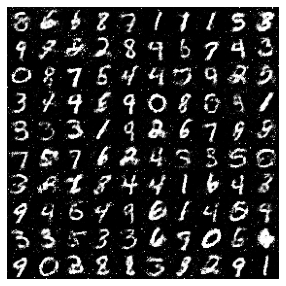

In [21]:
if __name__ == '__main__':
    latent_dim = 64

    # Build and compile the discriminator
    discriminator = build_discriminator()
    discriminator.compile(loss='binary_crossentropy',
                          optimizer=Adam(lr=0.0002, beta_1=0.5),
                          metrics=['accuracy'])

    # Build the generator
    generator = build_generator(latent_dim)

    # Generator input z
    z = Input(shape=(latent_dim,))
    generated_image = generator(z)

    # Only train the generator for the combined model
    discriminator.trainable = False

    # The discriminator takes generated image as input and determines validity
    real_or_fake = discriminator(generated_image)

    # Stack the generator and discriminator in a combined model
    # Trains the generator to deceive the discriminator
    combined = Model(z, real_or_fake)
    combined.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=0.0002, beta_1=0.5))
    
    # train the GAN system
    train(generator=generator,
          discriminator=discriminator,
          combined=combined,
          steps=15000,
          batch_size=128)

    # display some random generated images
    plot_generated_images(generator)

**Another Example:MNIST**

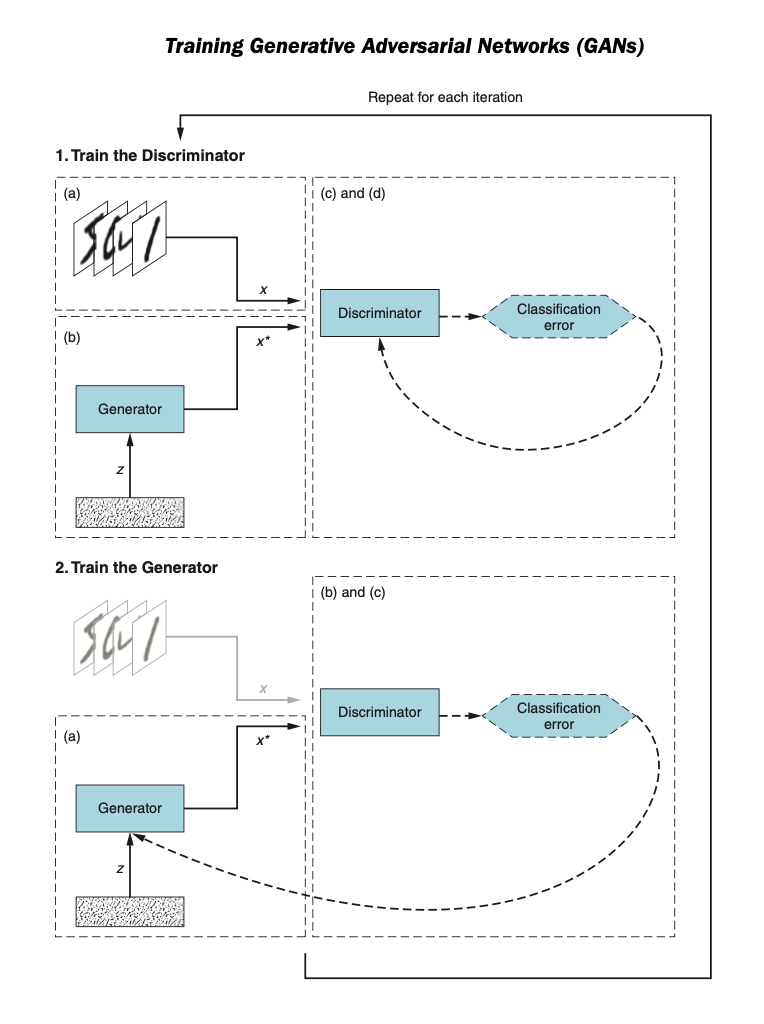

In [22]:
from IPython.display import Image
Image(filename='/Users/shovonsengupta/Desktop/All/PayPal - workshop/GAN_3.png',width=600, height=300)

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

In [24]:
img_rows = 28
img_cols = 28
channels = 1

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

**Generator**

In [25]:
def build_generator(img_shape, z_dim):

    model = Sequential()

    # Fully connected layer
    model.add(Dense(128, input_dim=z_dim))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Dense(28 * 28 * 1, activation='tanh'))

    # Reshape the Generator output to image dimensions
    model.add(Reshape(img_shape))

    return model

**Discriminator**

In [27]:
def build_discriminator(img_shape):

    model = Sequential()

    # Flatten the input image
    model.add(Flatten(input_shape=img_shape))

    # Fully connected layer
    model.add(Dense(128))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    return model

**Build the Model**

In [28]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [29]:
# Build and compile the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# Build the Generator
generator = build_generator(img_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

**Training**

In [30]:
losses = []
accuracies = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval):

    # Load the MNIST dataset
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)

In [31]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

1000 [D loss: 0.043861, acc.: 98.44%] [G loss: 4.374410]
2000 [D loss: 0.033055, acc.: 99.61%] [G loss: 6.663957]
3000 [D loss: 0.097503, acc.: 96.48%] [G loss: 5.362753]
4000 [D loss: 0.074899, acc.: 97.27%] [G loss: 4.553587]
5000 [D loss: 0.232745, acc.: 91.41%] [G loss: 4.811535]
6000 [D loss: 0.231516, acc.: 91.41%] [G loss: 3.881841]
7000 [D loss: 0.211697, acc.: 89.84%] [G loss: 5.102053]
8000 [D loss: 0.297211, acc.: 89.06%] [G loss: 4.162843]
9000 [D loss: 0.455041, acc.: 83.59%] [G loss: 3.498006]
10000 [D loss: 0.372368, acc.: 83.98%] [G loss: 3.556114]
11000 [D loss: 0.301328, acc.: 85.55%] [G loss: 3.759675]
12000 [D loss: 0.416096, acc.: 79.30%] [G loss: 2.924557]
13000 [D loss: 0.395767, acc.: 83.98%] [G loss: 3.254277]
14000 [D loss: 0.548462, acc.: 76.17%] [G loss: 2.764594]
15000 [D loss: 0.528757, acc.: 75.78%] [G loss: 2.536903]
16000 [D loss: 0.452924, acc.: 79.69%] [G loss: 3.006504]
17000 [D loss: 0.642965, acc.: 71.09%] [G loss: 2.030890]
18000 [D loss: 0.384446

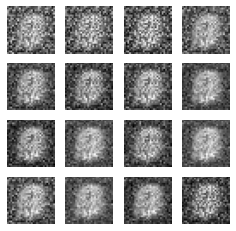

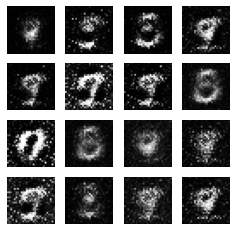

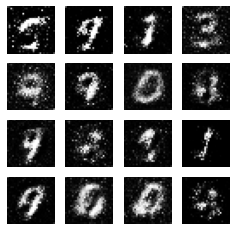

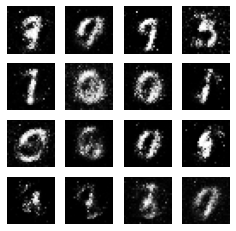

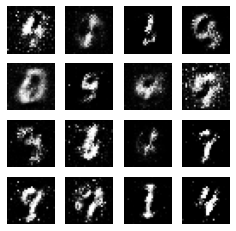

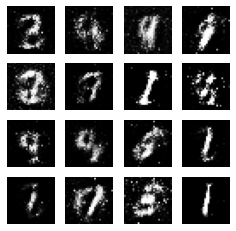

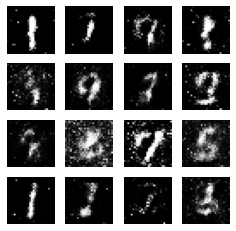

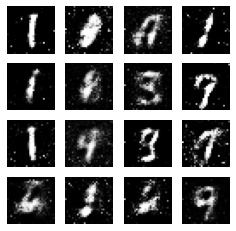

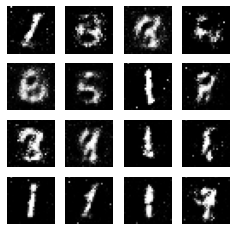

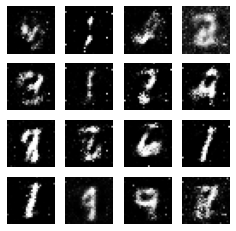

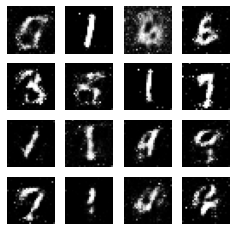

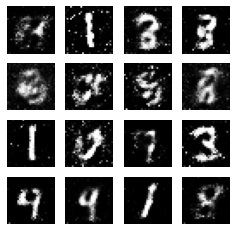

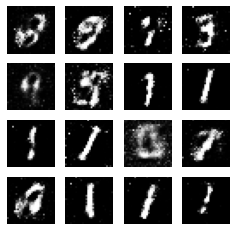

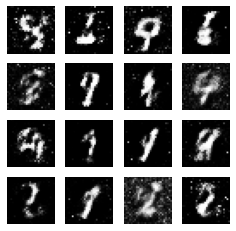

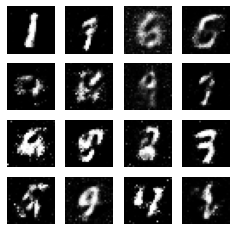

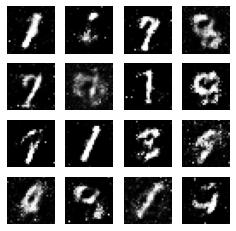

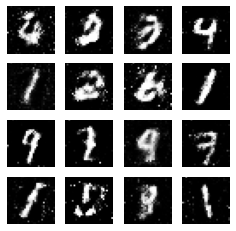

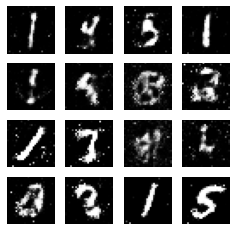

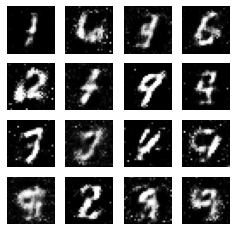

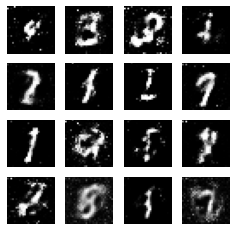

In [32]:
# Set hyperparameters
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

**Check for the losses**

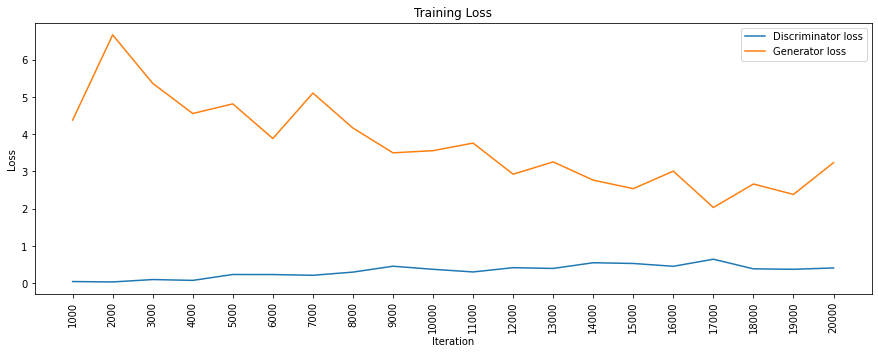

In [33]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

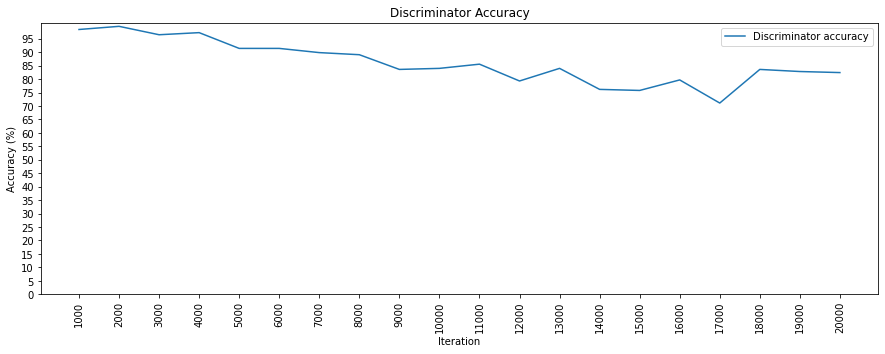

In [34]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()